# FTSE100 Stock Data Notebook

The FTSE100 Index is a share index of the 100 companies listed on the London Stock Exchange with the highest market capitalisation. Because of this, the performance of the index as a whole and its constituent company stocks is seen as a gauge of prosperity for businesses regulated under UK company law. It is therefore a useful data source to incorporate into our Covid-19 dataset to use as a proxy for measuring the impact of the Covid-19 pandemic on the UK economy.

**YFinance**: The library used to download historical market data is called YFinance. It is not limited to FTSE100 data, but as we are concerned with the effect of the Coronavirus pandemic on the UK economy, we will focus solely on the FTSE100 Stock Index. Information about the module can be found here: https://github.com/ranaroussi/yfinance

Here is a link to the data source (Yahoo Finance website) which feeds our API: https://uk.finance.yahoo.com/most-active

## Import all necessary packages:

In [1]:
import yfinance as yf
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests

In [2]:
# Call the API and read the response as JSON
url = 'https://iqapi.azurewebsites.net/api/ftse'

r = requests.get(url)

In [3]:
json = r.json()

In [4]:
json

{'results': [{'REPORTED_DATE': '2020-01-06T00:00:00',
   'STOCK_CODE': 'AAL_L',
   'ADJ_CLOSE': 2068.72412109375,
   'CLOSE': 2145.0,
   'HIGH': 2168.5,
   'LOW': 2129.0,
   'OPEN': 2168.5,
   'VOLUME': 2511361.0,
   'COMPANY_NAME': 'ANGLO AMERICAN',
   'FTSE_ICB_SECTOR': 'Industrial Metals and Mining',
   'FTSE_ICB_SUBSECTOR': 'General Mining'},
  {'REPORTED_DATE': '2020-01-06T00:00:00',
   'STOCK_CODE': 'ABF_L',
   'ADJ_CLOSE': 2615.0,
   'CLOSE': 2615.0,
   'HIGH': 2625.0,
   'LOW': 2561.0,
   'OPEN': 2573.0,
   'VOLUME': 878617.0,
   'COMPANY_NAME': 'A.B.FOOD',
   'FTSE_ICB_SECTOR': 'Food Producers',
   'FTSE_ICB_SUBSECTOR': 'Food Products'},
  {'REPORTED_DATE': '2020-01-06T00:00:00',
   'STOCK_CODE': 'ADM_L',
   'ADJ_CLOSE': 2199.68798828125,
   'CLOSE': 2281.0,
   'HIGH': 2293.0,
   'LOW': 2265.0,
   'OPEN': 2268.0,
   'VOLUME': 356383.0,
   'COMPANY_NAME': 'ADMIRAL GRP',
   'FTSE_ICB_SECTOR': 'Non-life Insurance',
   'FTSE_ICB_SUBSECTOR': 'Property and Casualty Insurance'},
  {'

In [5]:
# Convert the results into a DataFrame
df = pd.DataFrame(json['results'])

In [6]:
# Inspect the data
df.head()

REPORTED_DATE STOCK_CODE    ADJ_CLOSE        CLOSE         HIGH  \
0  2020-01-06T00:00:00      AAL_L  2068.724121  2145.000000  2168.500000   
1  2020-01-06T00:00:00      ABF_L  2615.000000  2615.000000  2625.000000   
2  2020-01-06T00:00:00      ADM_L  2199.687988  2281.000000  2293.000000   
3  2020-01-06T00:00:00      AHT_L  2368.193359  2404.000000  2404.000000   
4  2020-01-06T00:00:00     ANTO_L   896.576782   908.799988   918.200012   

           LOW    OPEN     VOLUME    COMPANY_NAME  \
0  2129.000000  2168.5  2511361.0  ANGLO AMERICAN   
1  2561.000000  2573.0   878617.0        A.B.FOOD   
2  2265.000000  2268.0   356383.0     ADMIRAL GRP   
3  2340.189941  2355.0  1106433.0    ASHTEAD GRP.   
4   900.000000   916.0  1051506.0     ANTOFAGASTA   

                FTSE_ICB_SECTOR                    FTSE_ICB_SUBSECTOR  
0  Industrial Metals and Mining                        General Mining  
1                Food Producers                         Food Products  
2            Non-life Insurance       Property and Casualty Insurance  
3     Industrial Transportation  Commercial Vehicle-Equipment Leasing  
4  Industrial Metals and Mining                                Copper

In [7]:
df.shape

(18786, 11)

In [8]:
for x in df.columns:
    print(x)

REPORTED_DATE
STOCK_CODE
ADJ_CLOSE
CLOSE
HIGH
LOW
OPEN
VOLUME
COMPANY_NAME
FTSE_ICB_SECTOR
FTSE_ICB_SUBSECTOR


We have several columns in this dataset. Here is a description of each column:

1) **REPORTED_DATE** – The calendar date the data is reported at. The date range contained in the API call is from 01/01/2020 to the current date when called.

2) **STOCK_CODE** – The designated stock code of the stock as it appears on market forums.

3) **Adjusted Closing Price ("ADJ_CLOSE")** – The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions.

4) **Closing Price ("CLOSE")** – The price at which a stock ceases trading when the stock exchange closes on a given day. It represents the price of the last buy-sell order between two traders that went through before closing. 

5) **High Price ("HIGH")** – The highest price at which a stock traded on a given day.

6) **Low Price ("LOW")** – The lowest price at which a stock traded on a given day.

7) **Opening Price ("OPEN)** – The price at which a stock begins trading when the stock exchange opens on a given day.

8) **Volume ("VOLUME")** – Trading volume is a measure of how much of a given stock has traded on a given day.

9) **COMPANY_NAME** – The full name of the company.

10) **FTSE_ICB_SECTOR** – The sector the company falls under as given by the FTSE100 ICB Sector classifications available for each of the stocks on the London Stock Exchange website. Industry Classification Benchmark (ICB) is a globally utilized standard for the categorization and comparison of companies by industry and sector.

11) **FTSE_ICB_SUBSECTOR** - The subsector the company falls under (one level more granular than sector).

In [9]:
# Convert date column to datetime data type
df['REPORTED_DATE'] = pd.to_datetime(df['REPORTED_DATE'])

Now that we have the data we want, we can begin to explore it through visualisation. Let's visualise all stocks on a single chart:

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


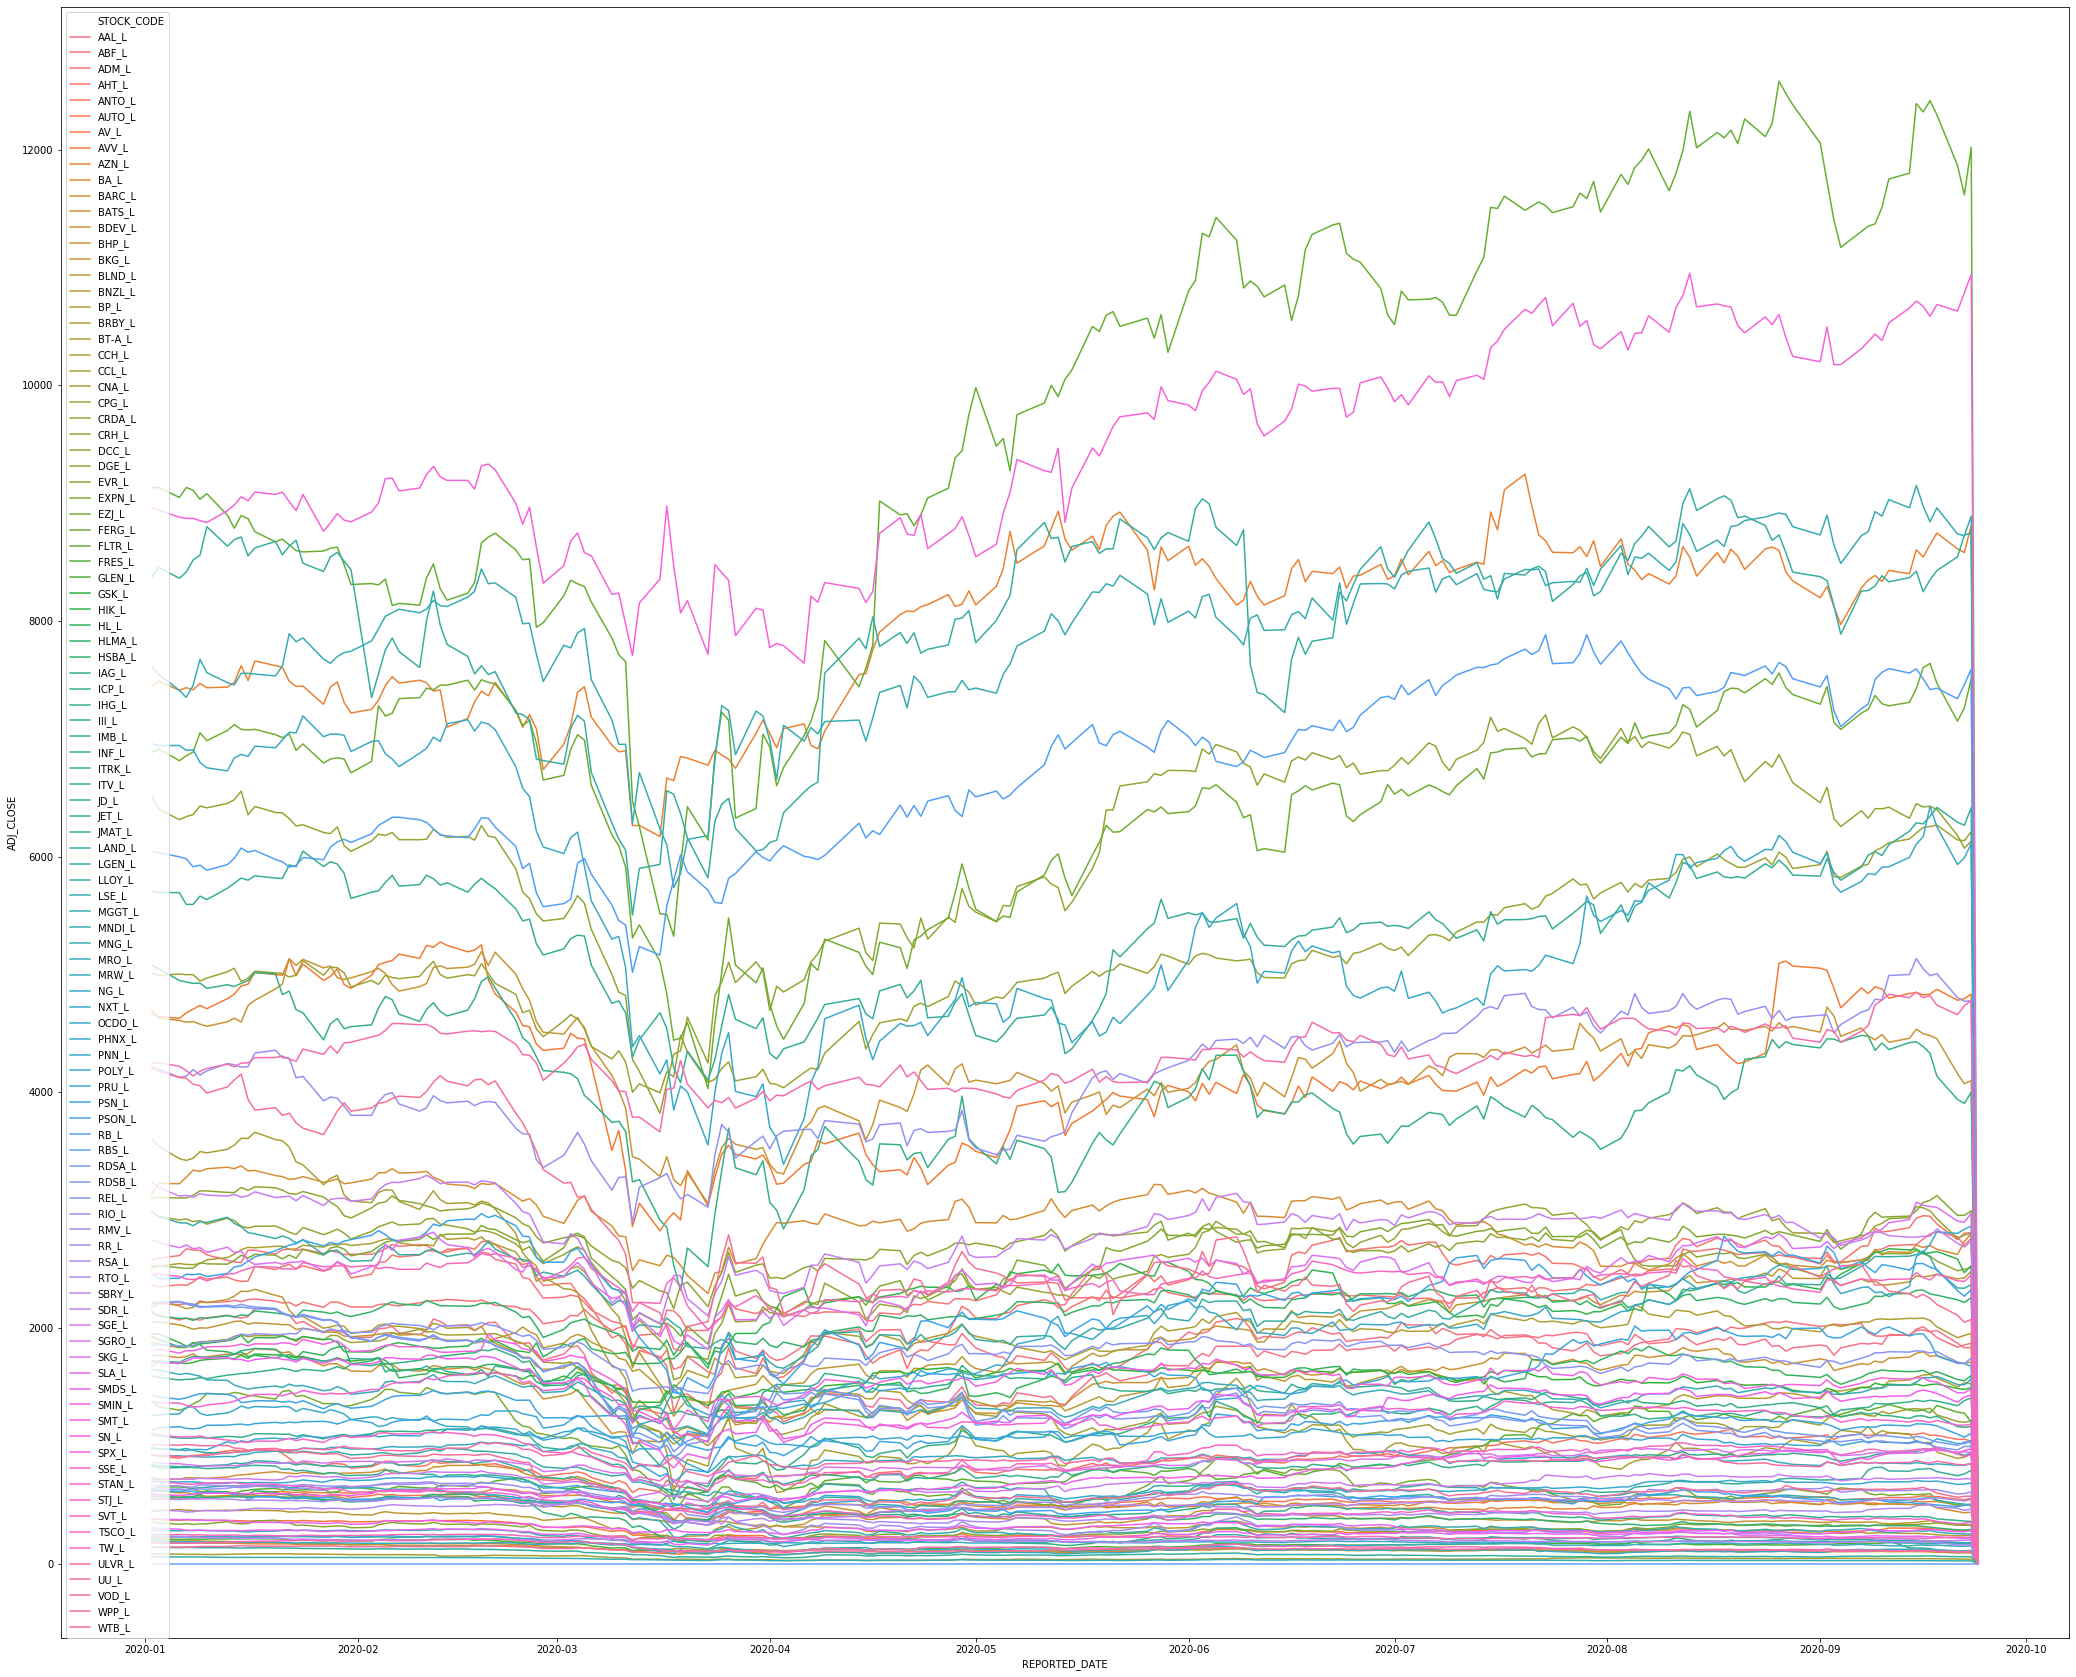

In [10]:
fix, ax = plt.subplots(figsize=(36,30))

sns.lineplot(df['REPORTED_DATE'], df['ADJ_CLOSE'], hue=df['STOCK_CODE'])

Great! This is useful to see the general trend of stocks. It is quite busy though, so we can also visualise each stock individually:

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot inte

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot inte

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot inte

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot inte

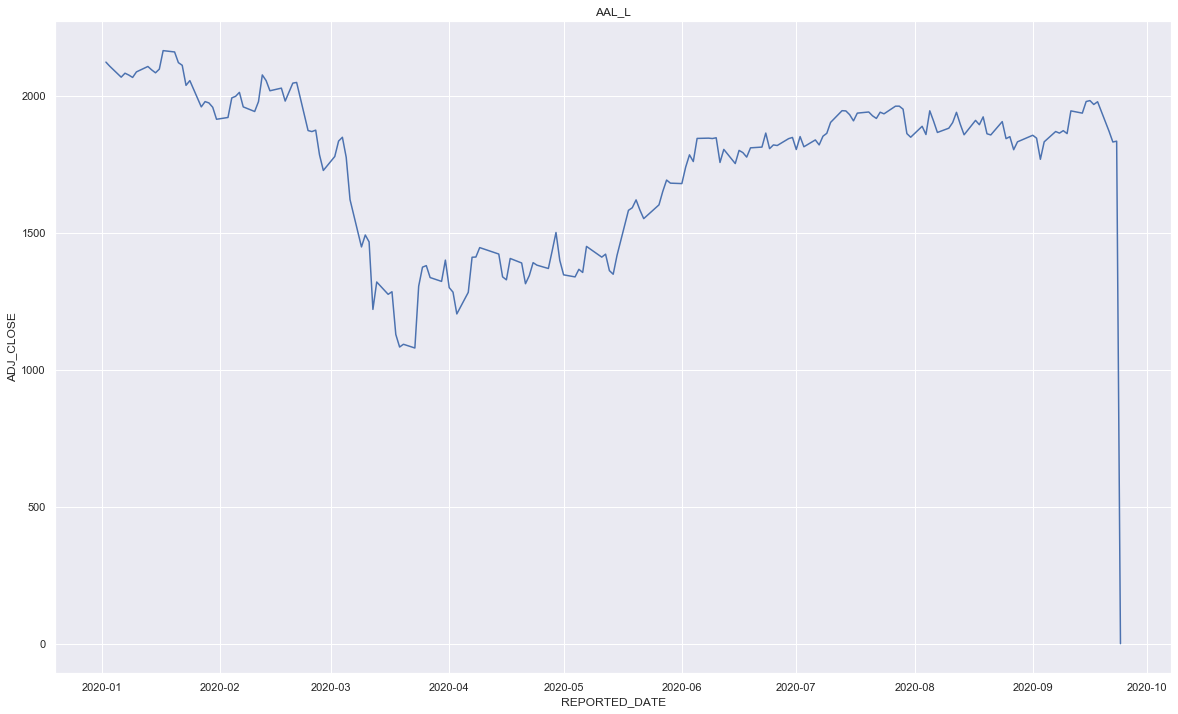

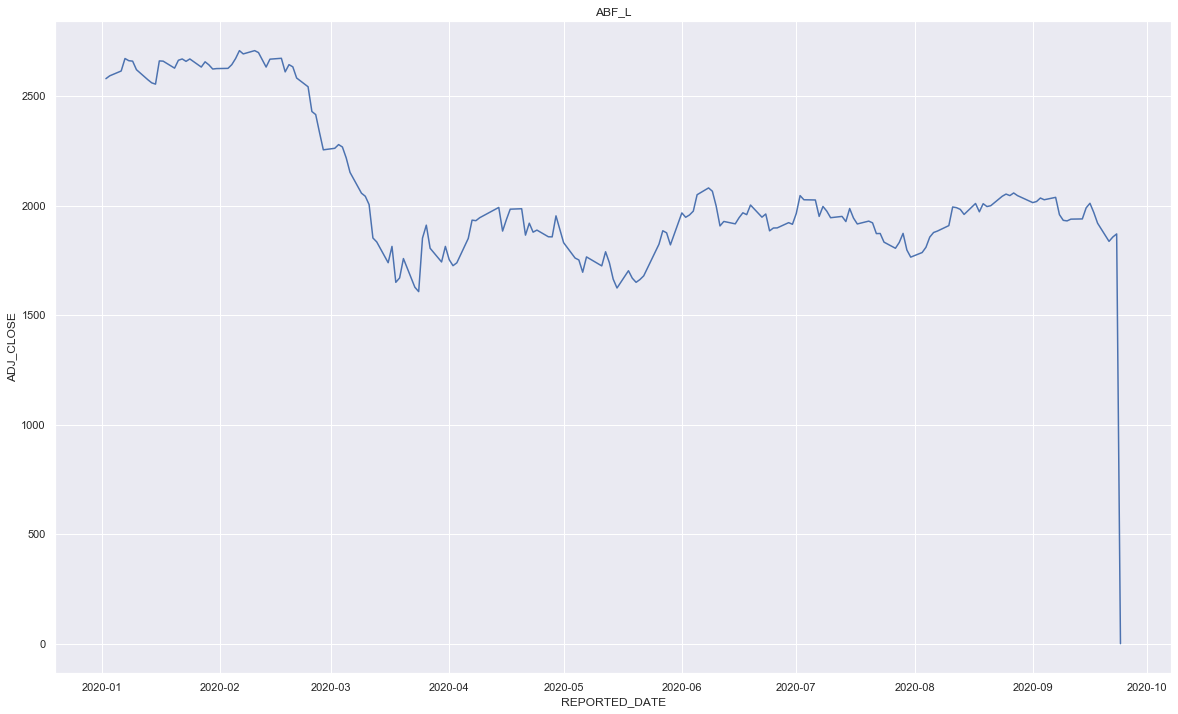

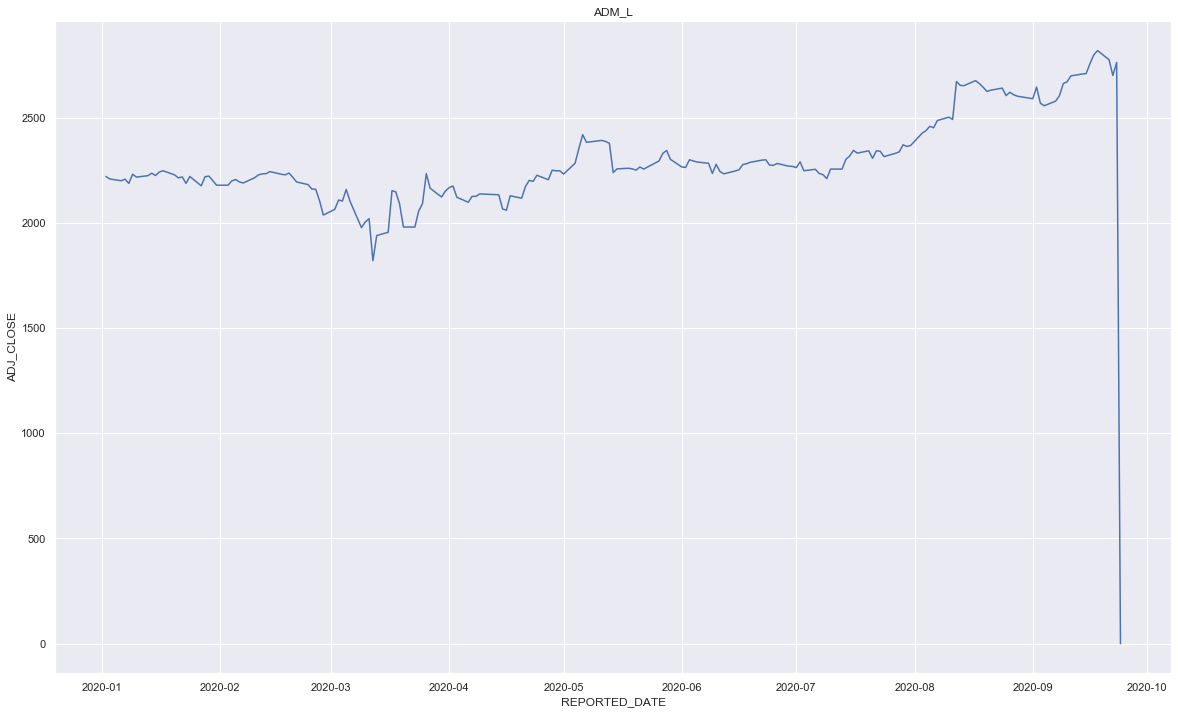

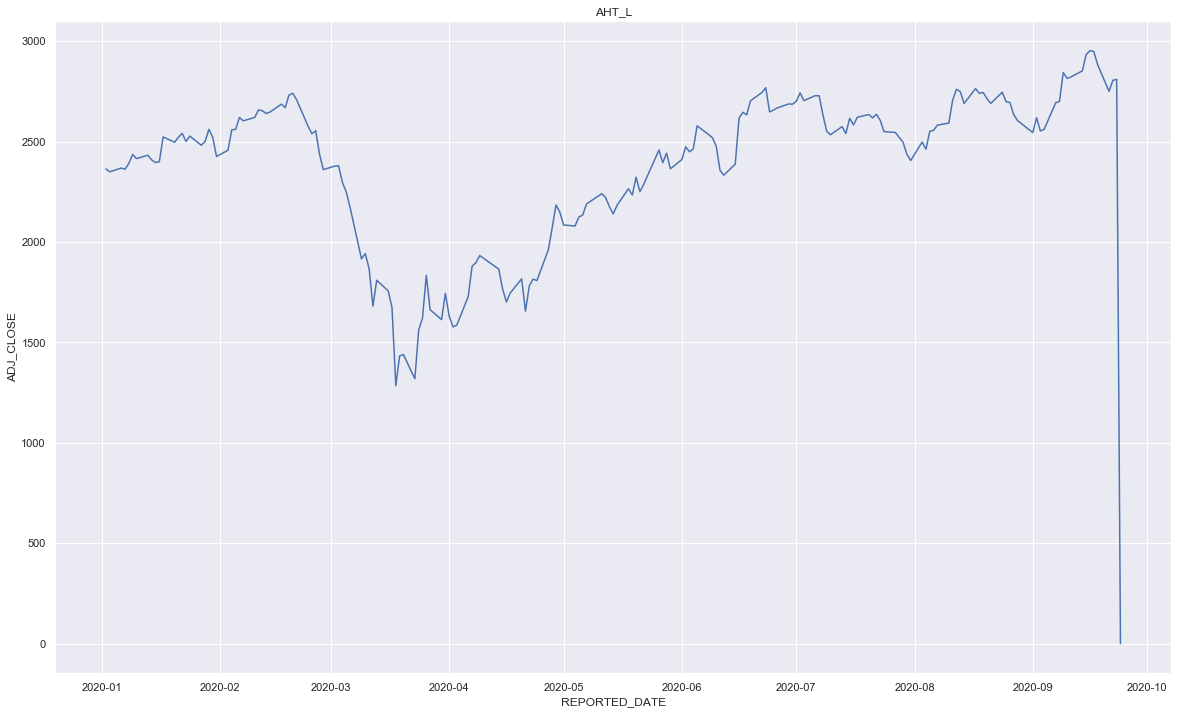

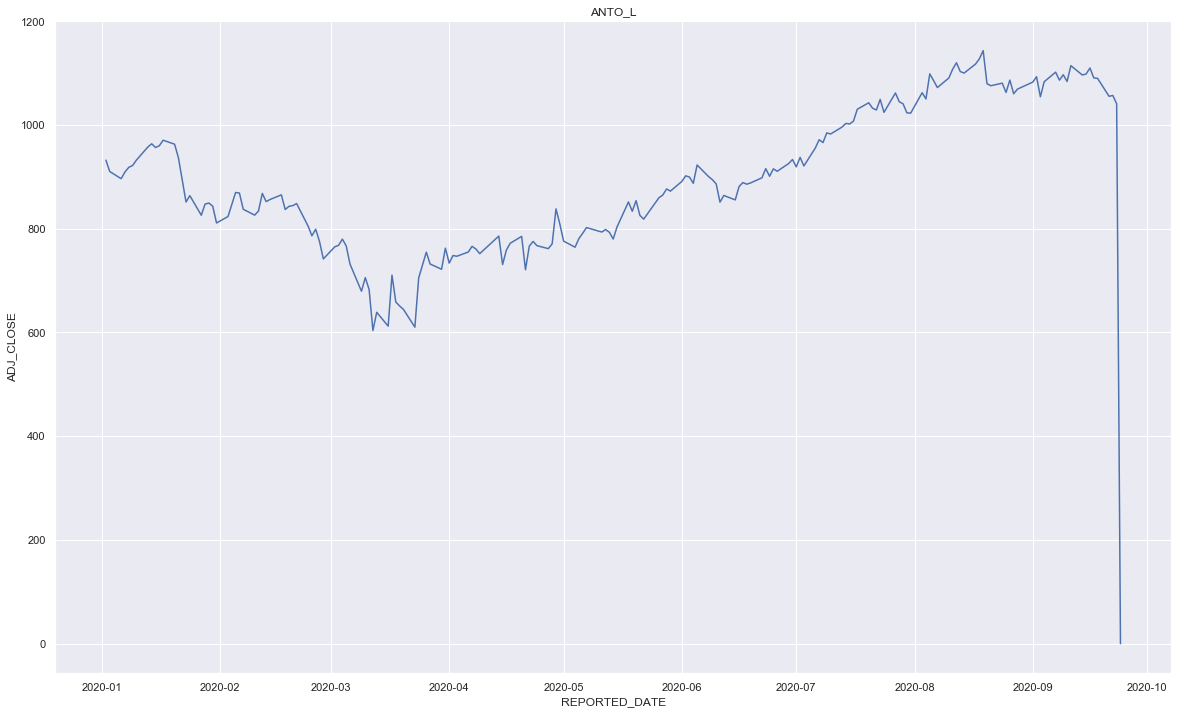

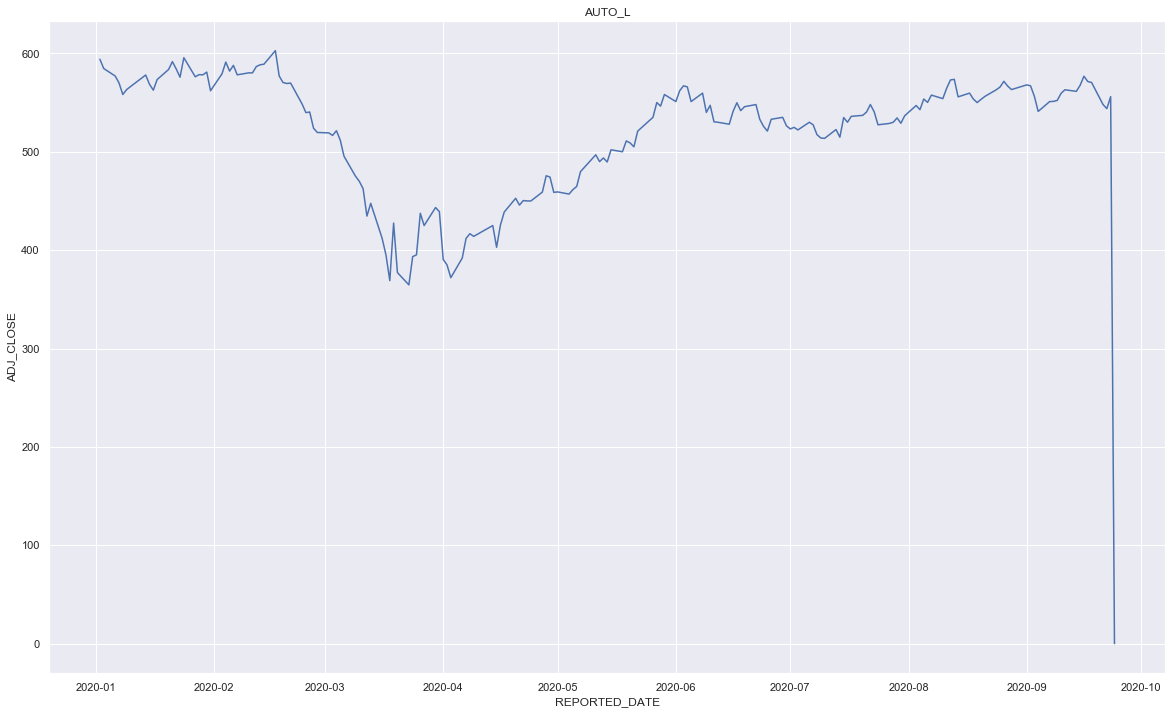

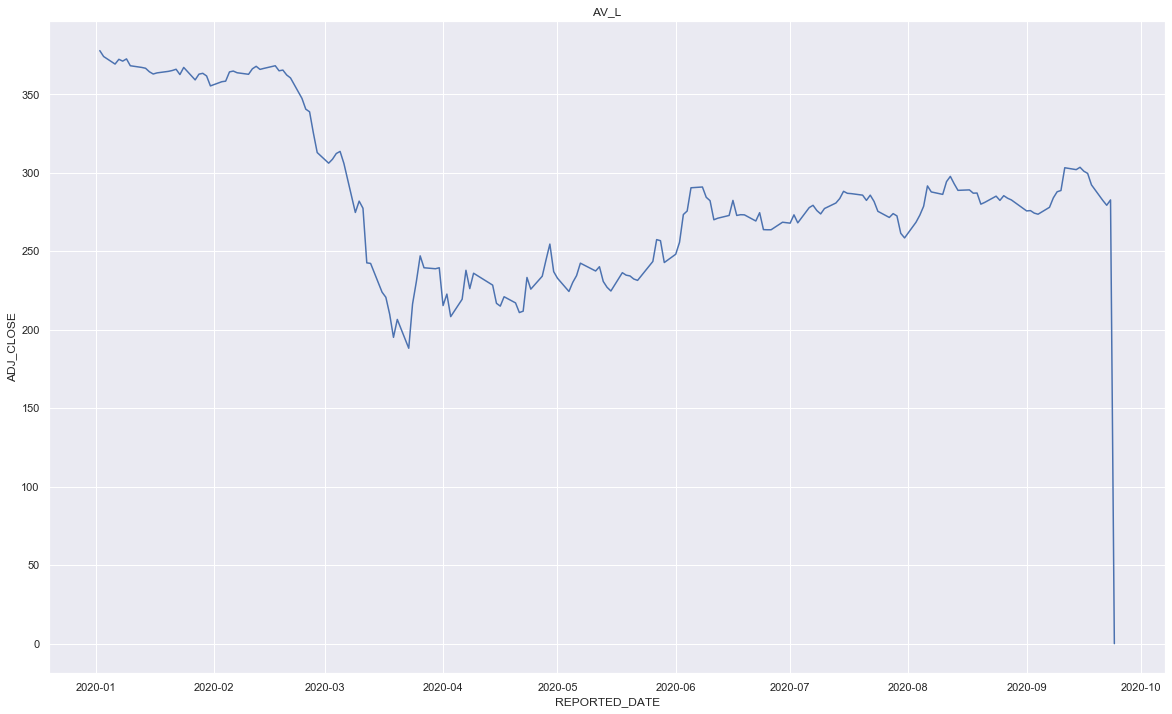

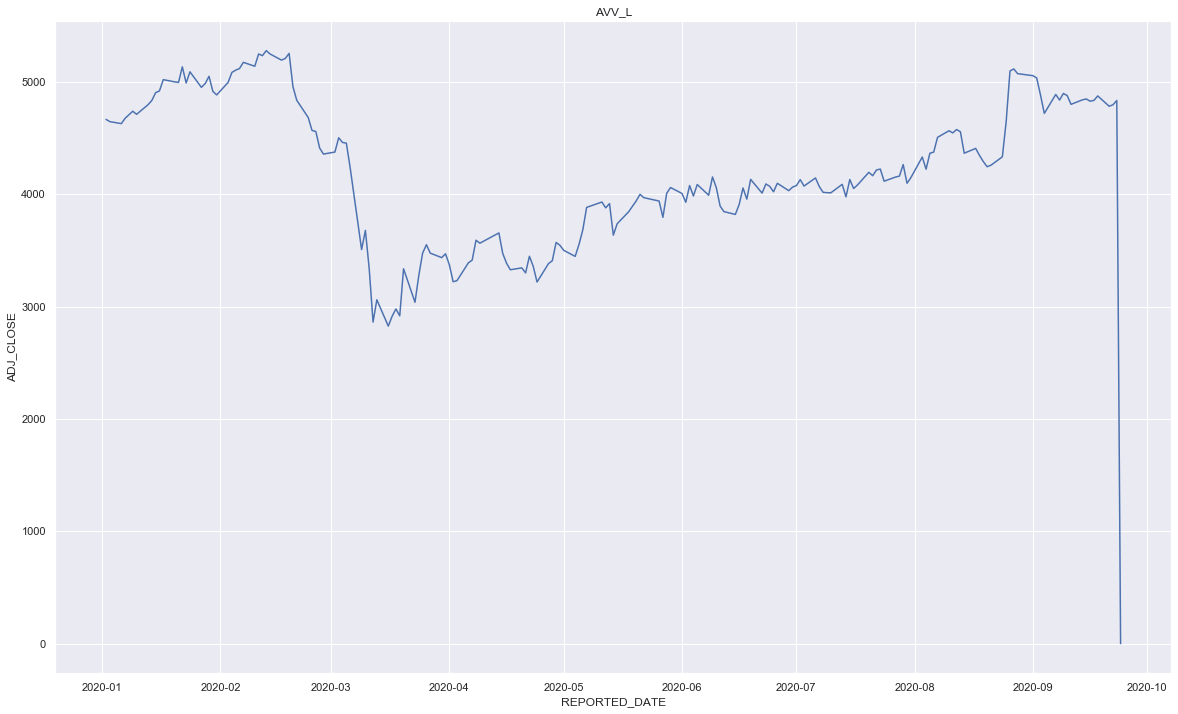

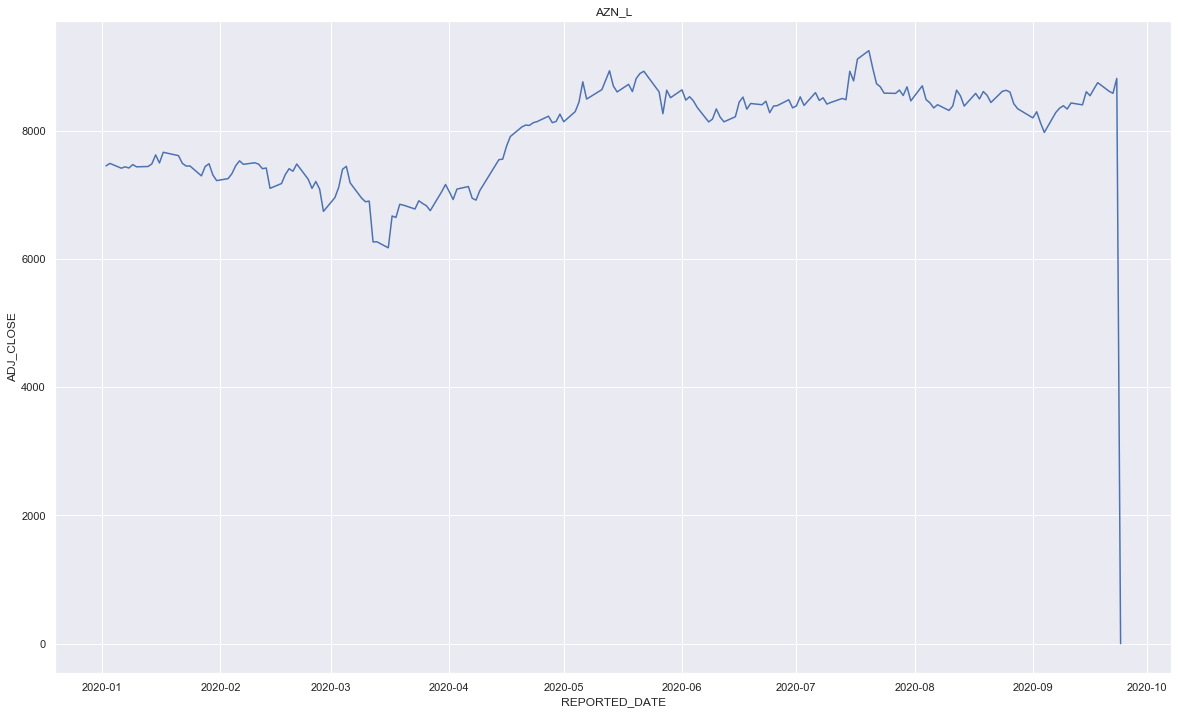

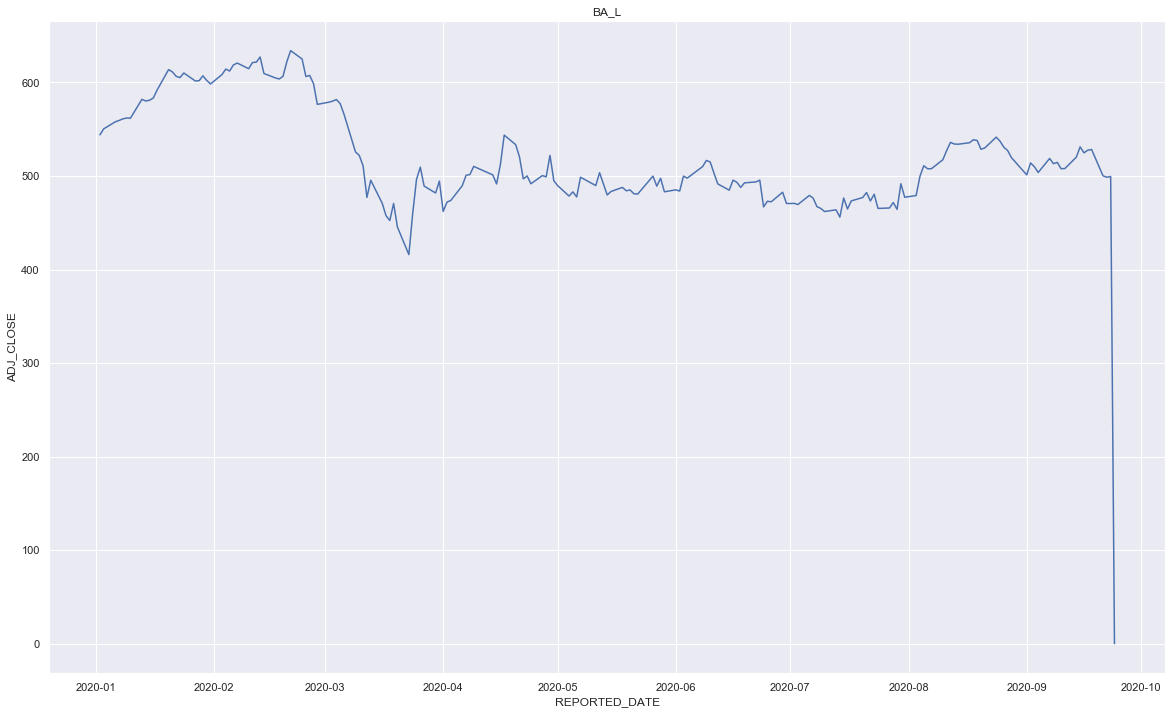

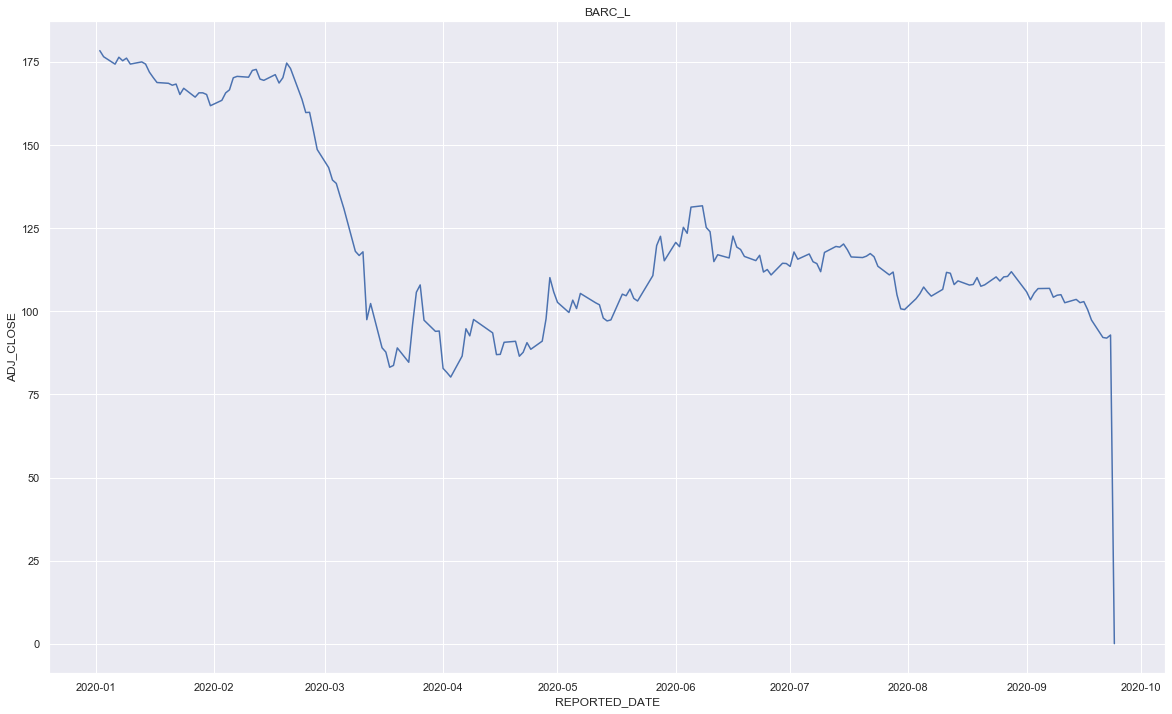

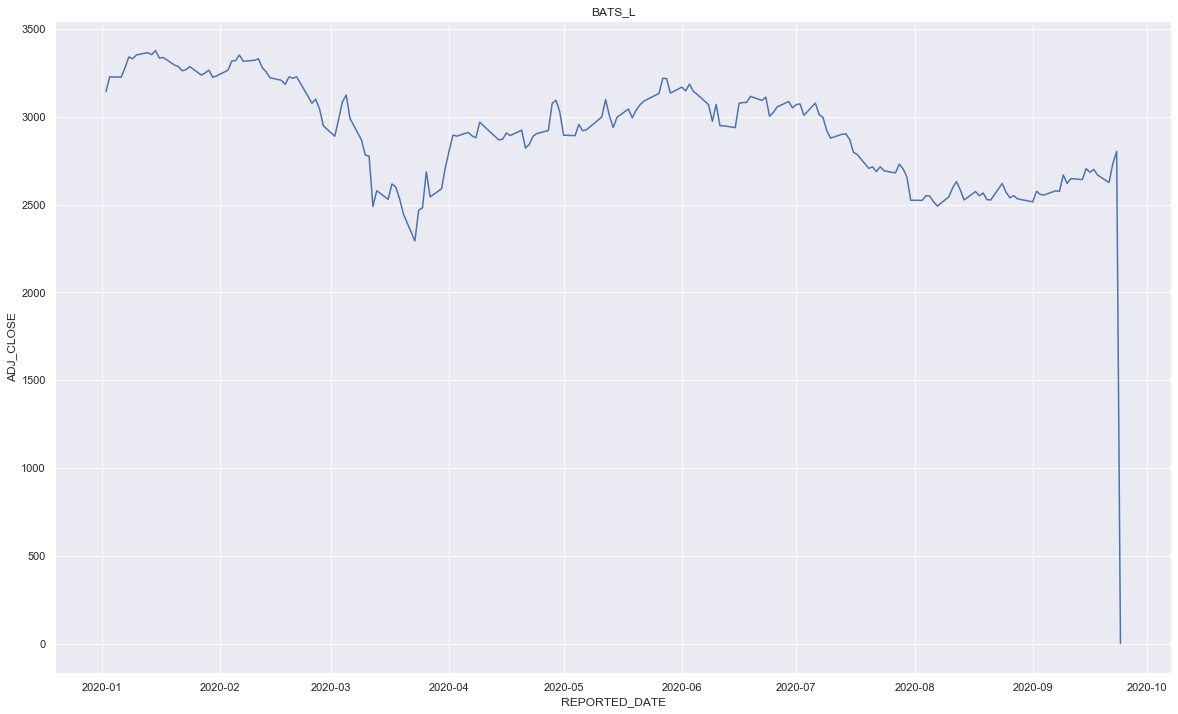

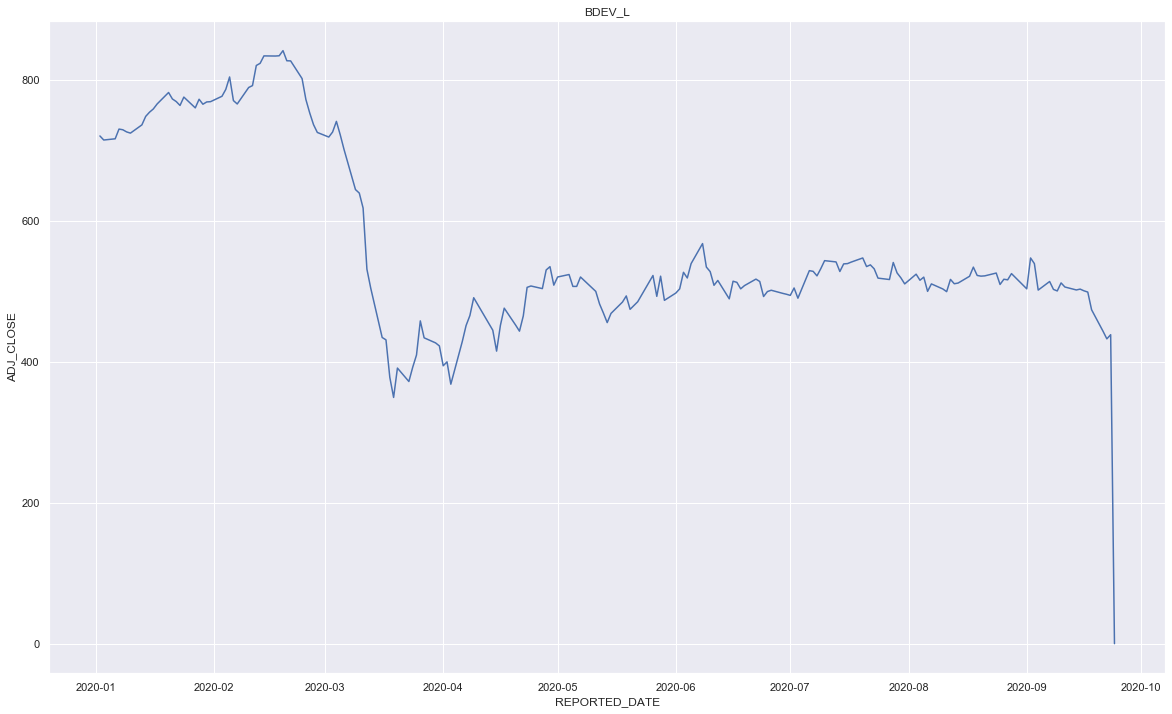

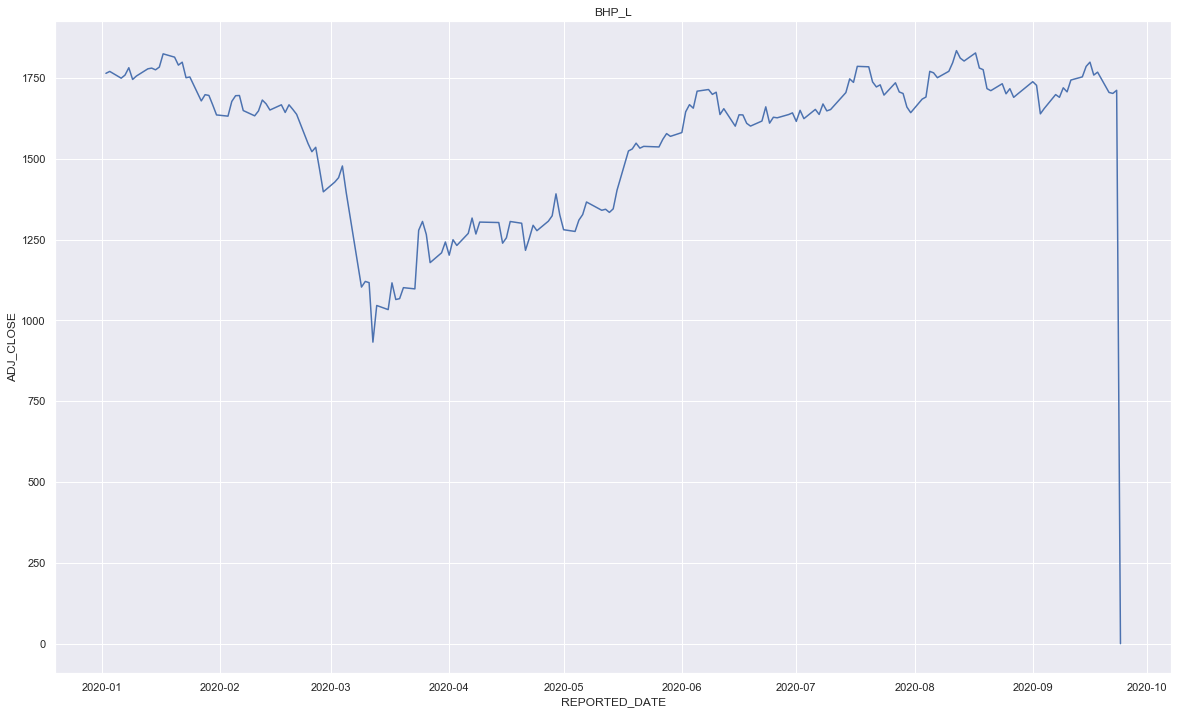

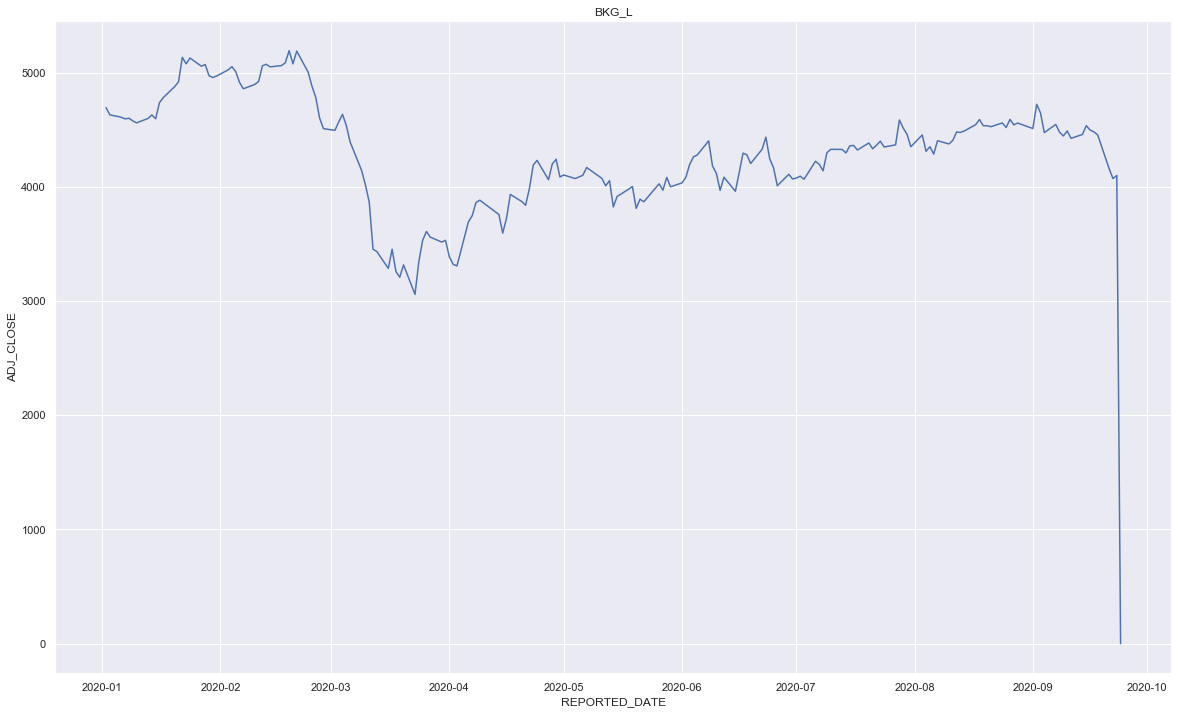

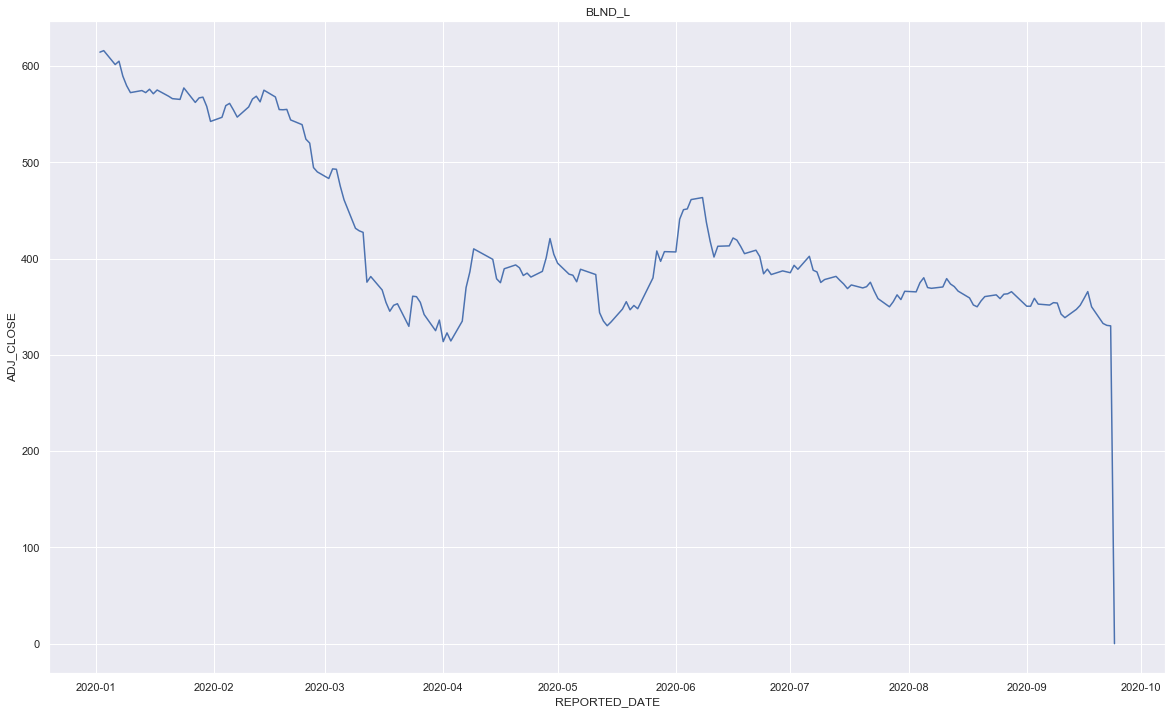

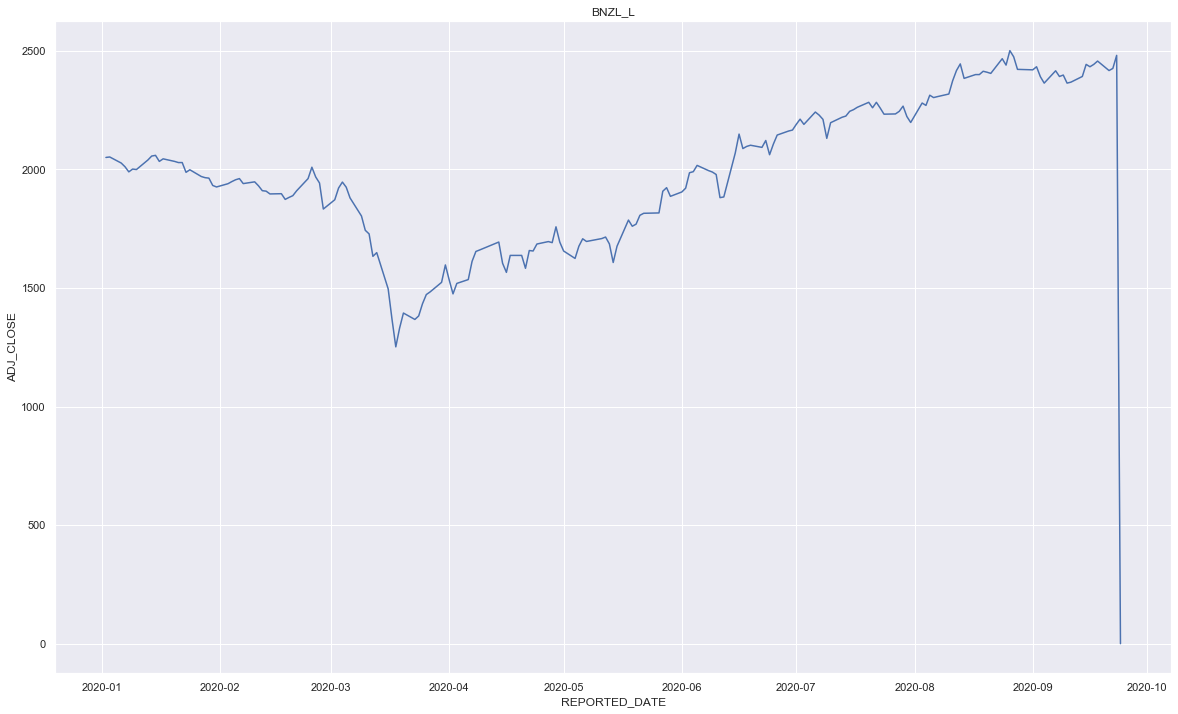

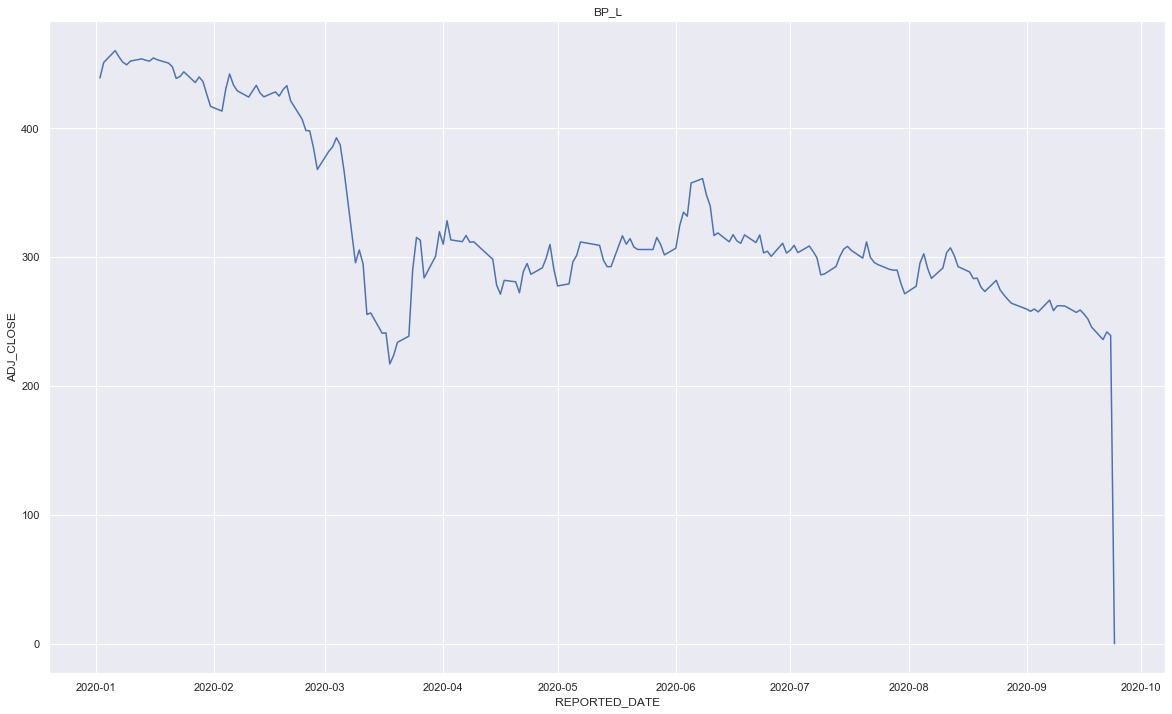

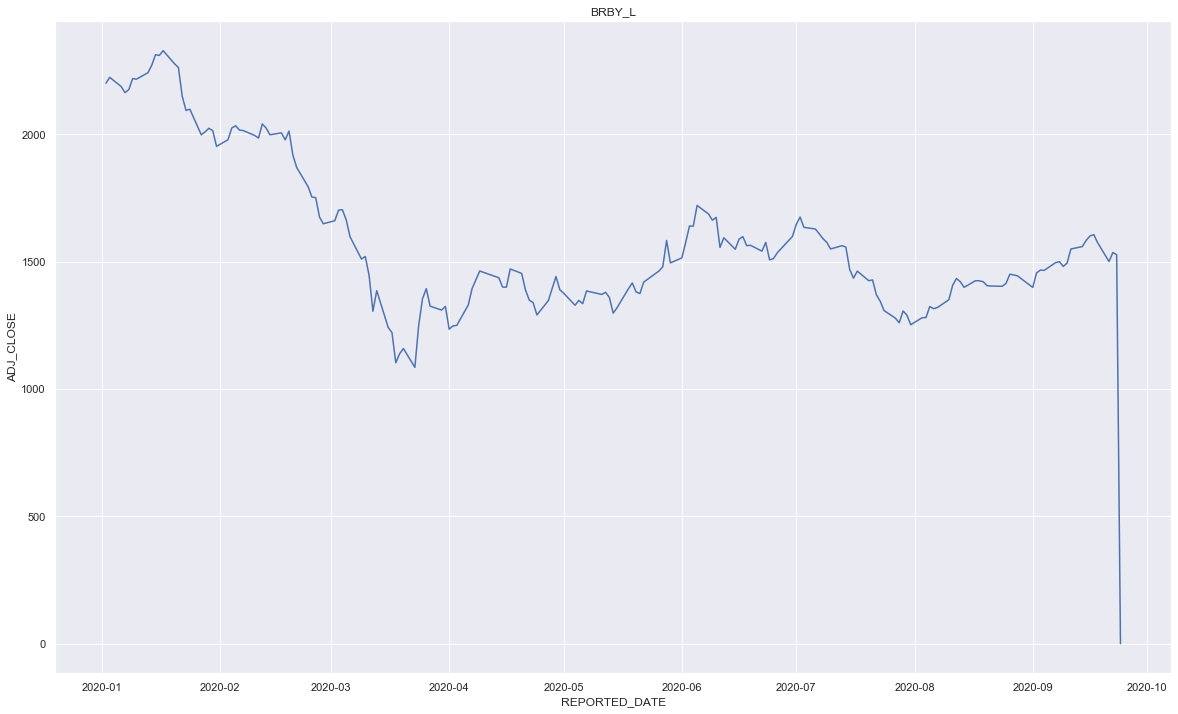

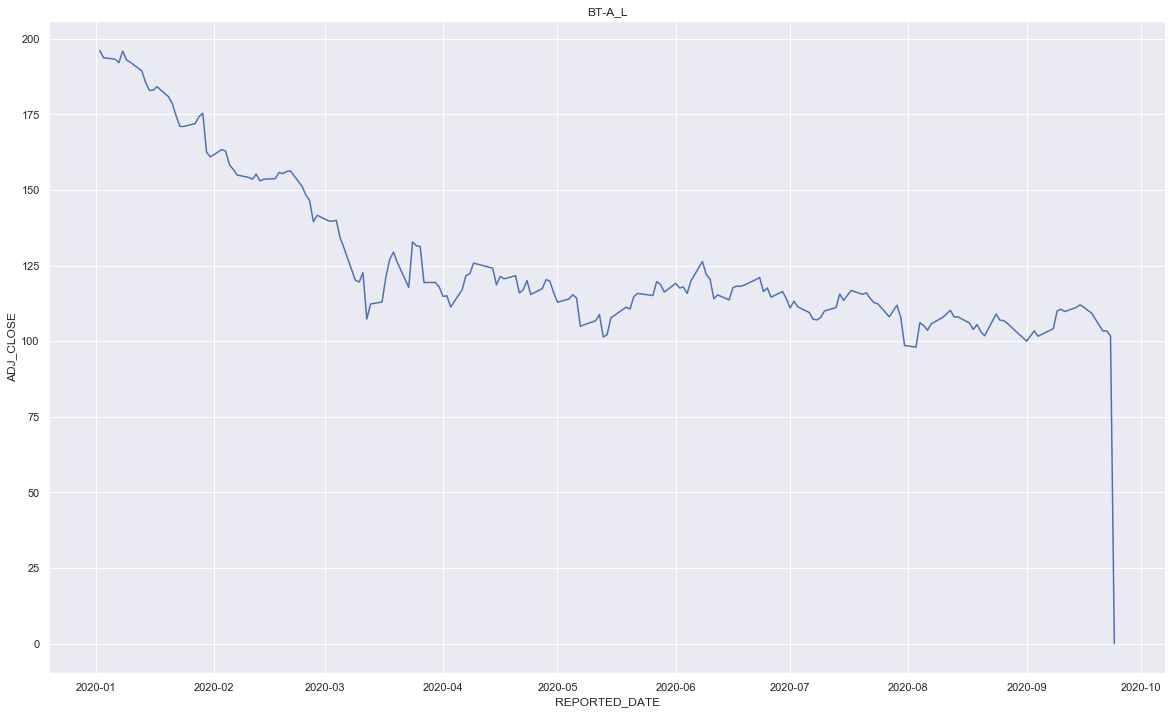

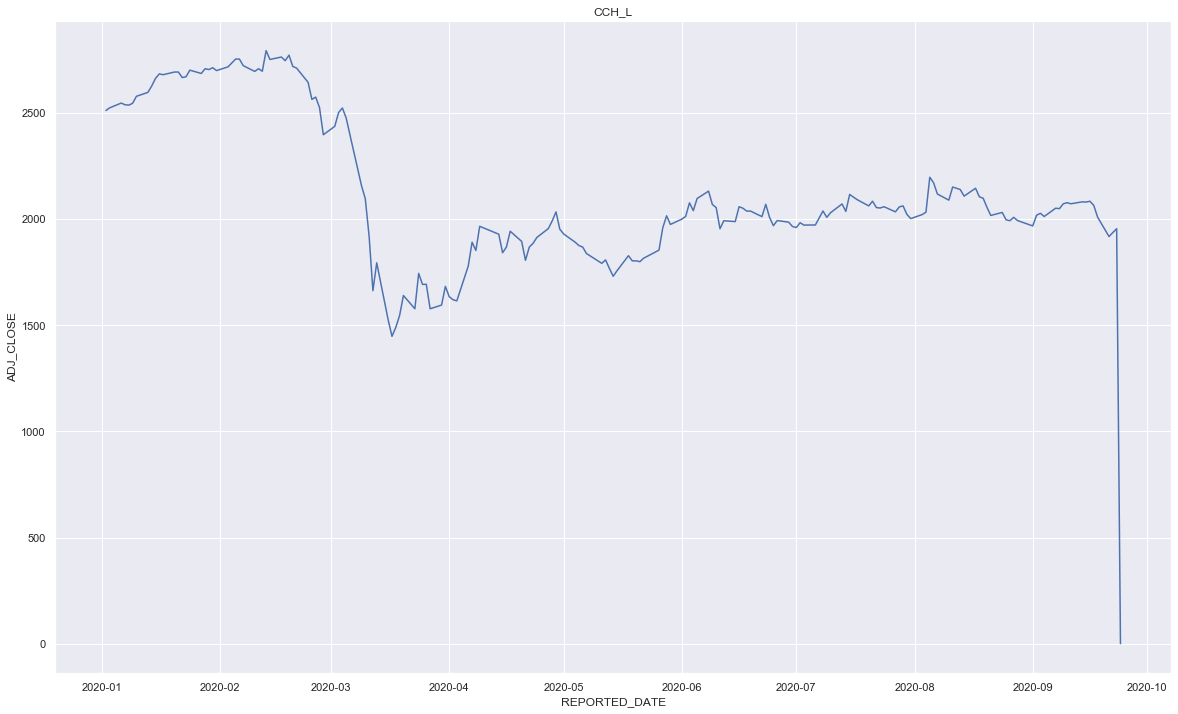

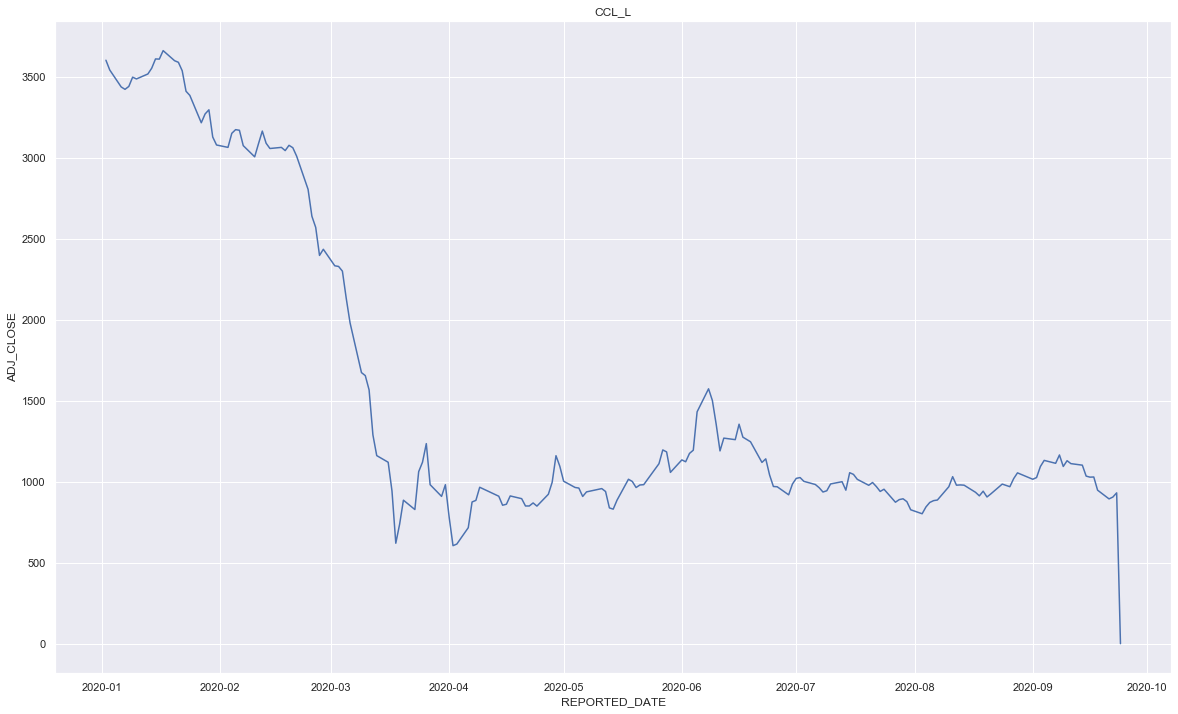

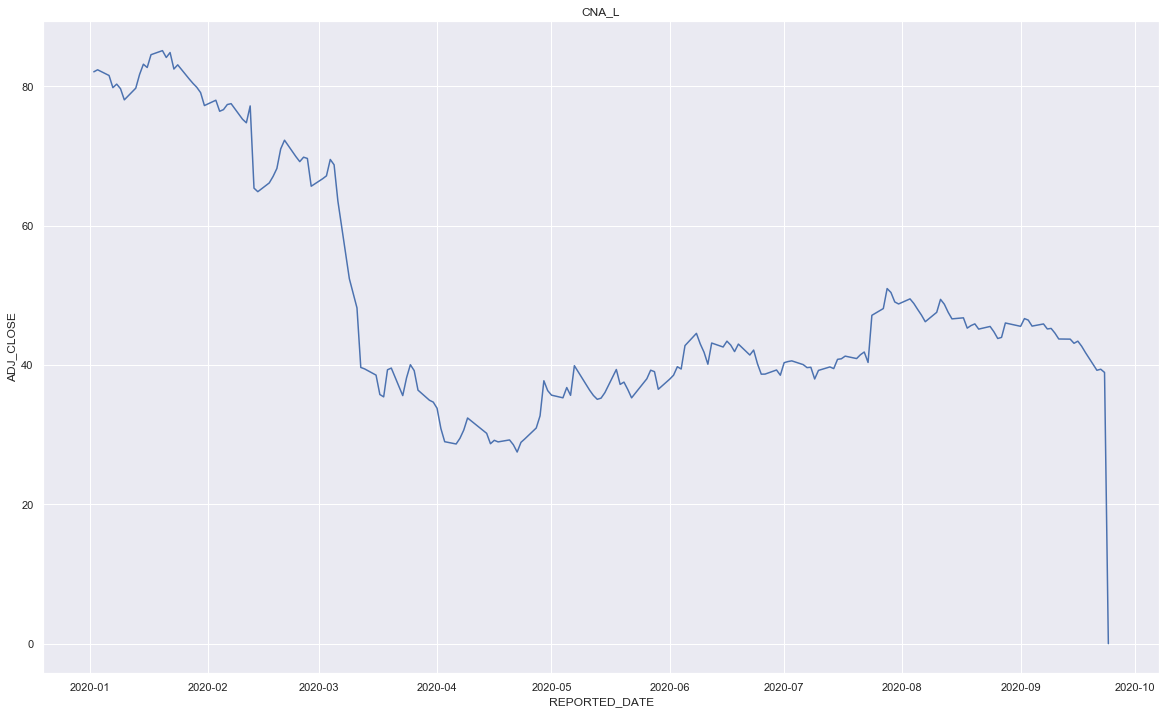

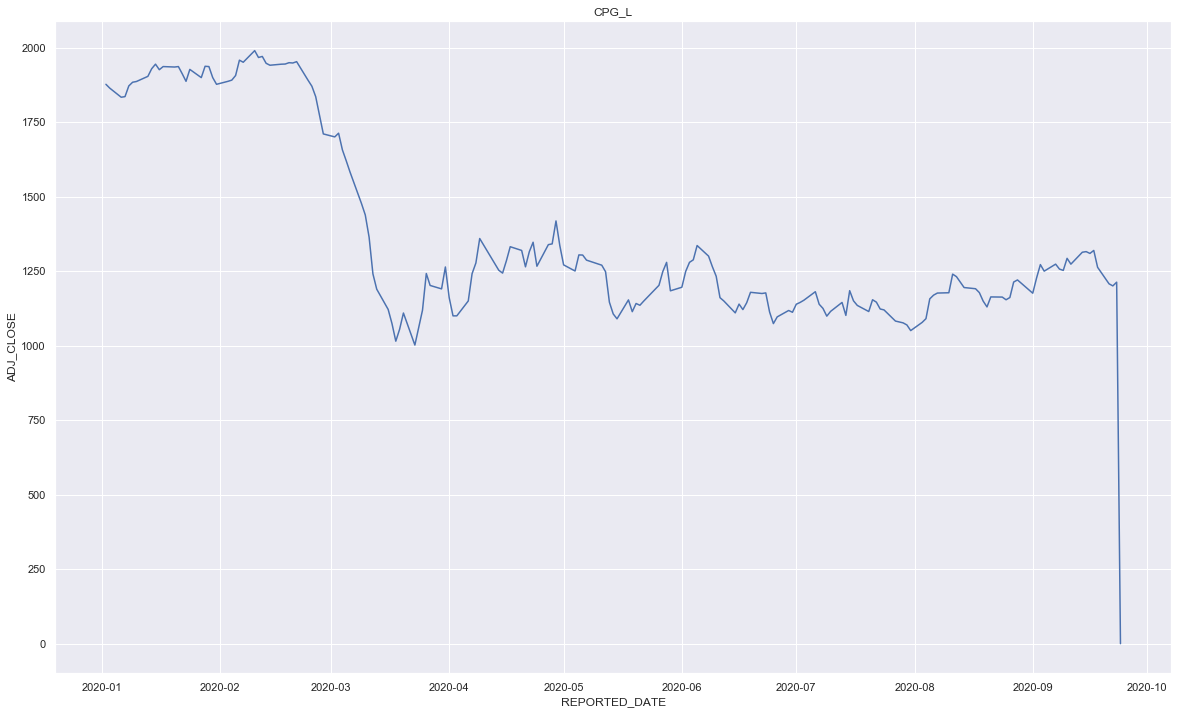

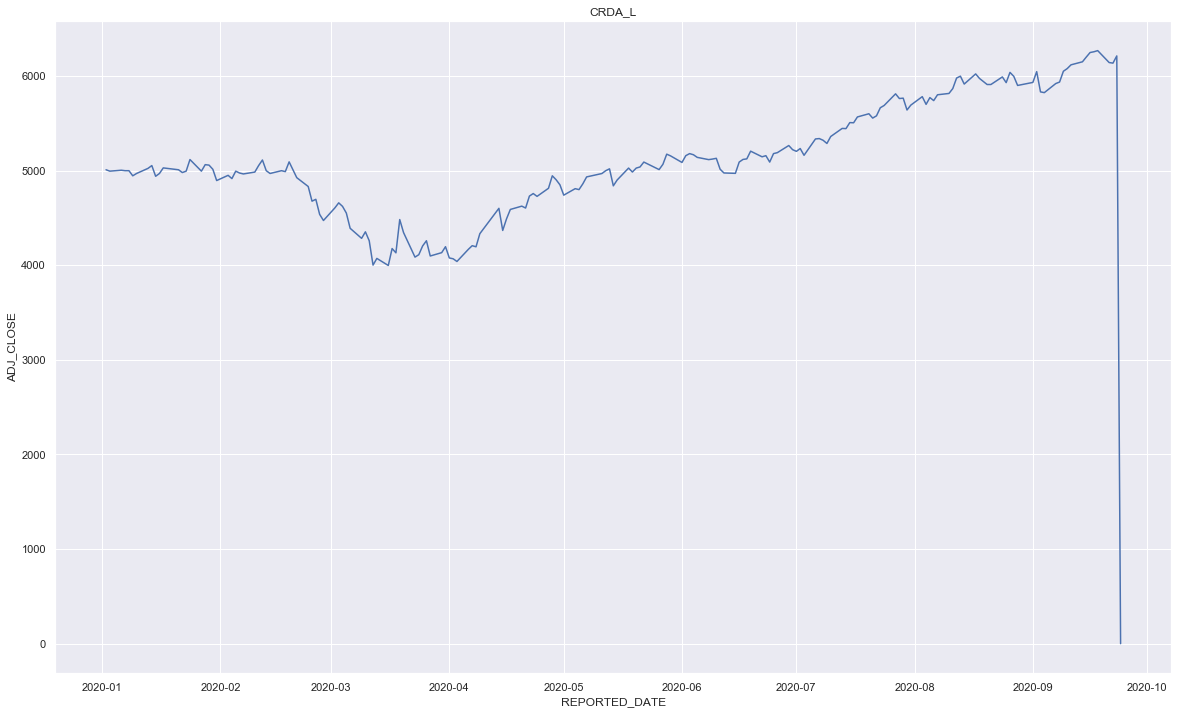

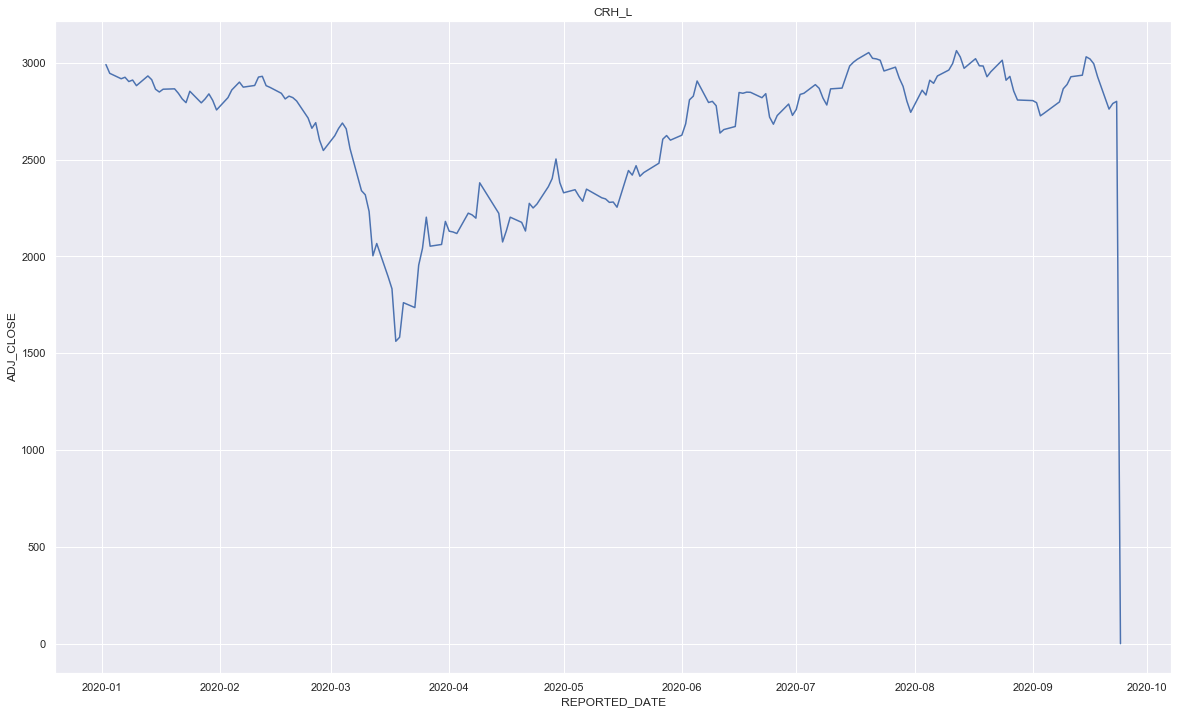

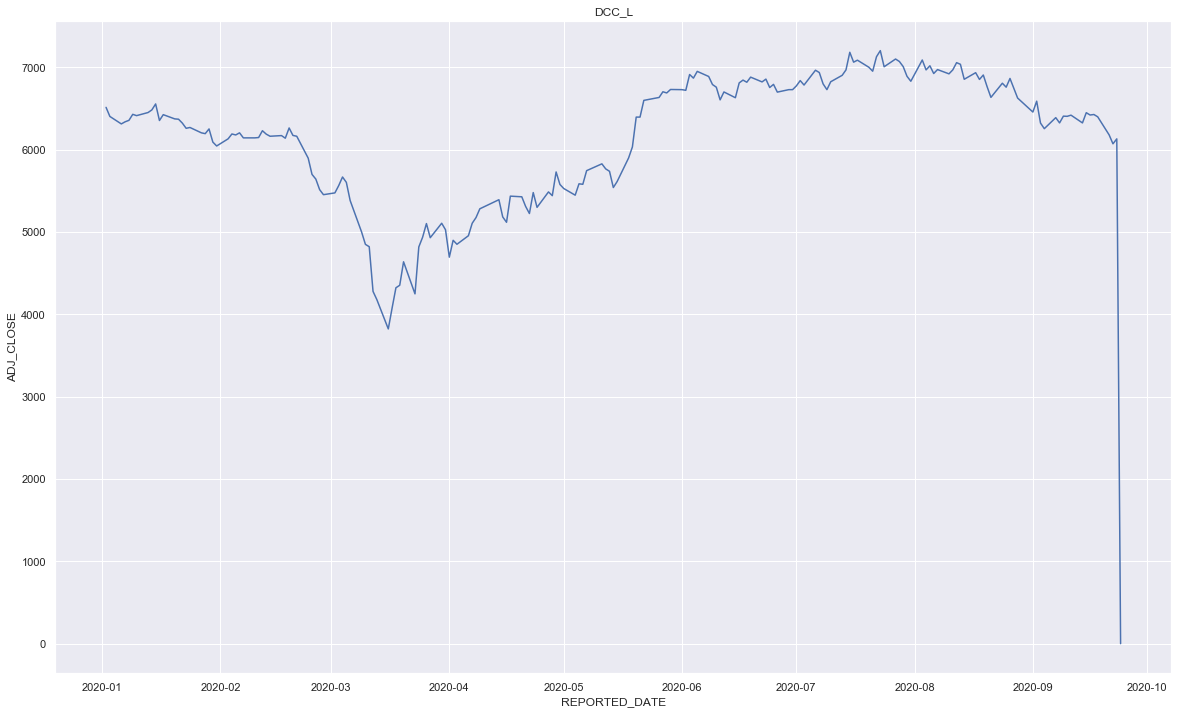

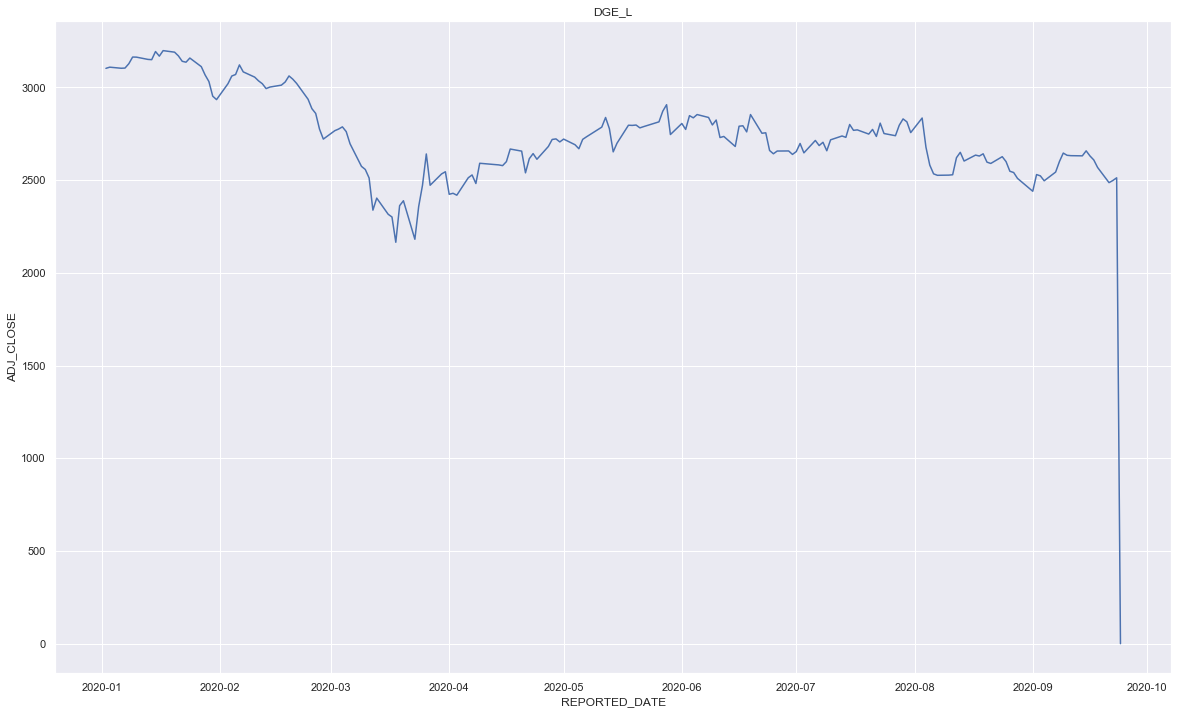

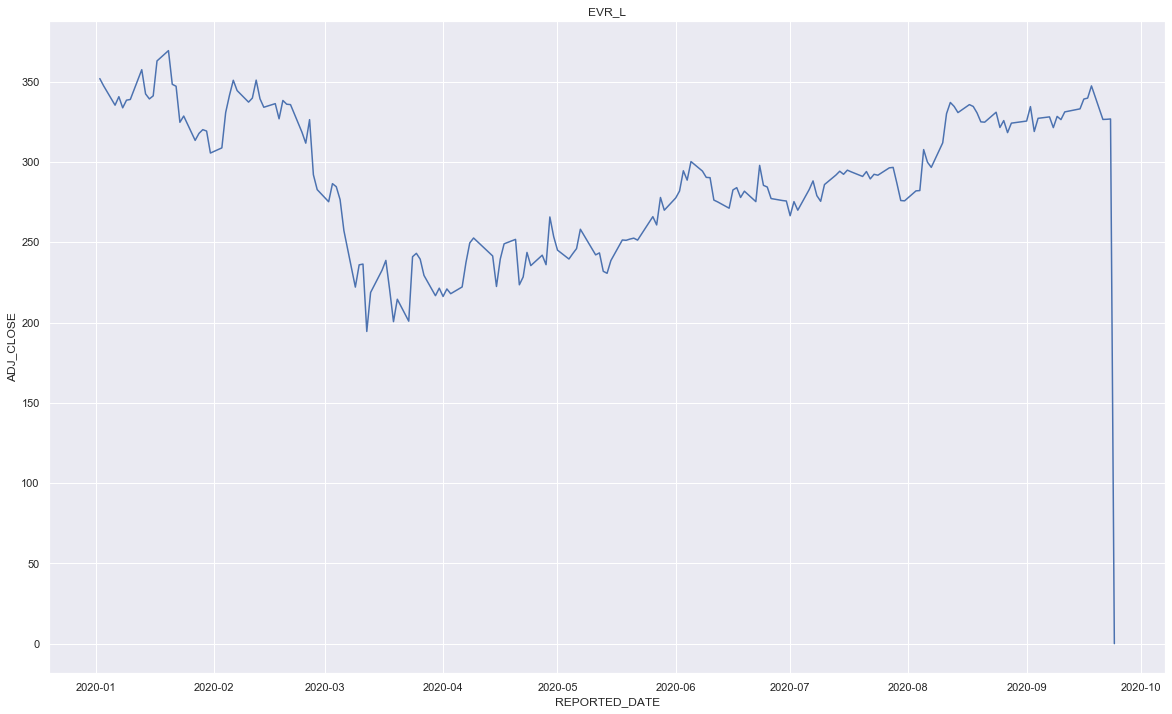

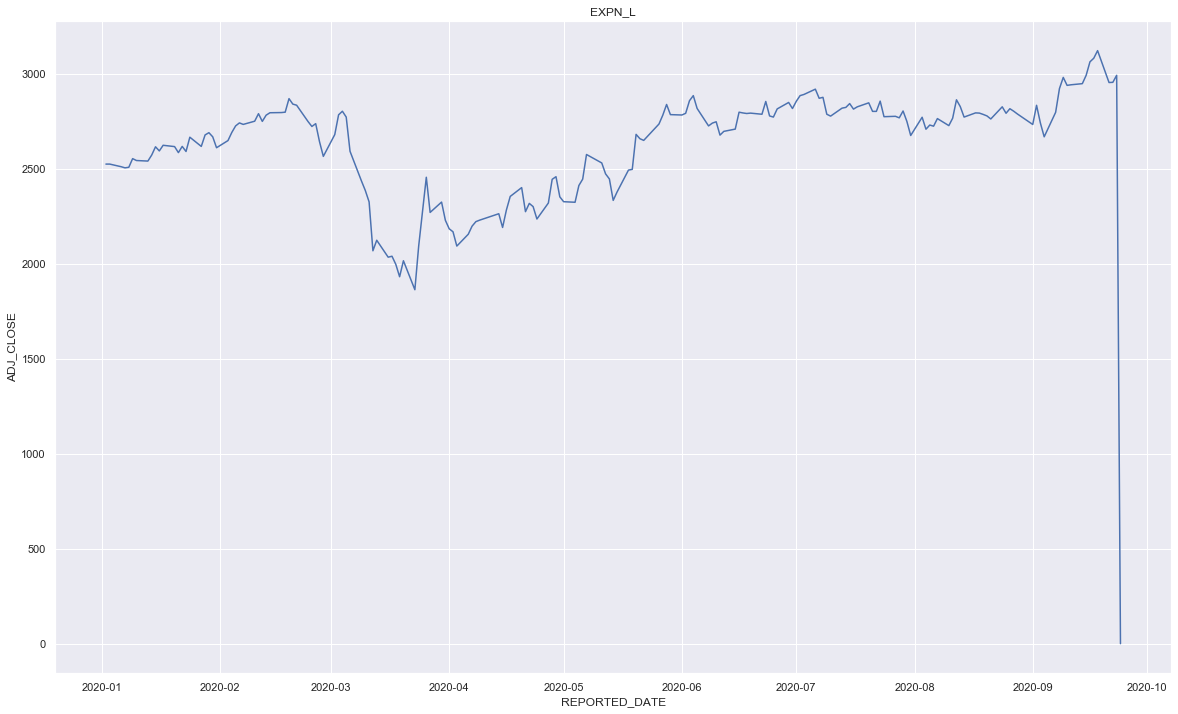

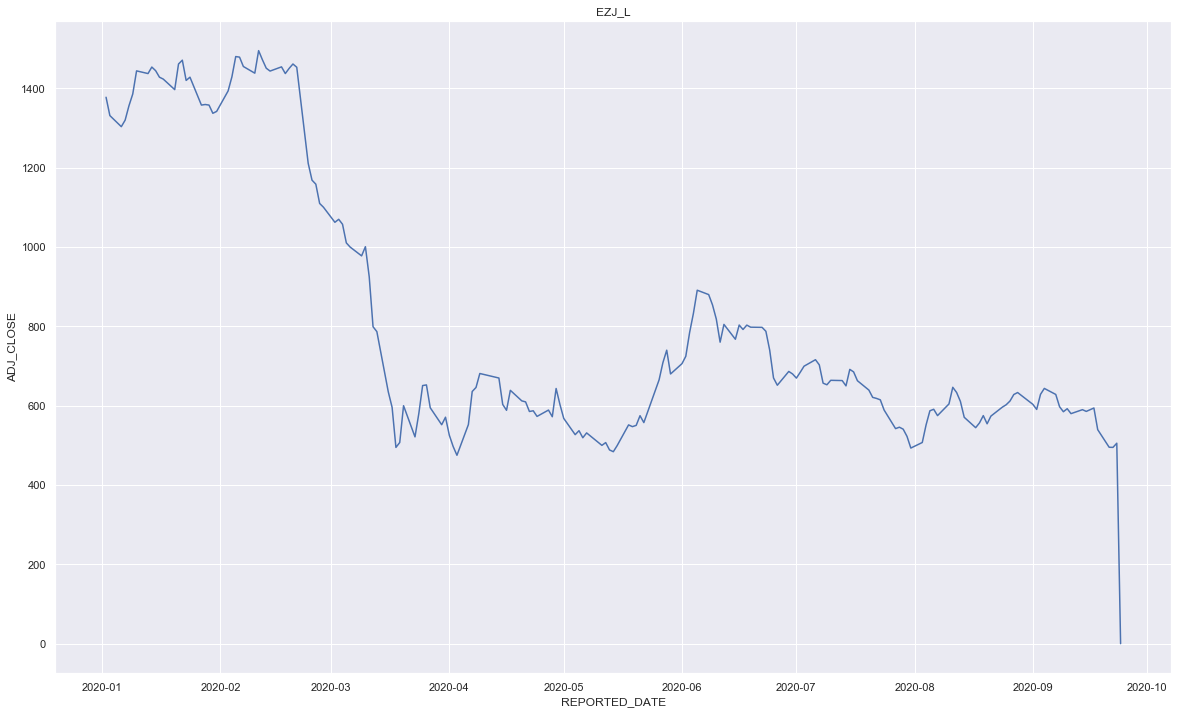

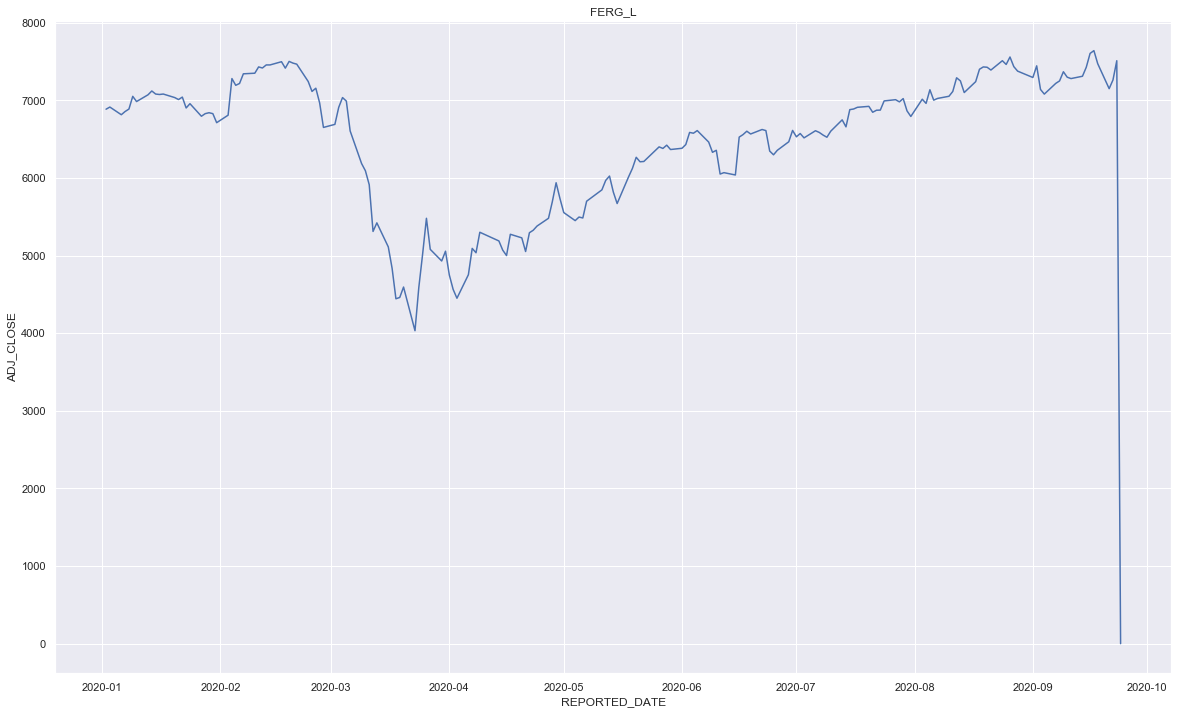

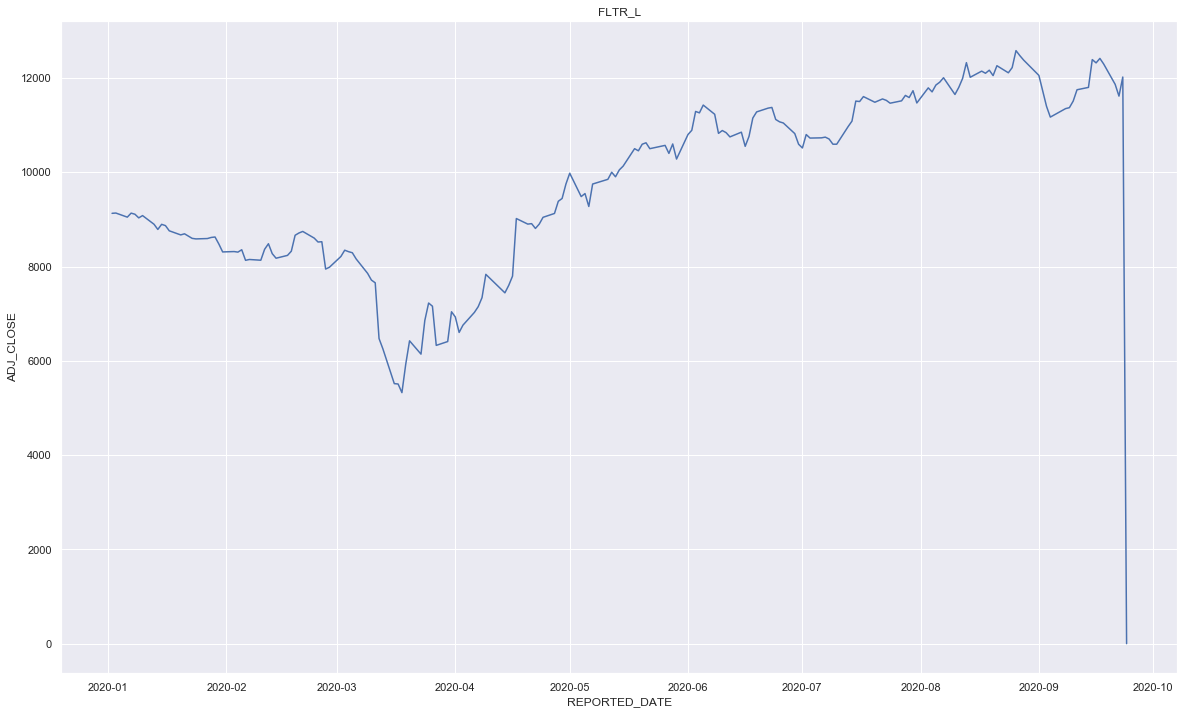

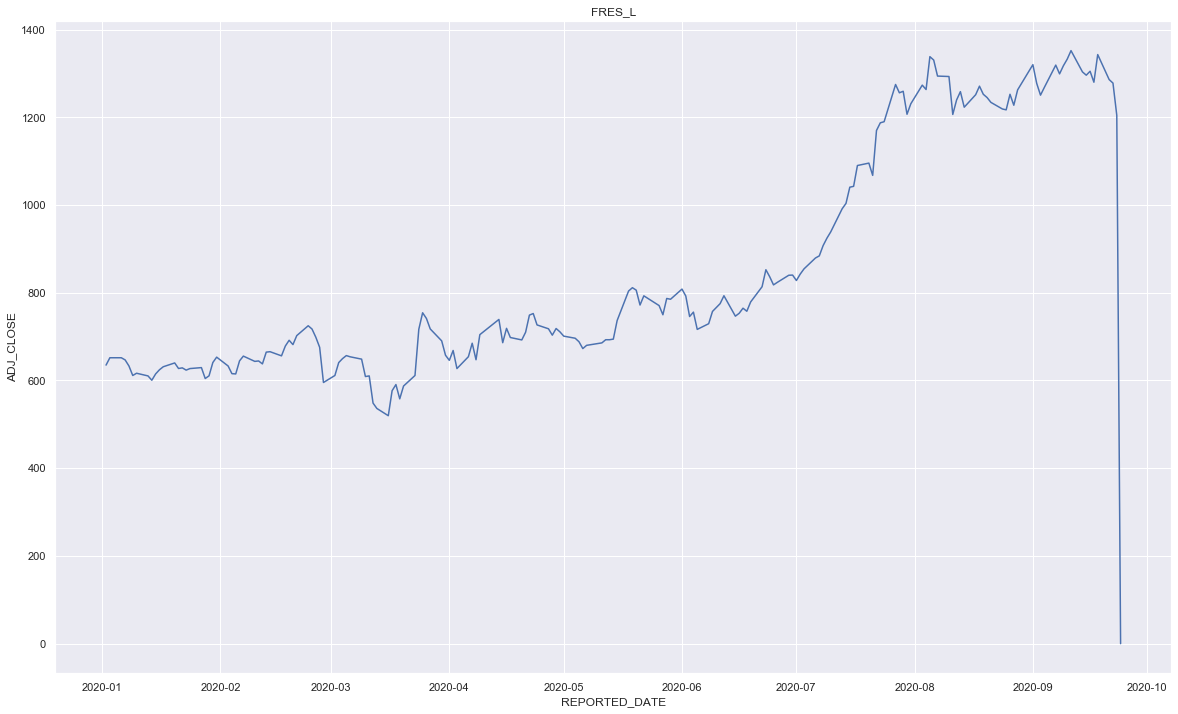

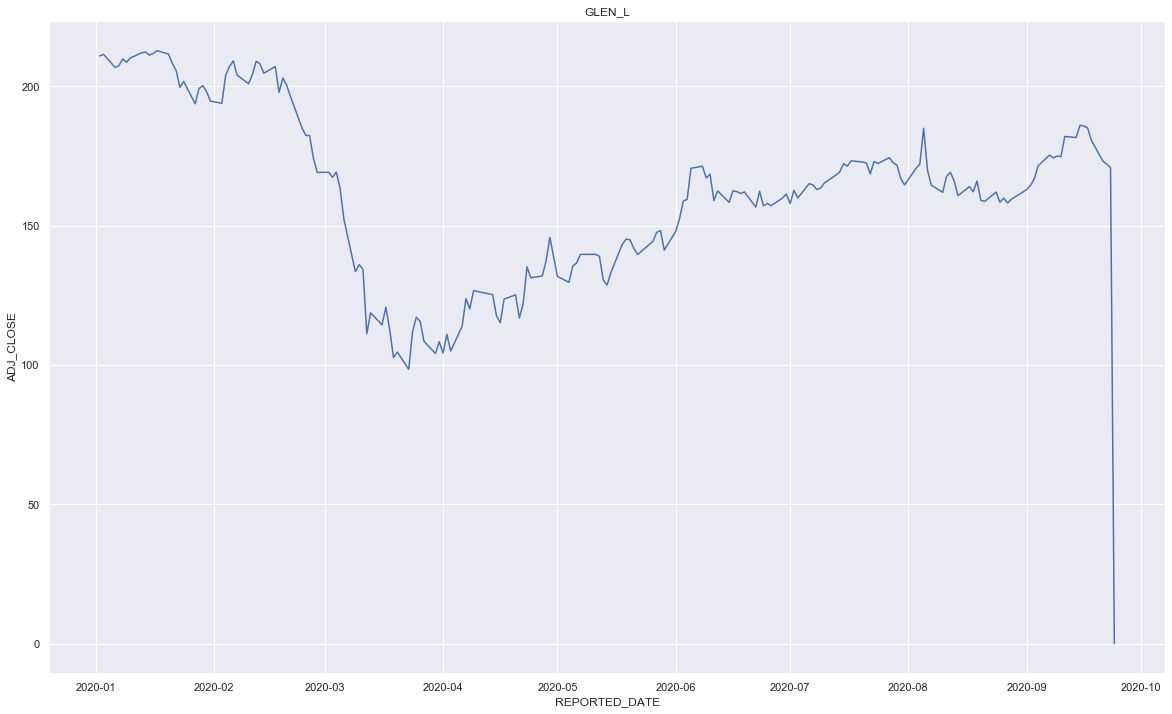

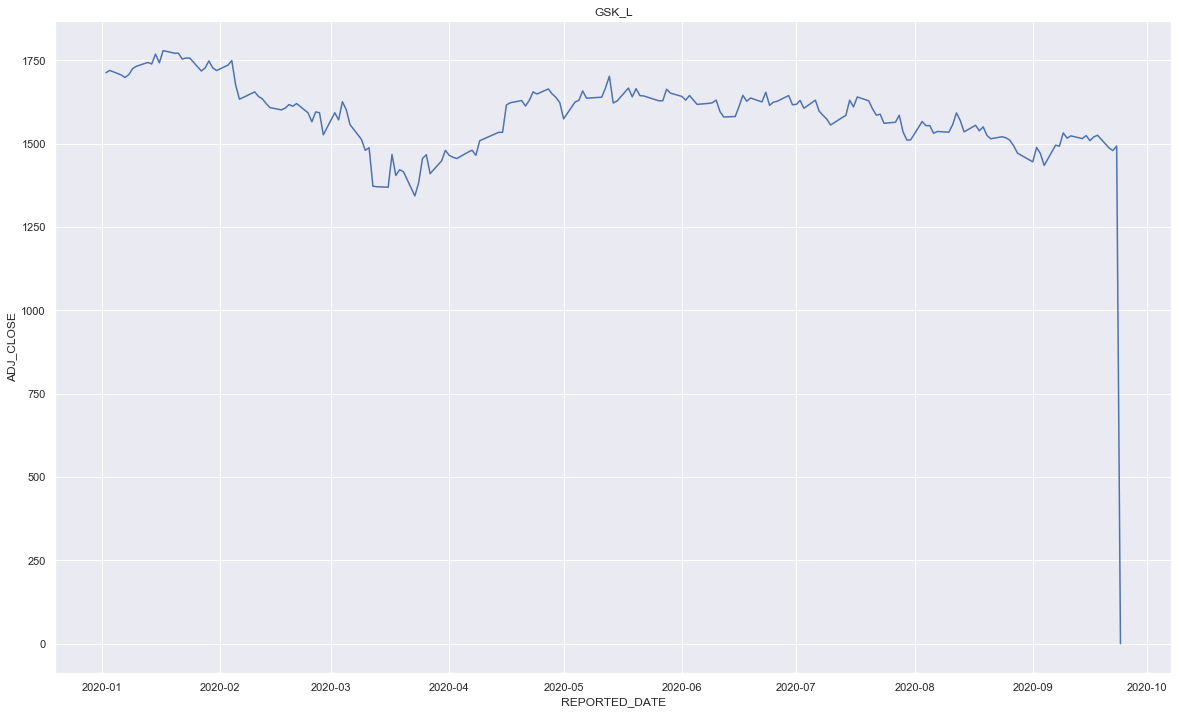

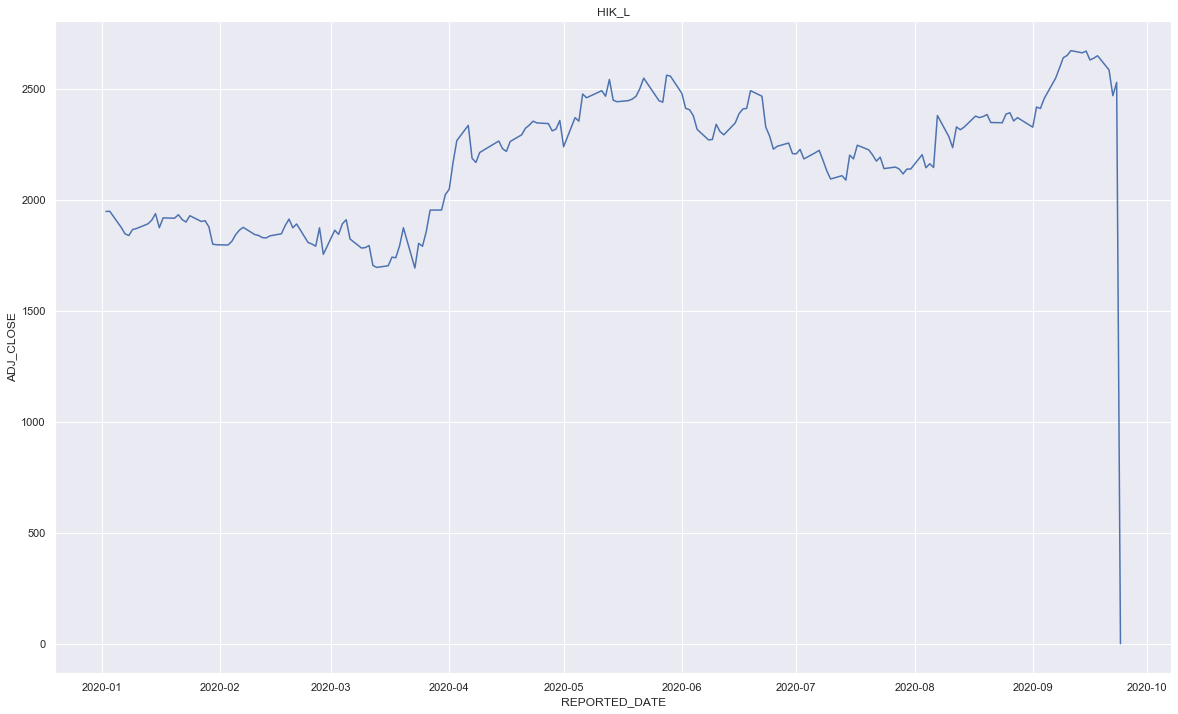

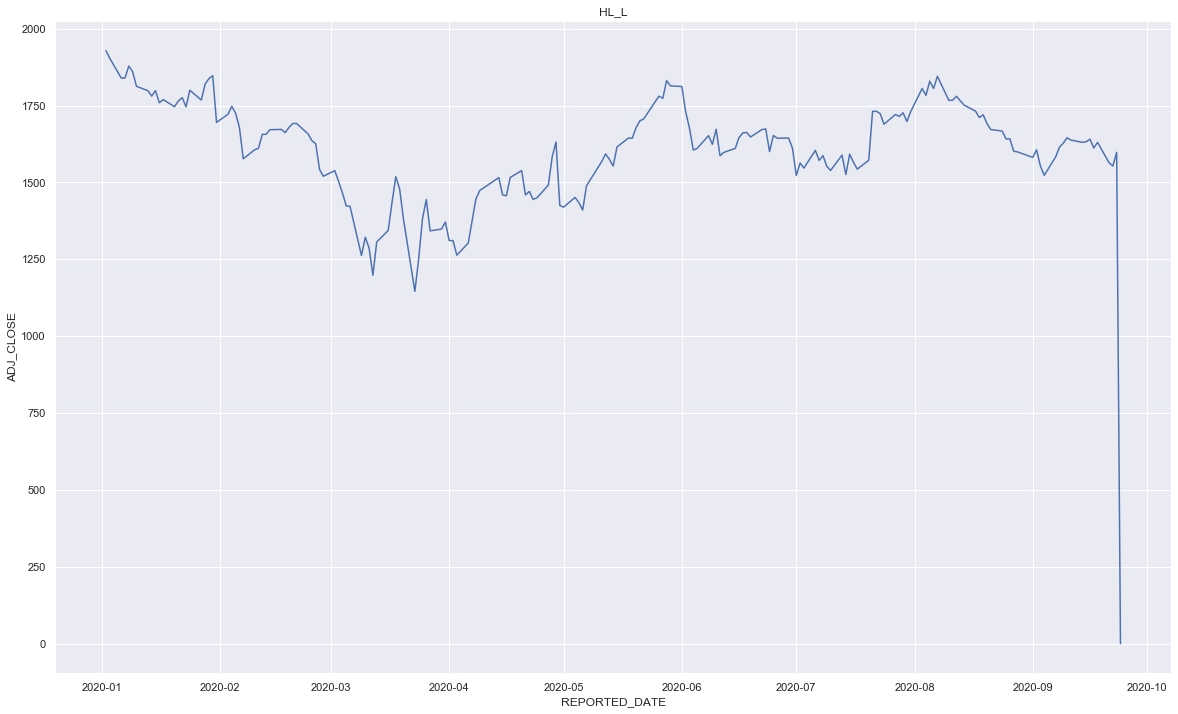

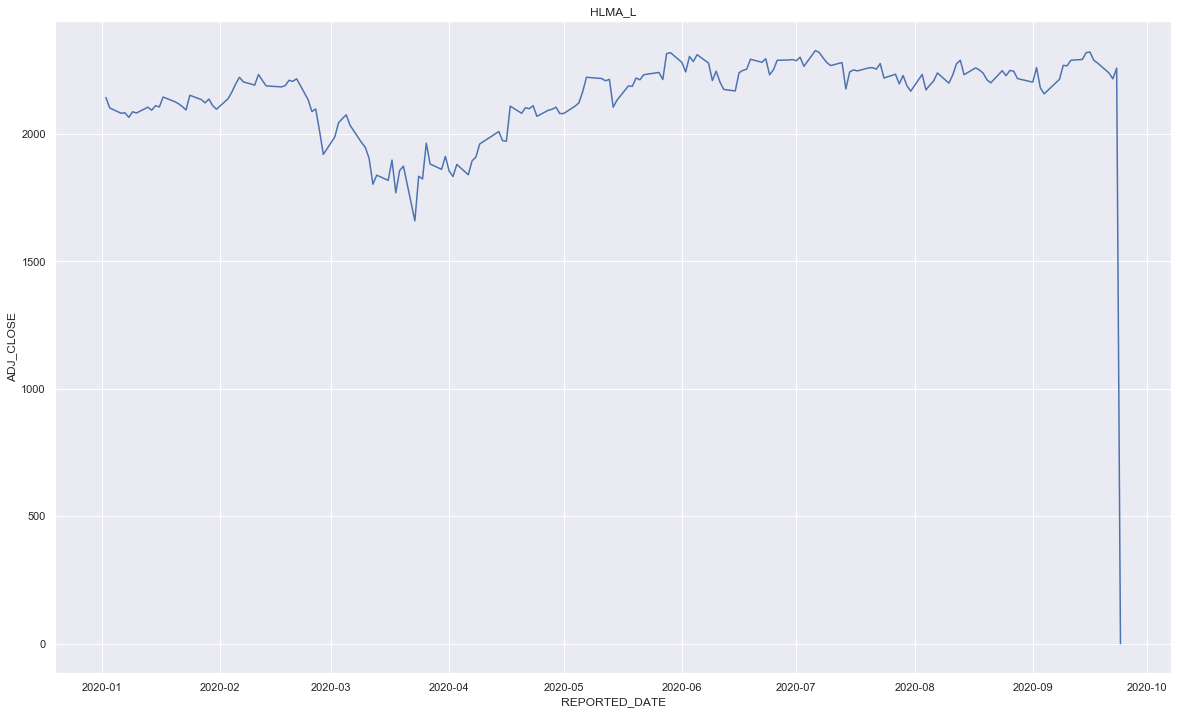

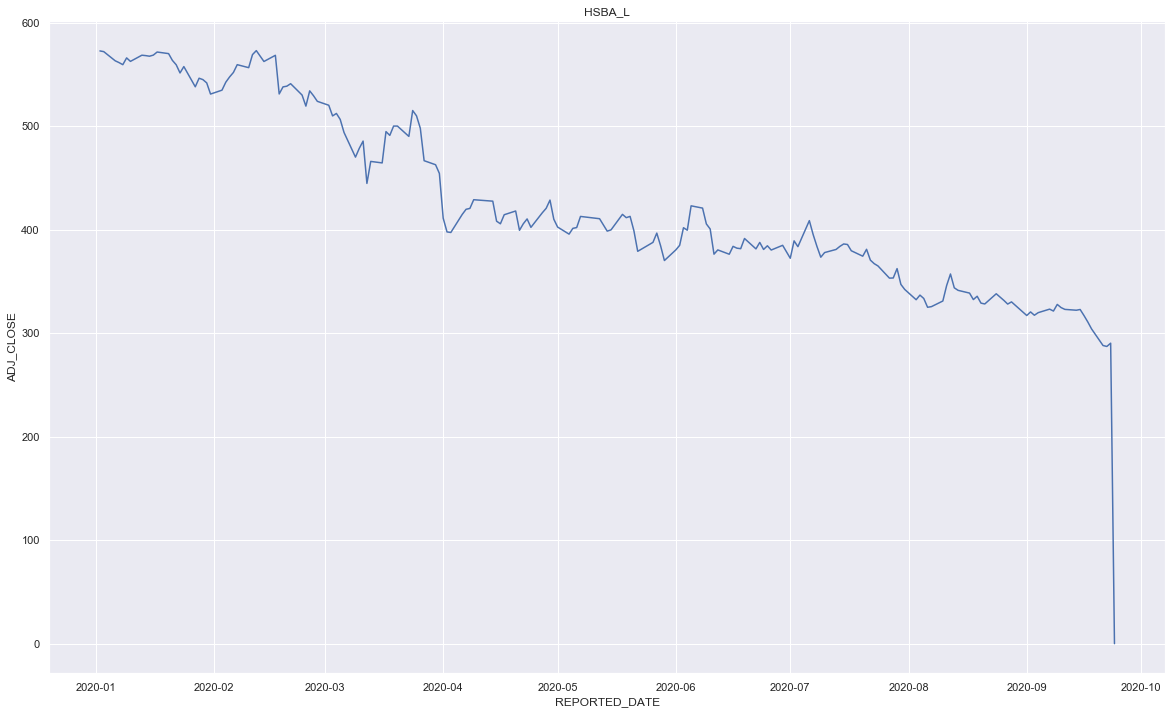

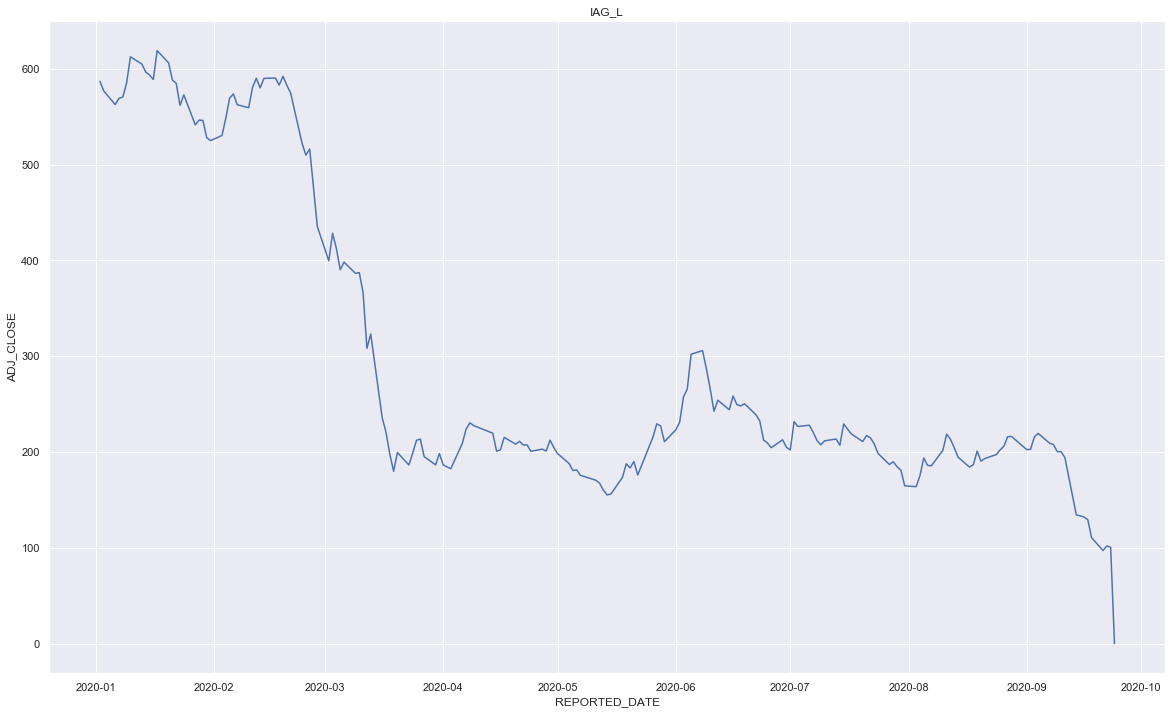

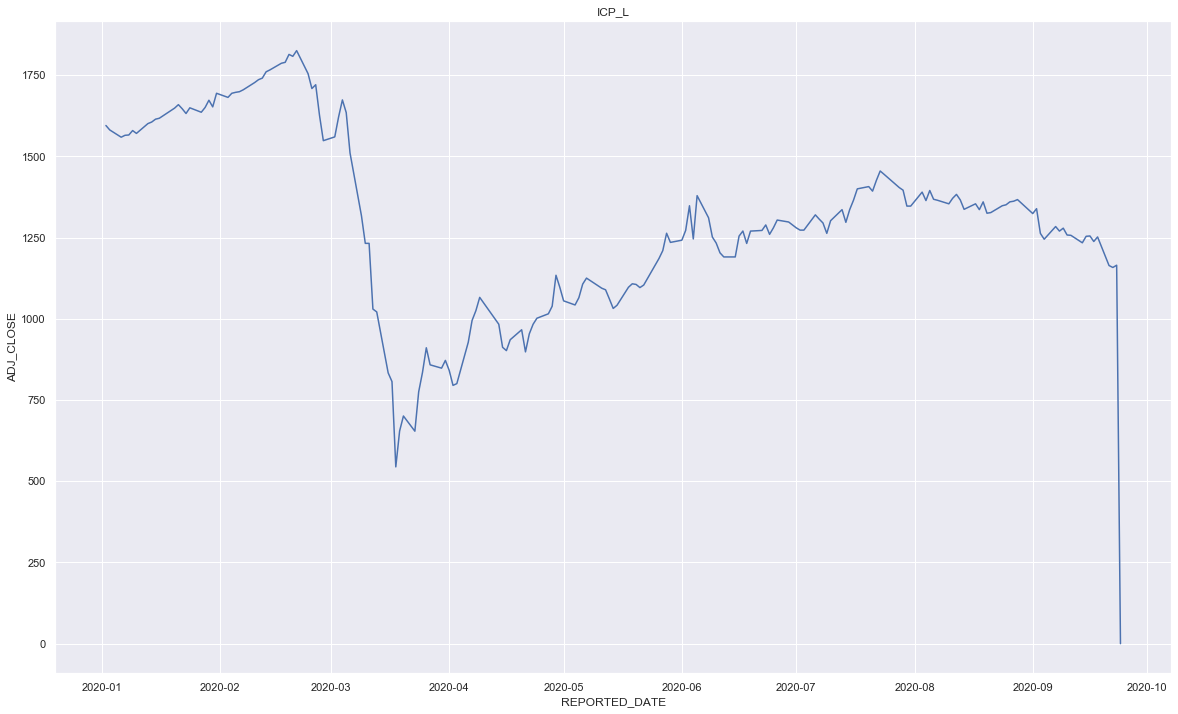

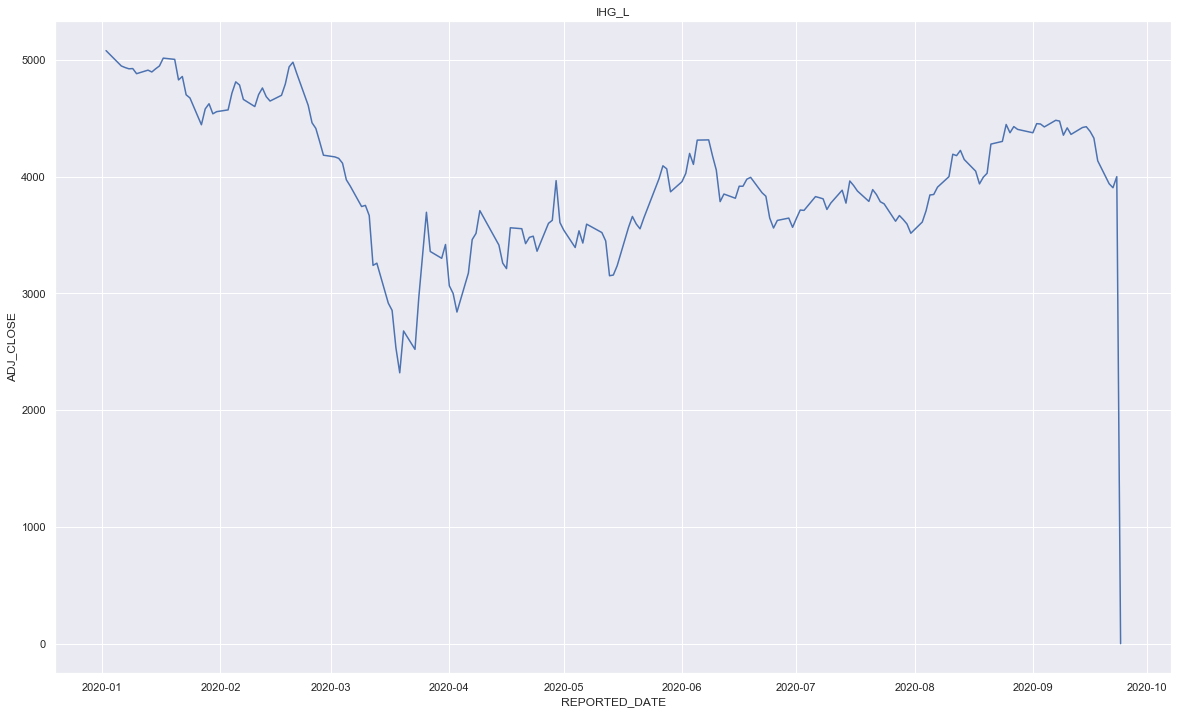

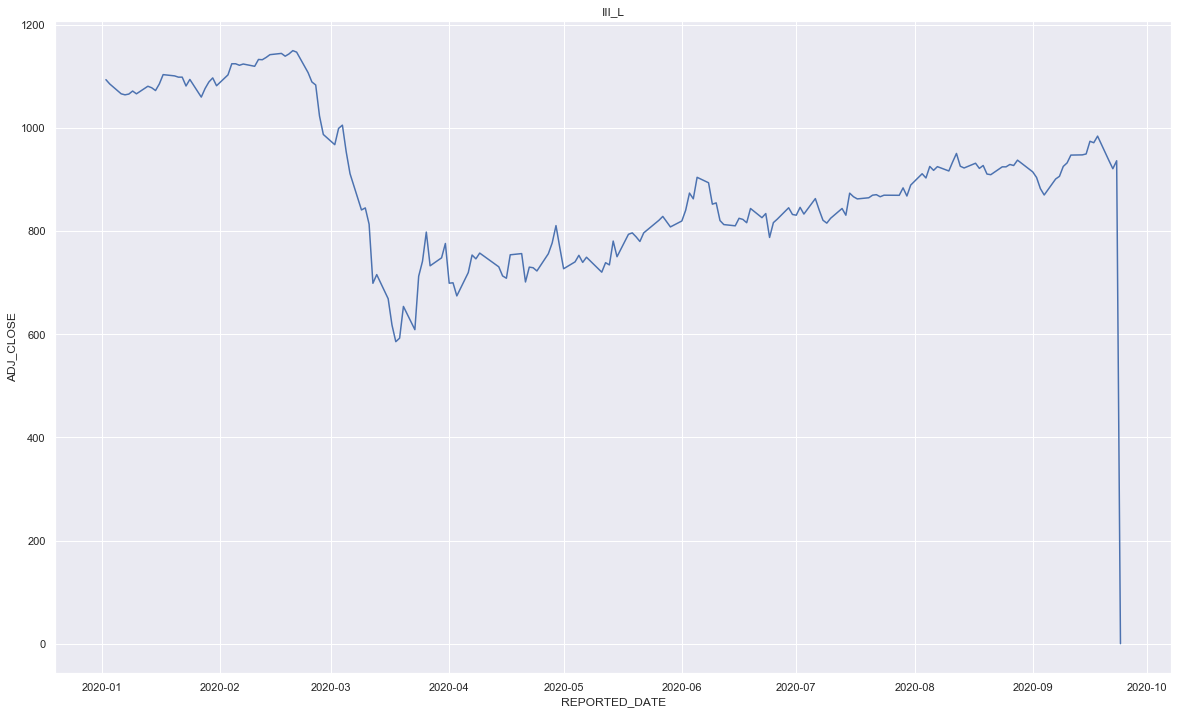

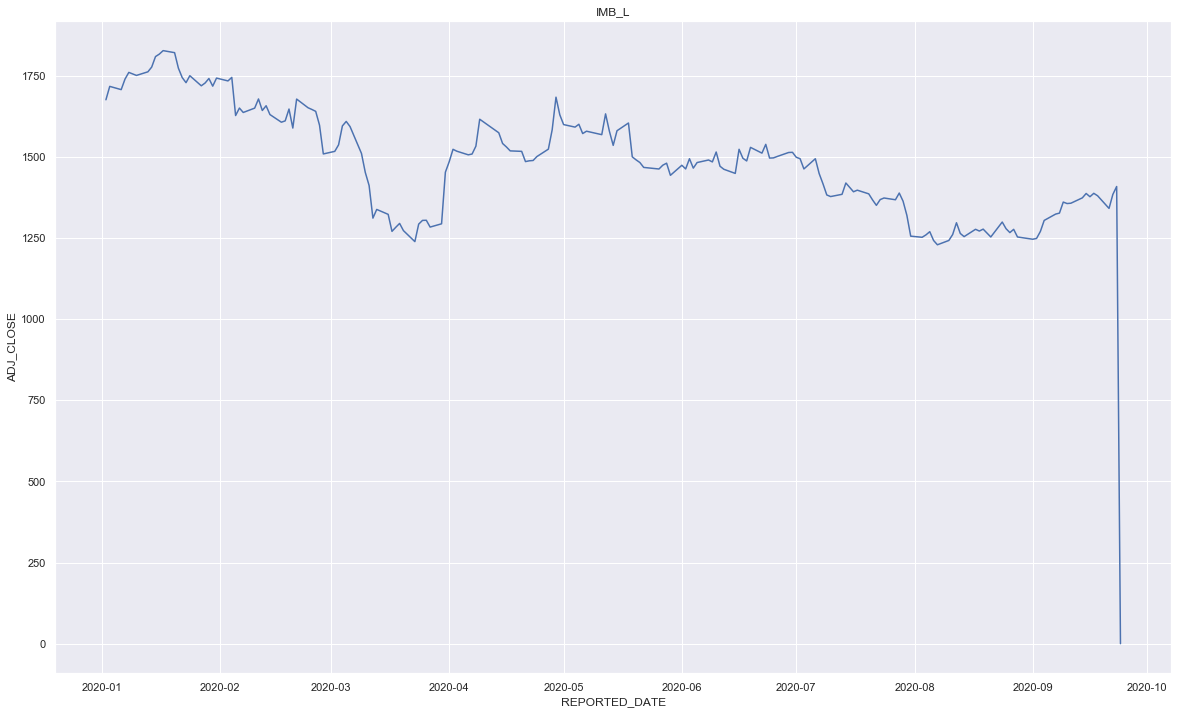

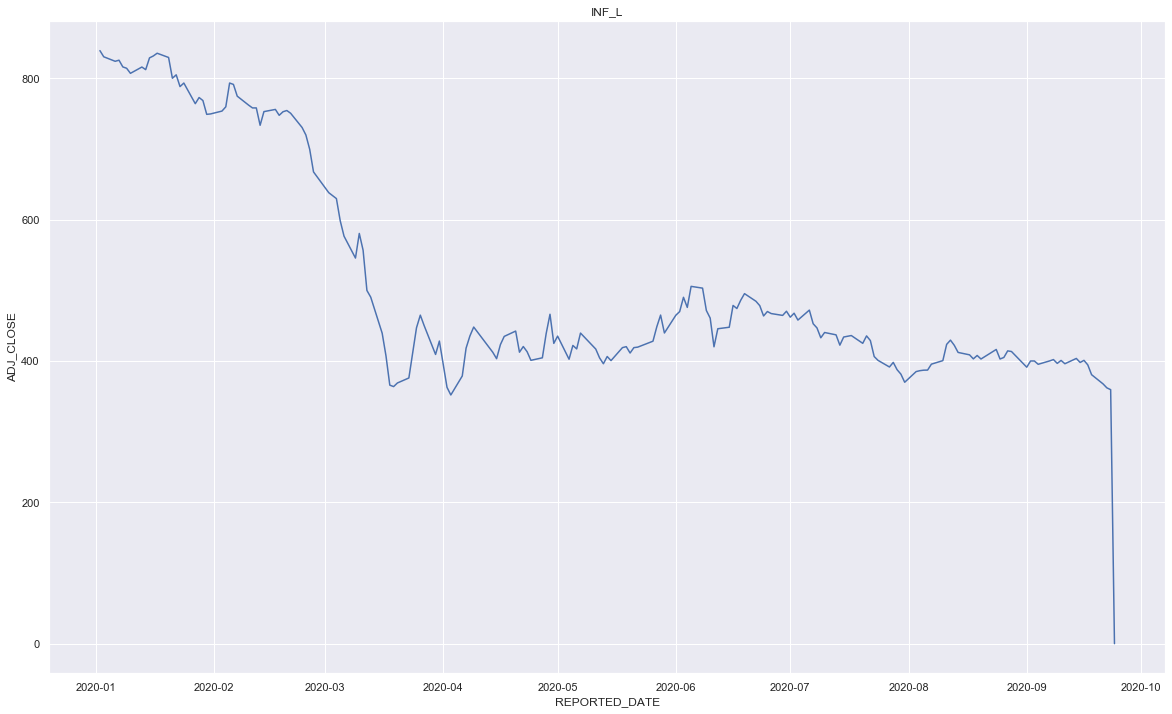

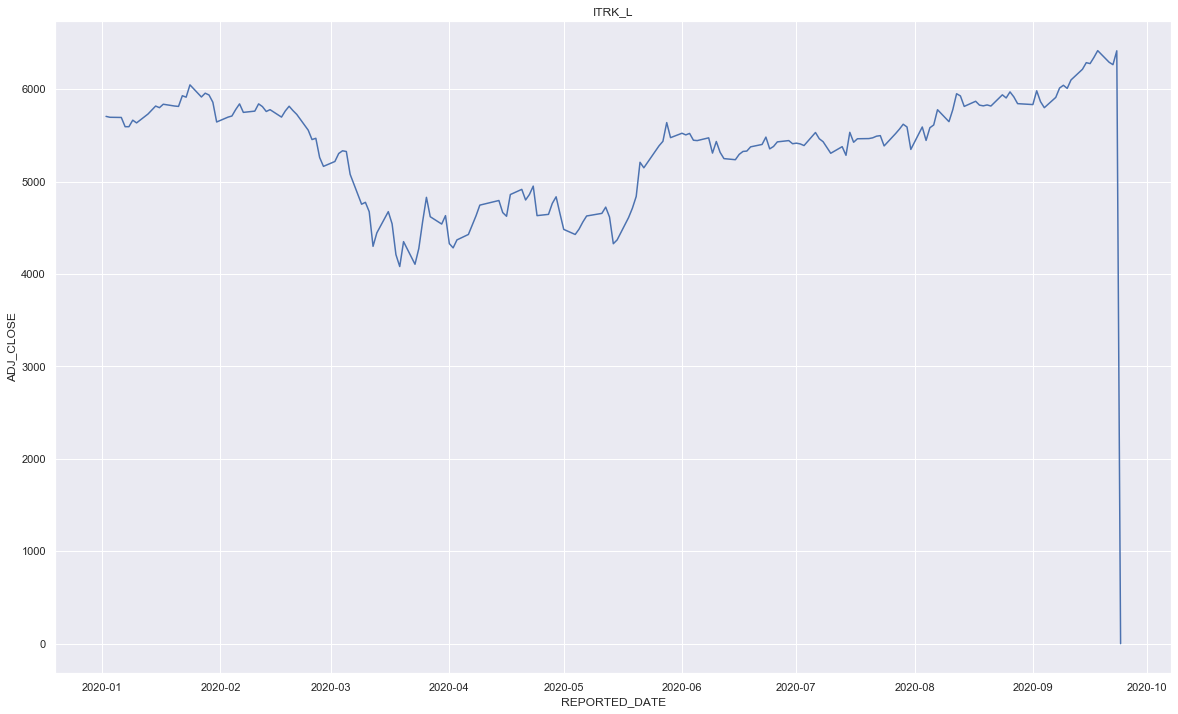

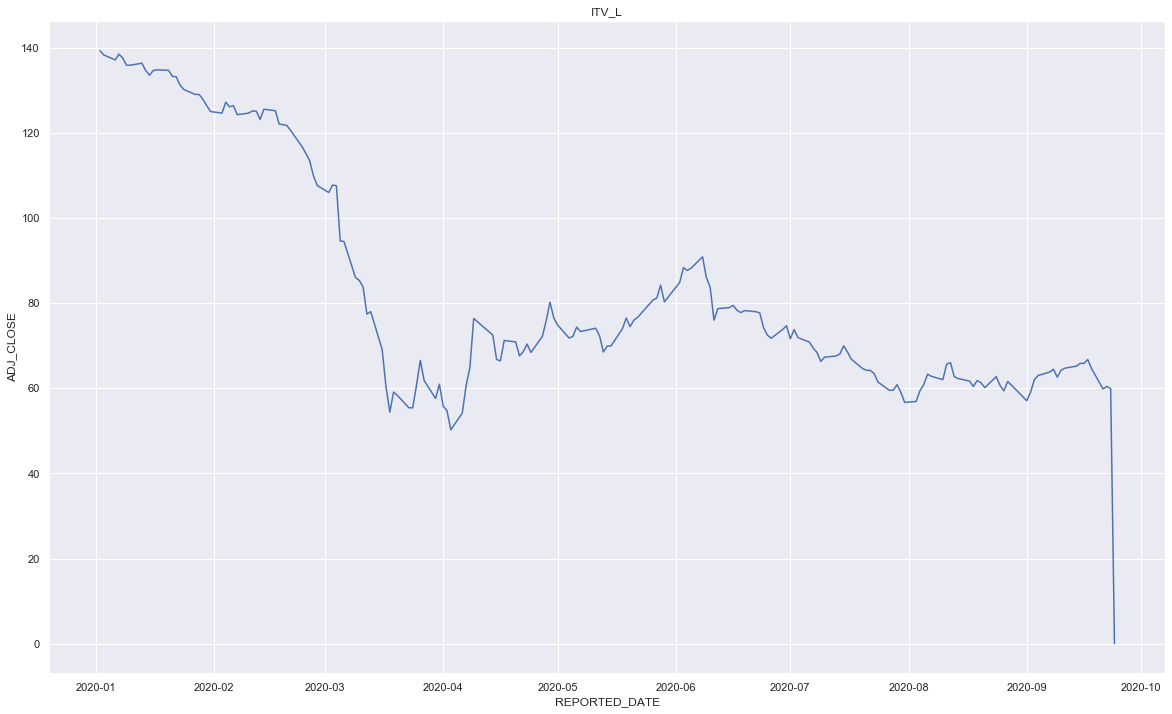

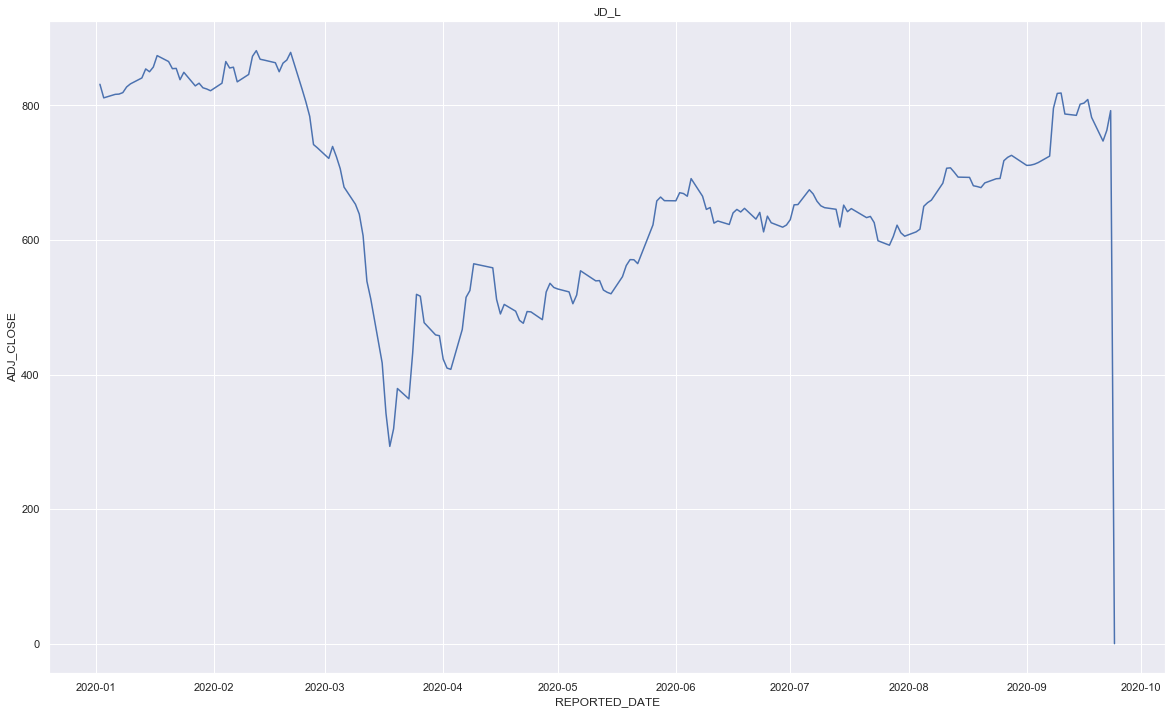

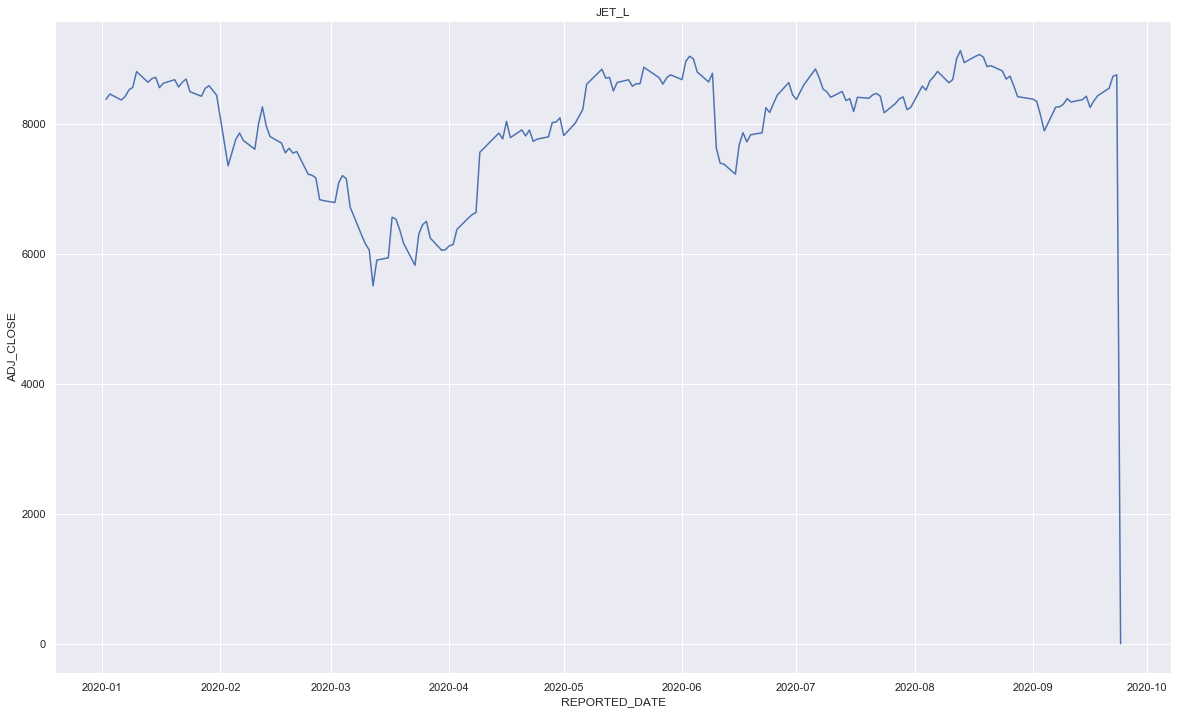

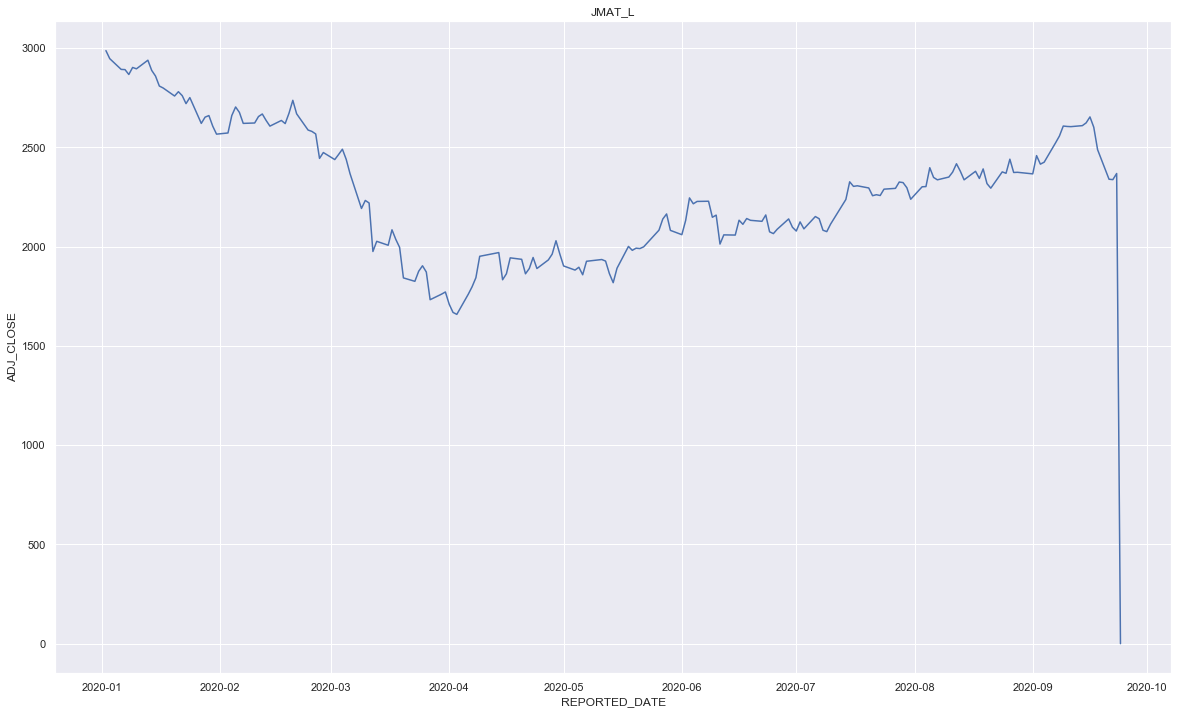

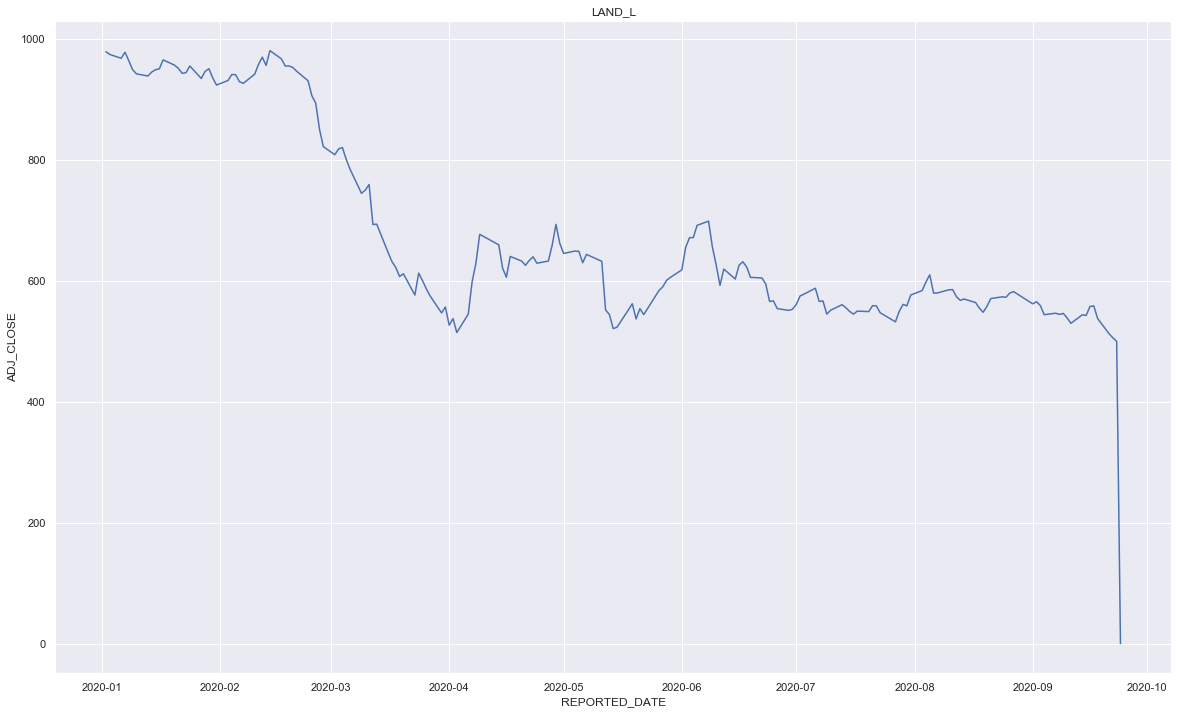

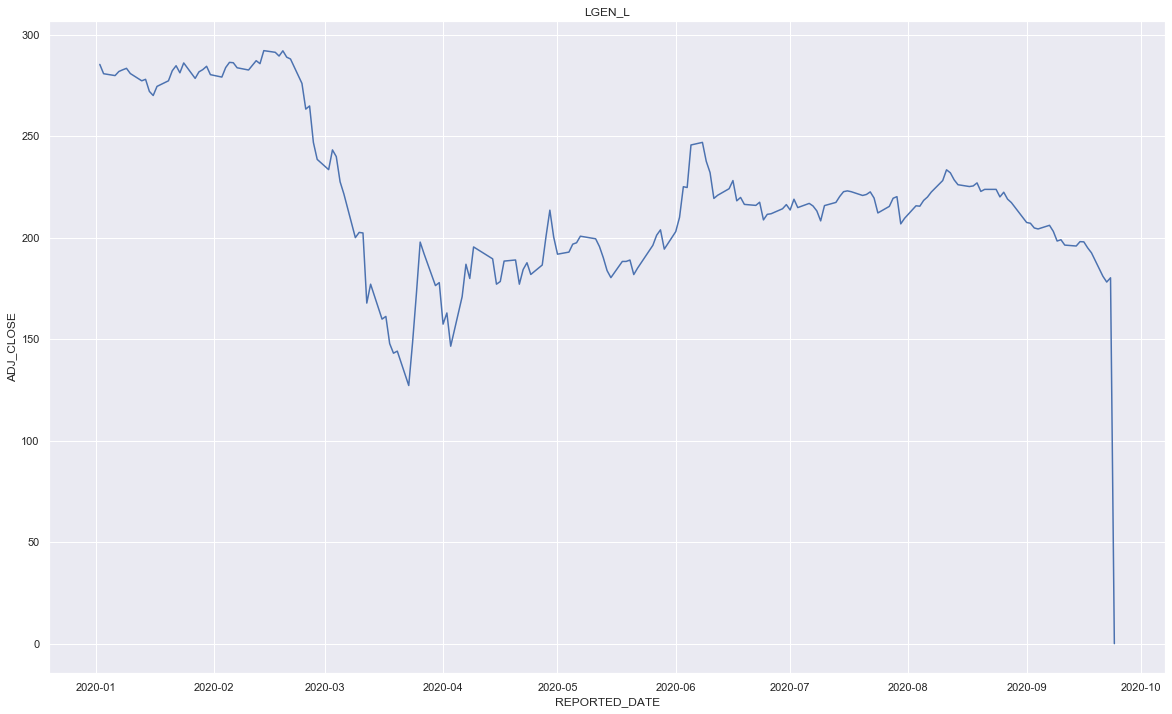

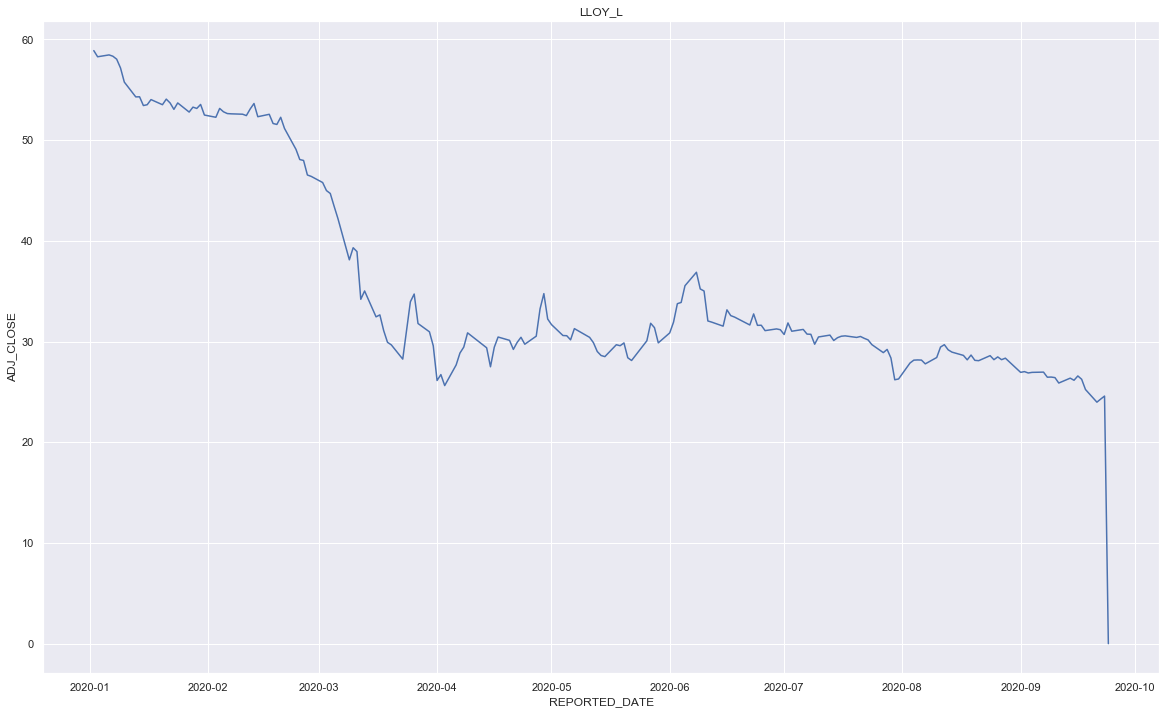

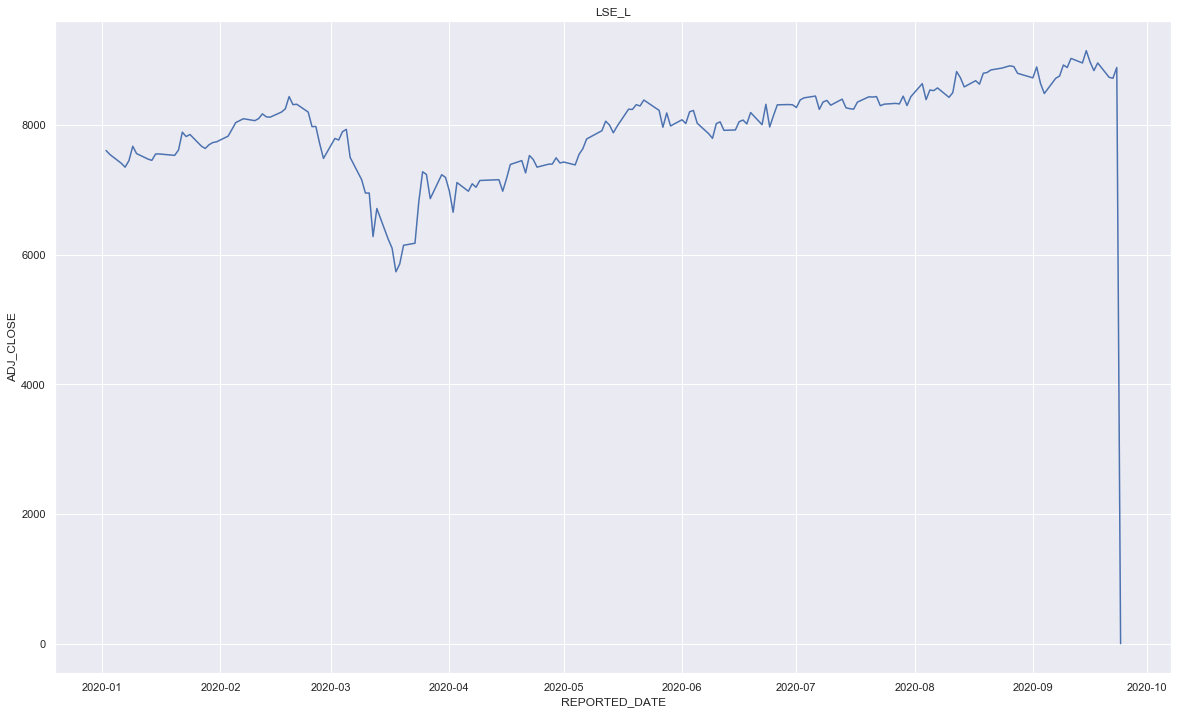

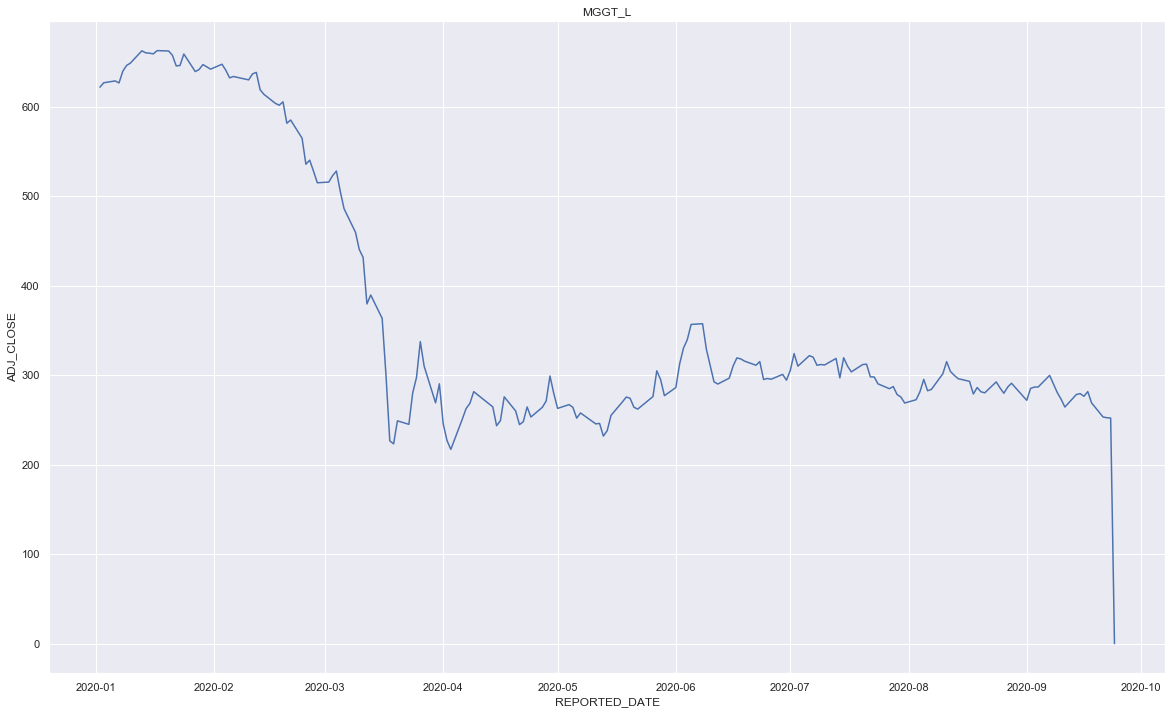

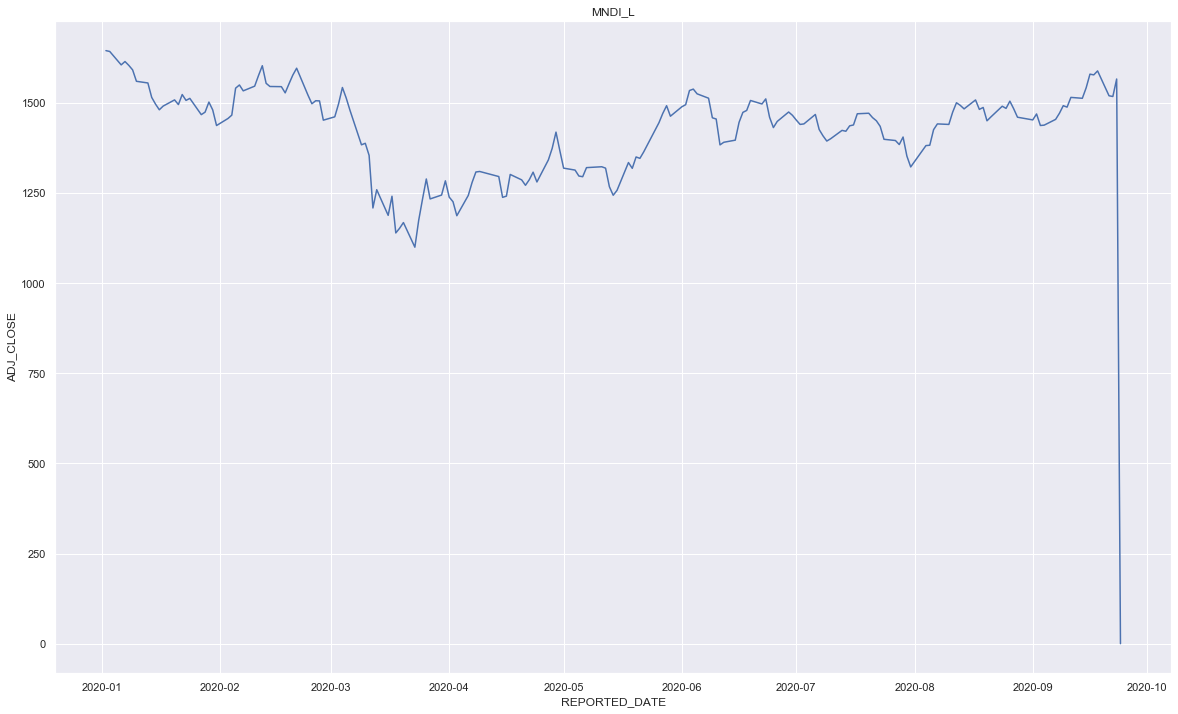

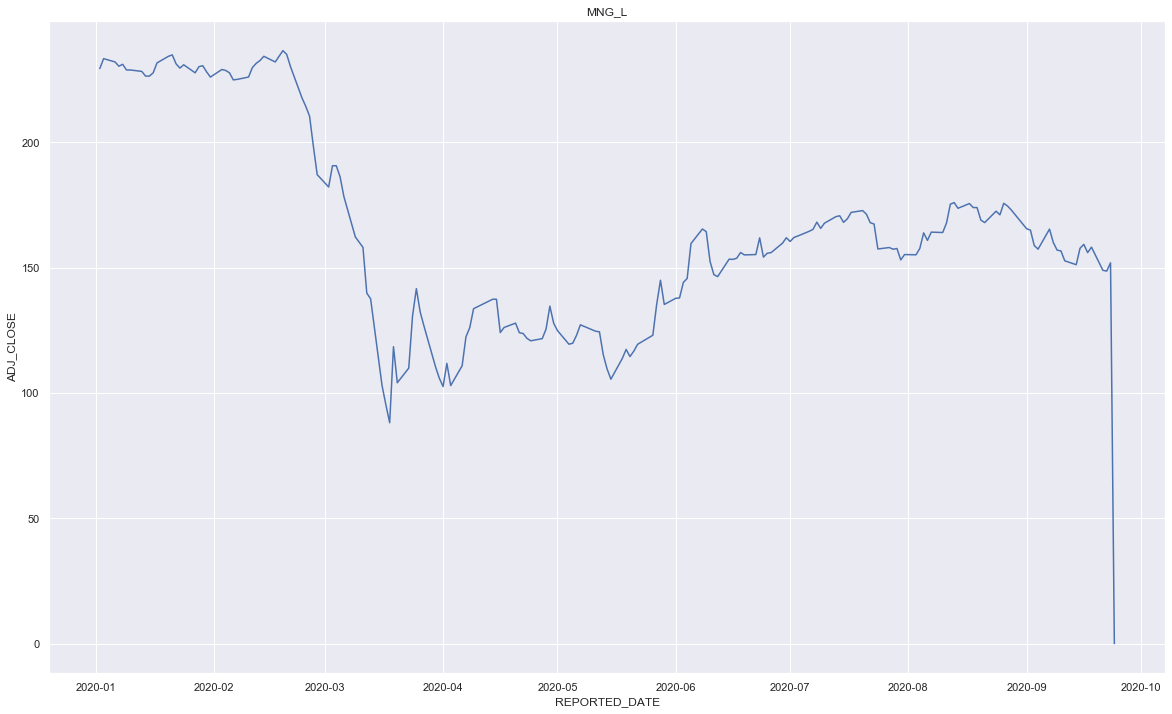

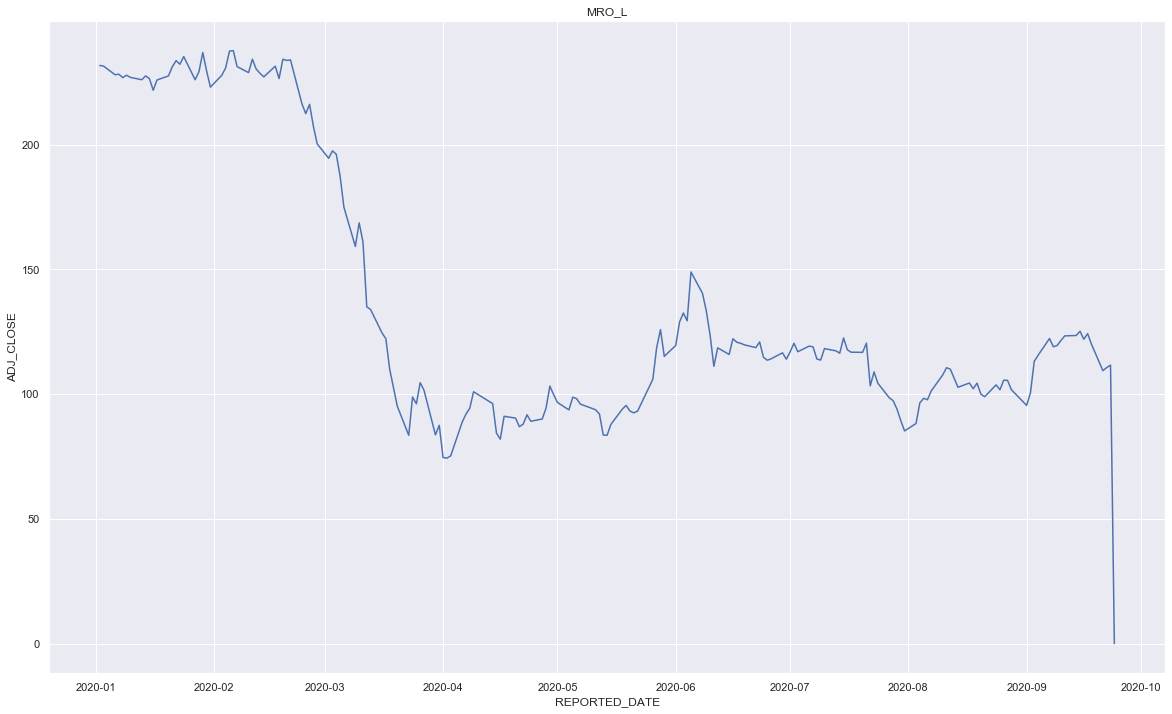

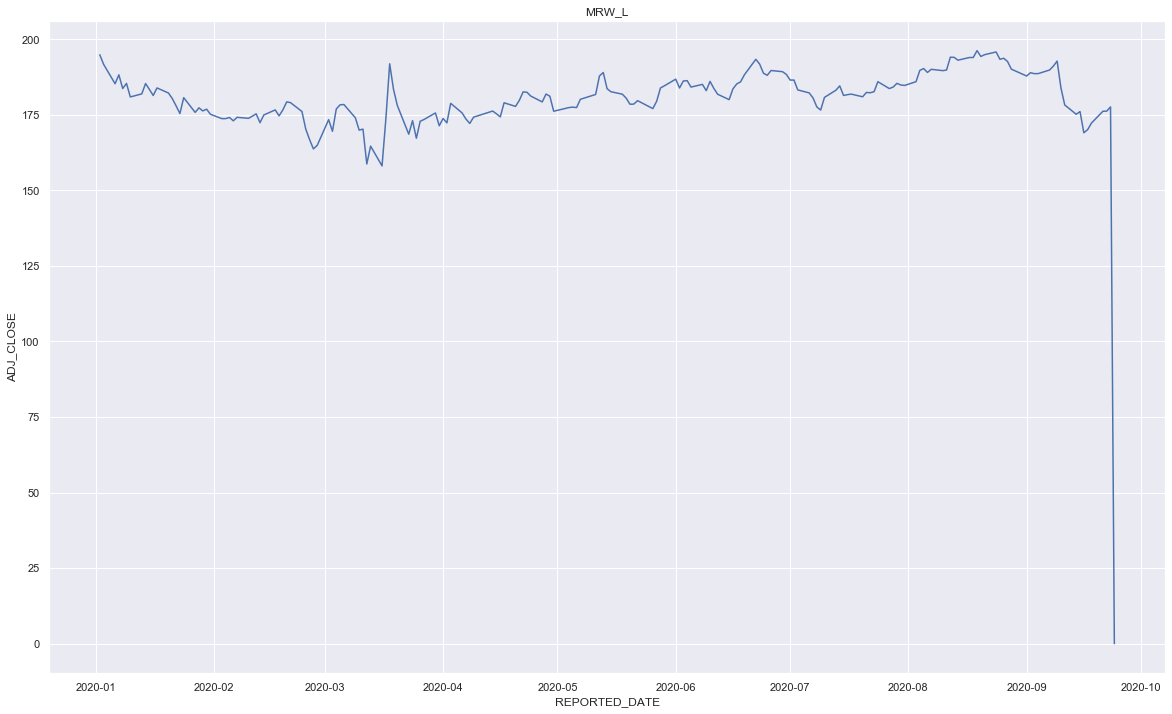

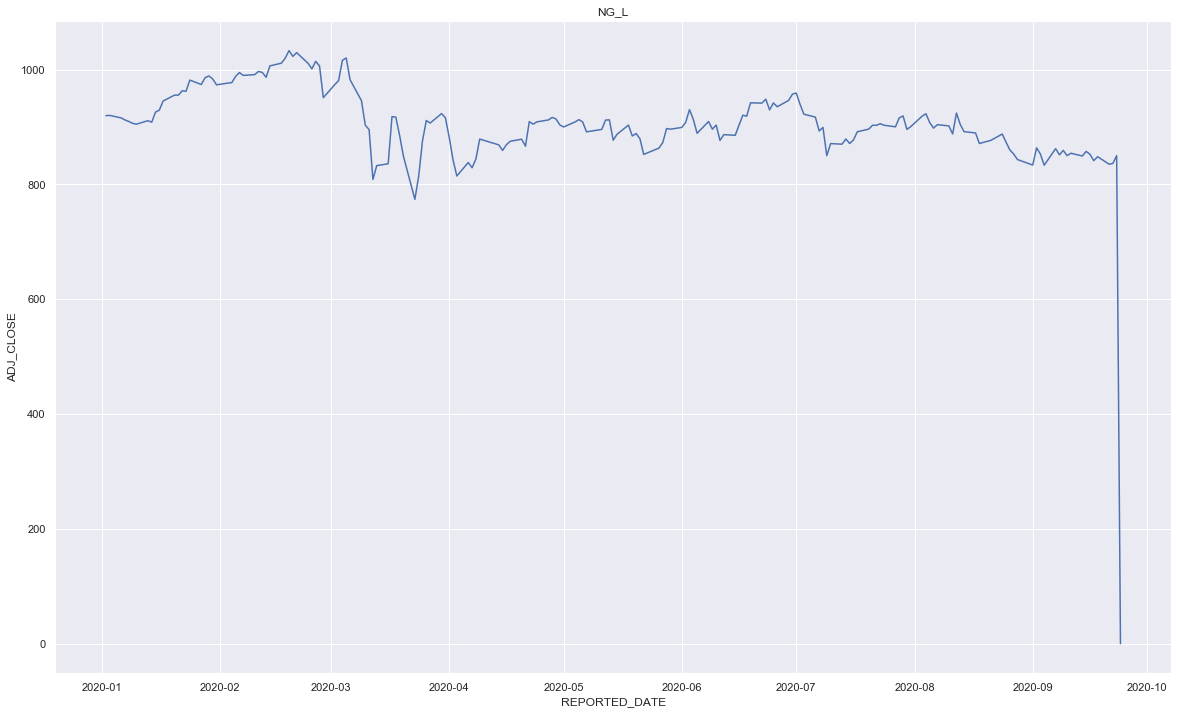

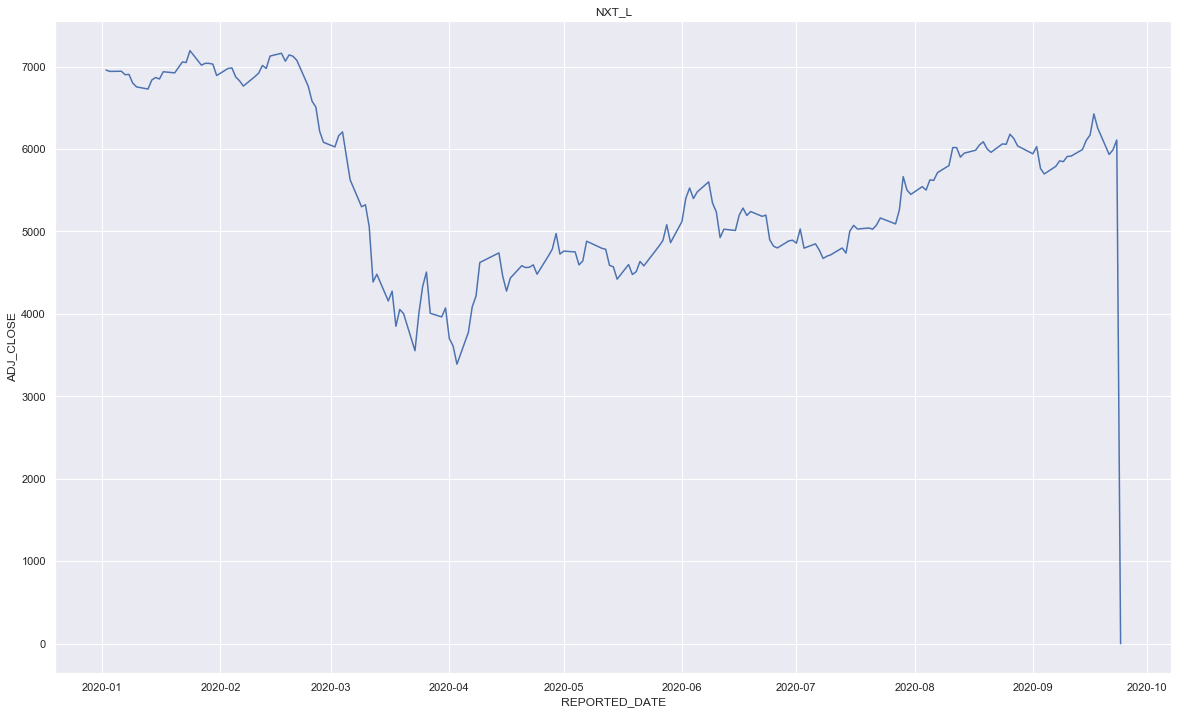

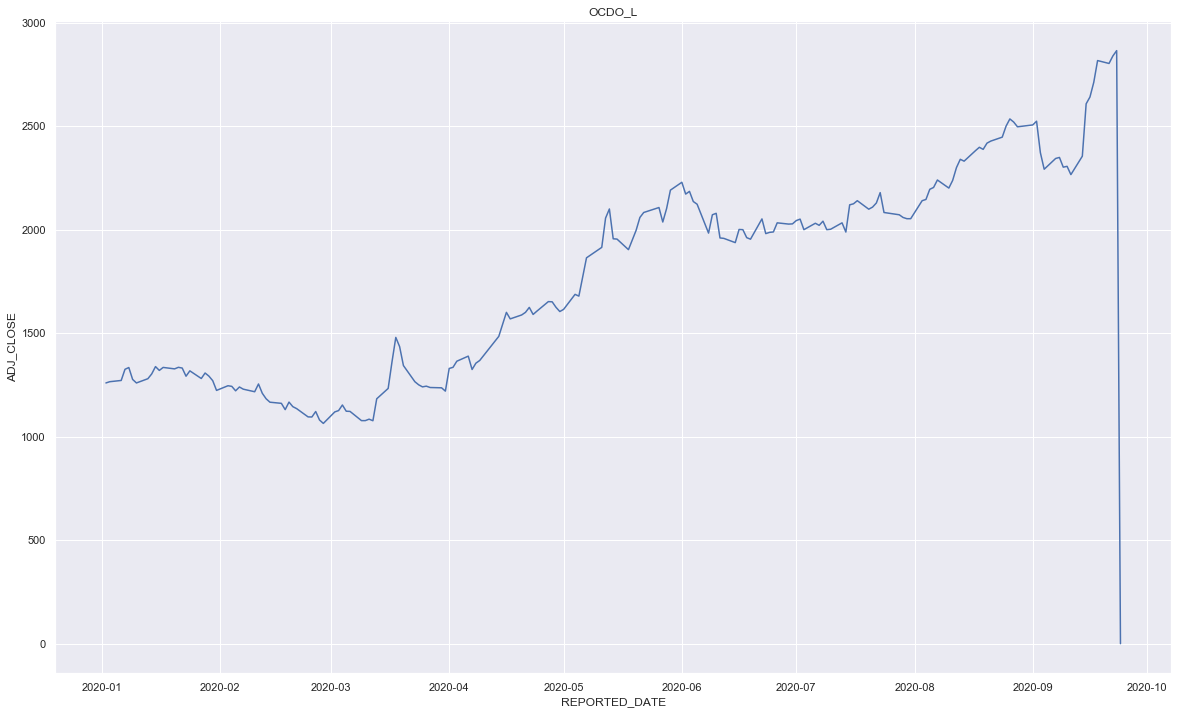

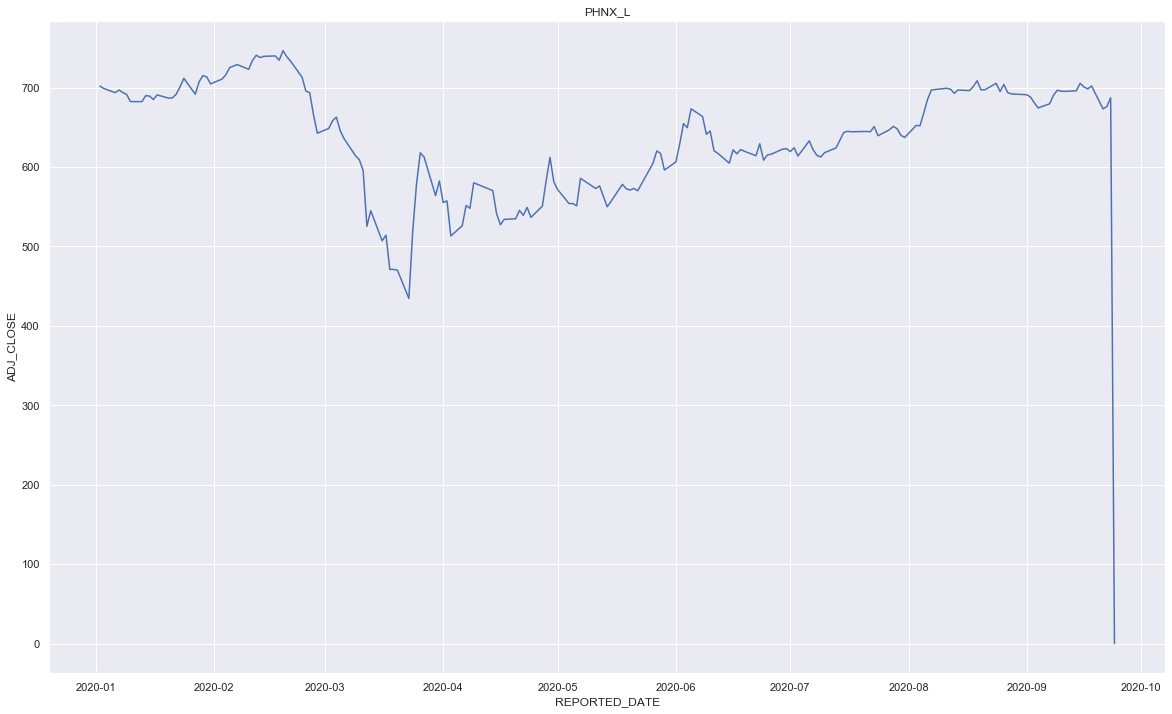

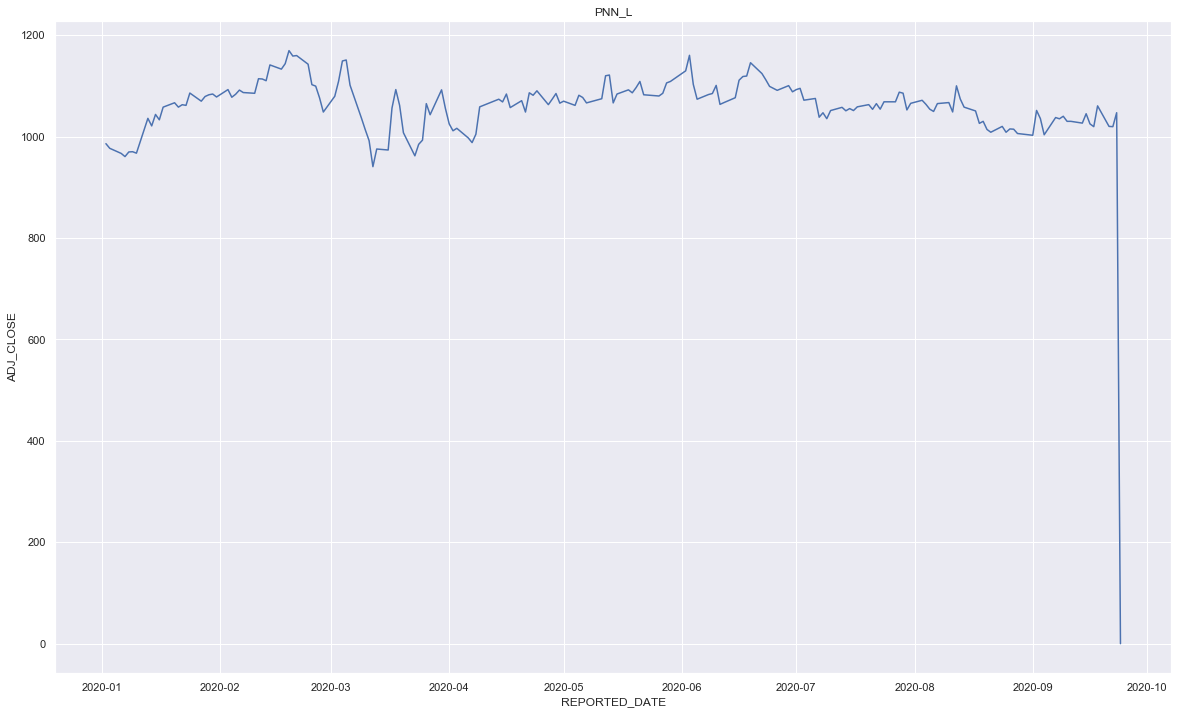

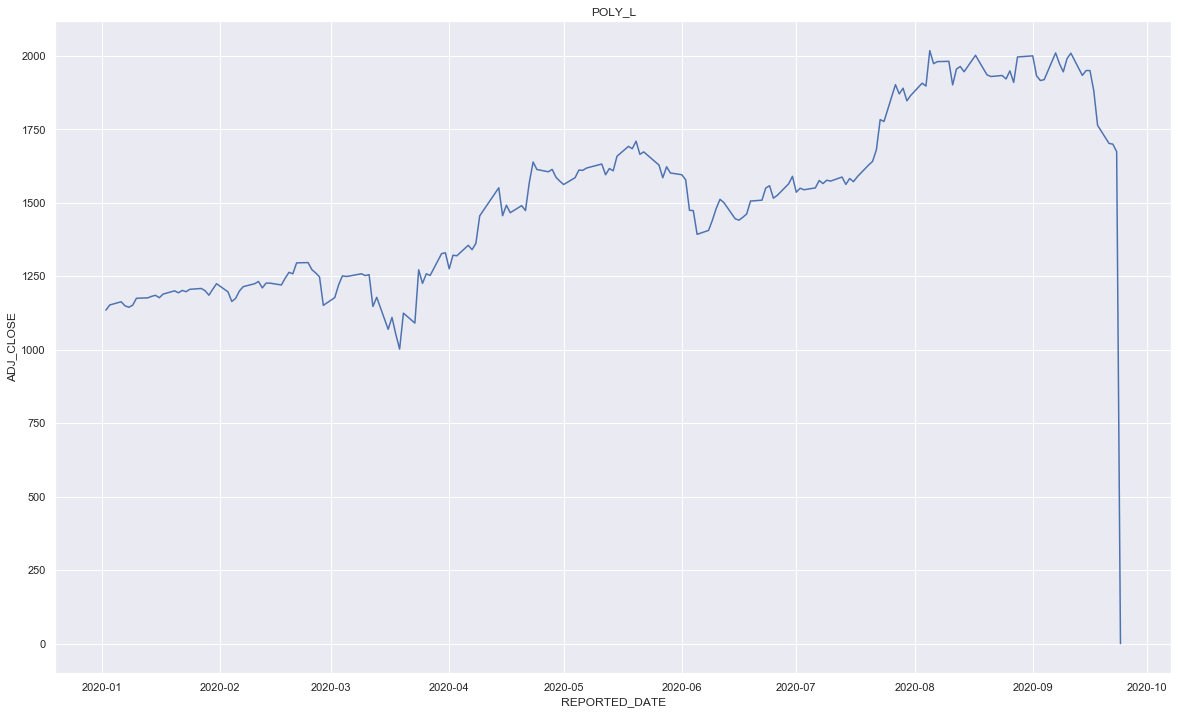

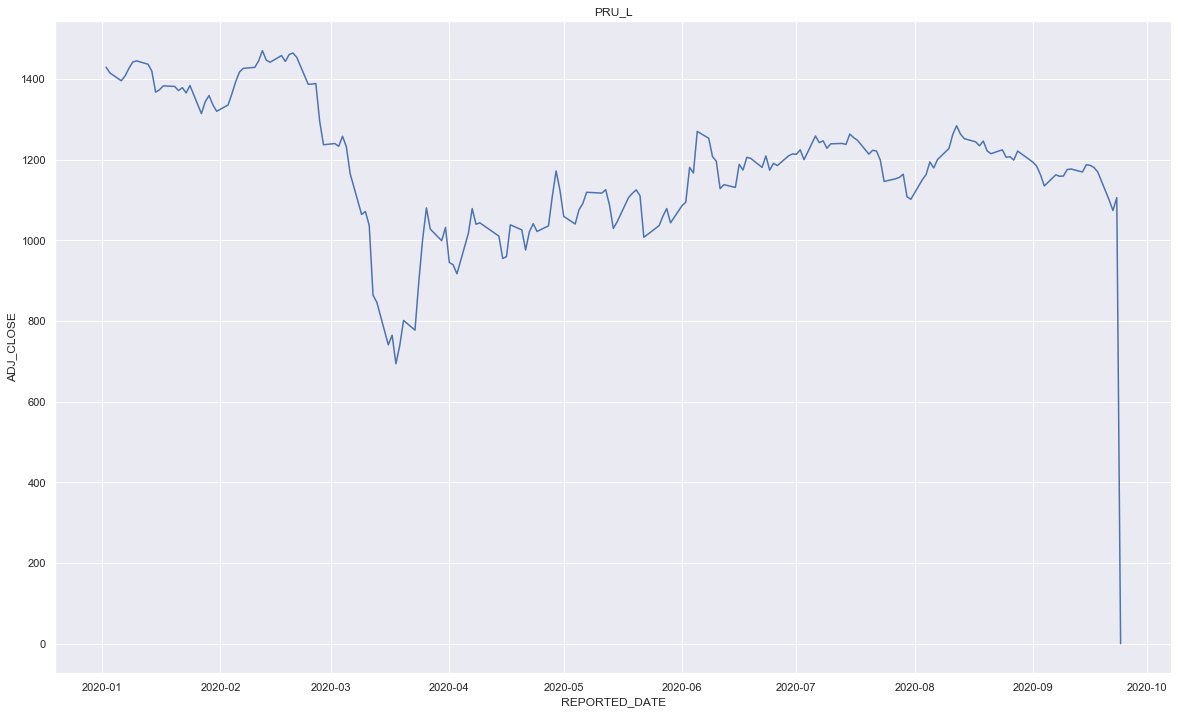

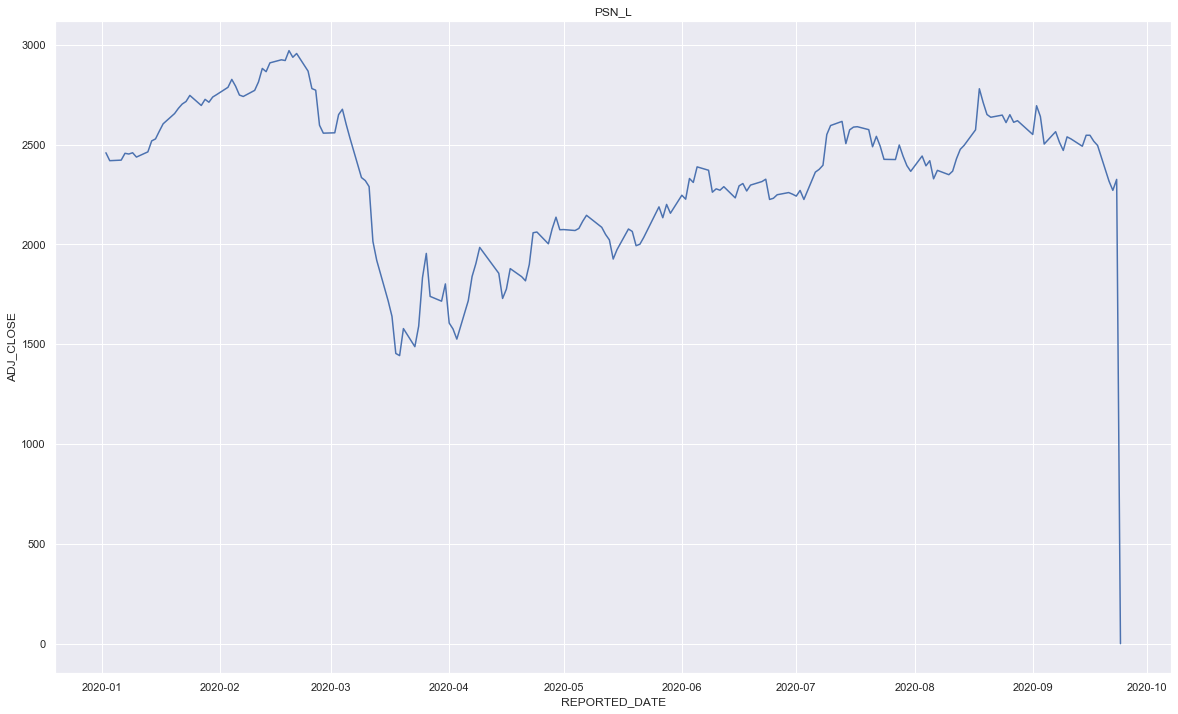

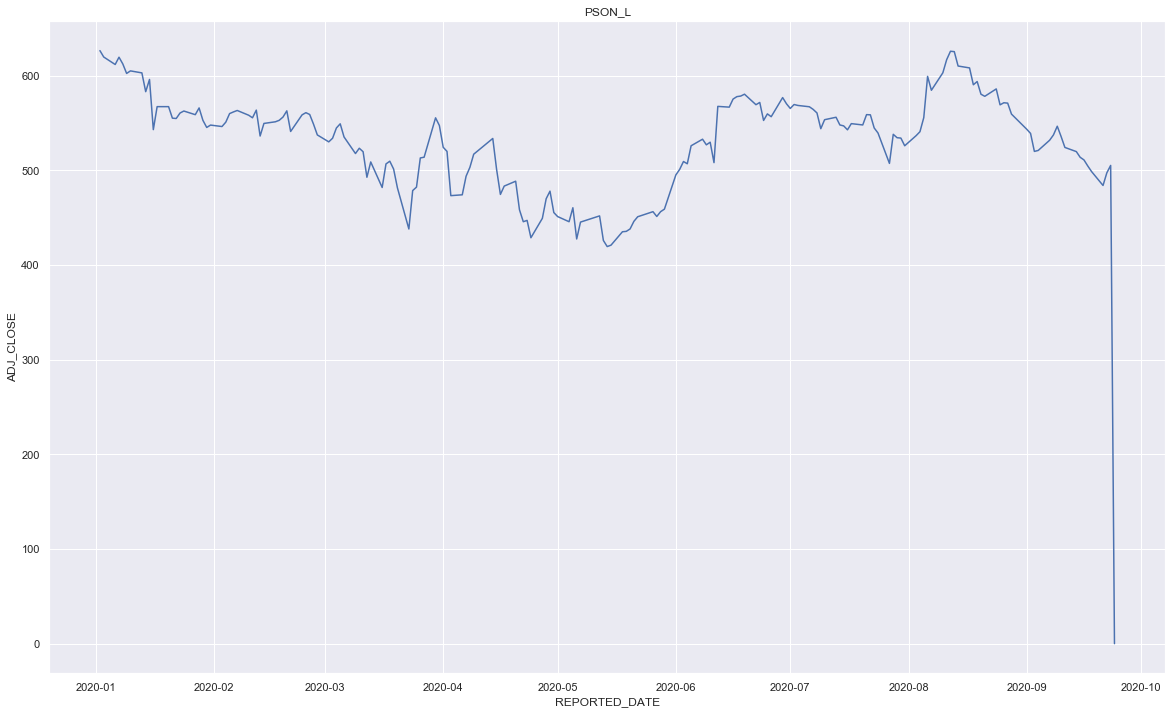

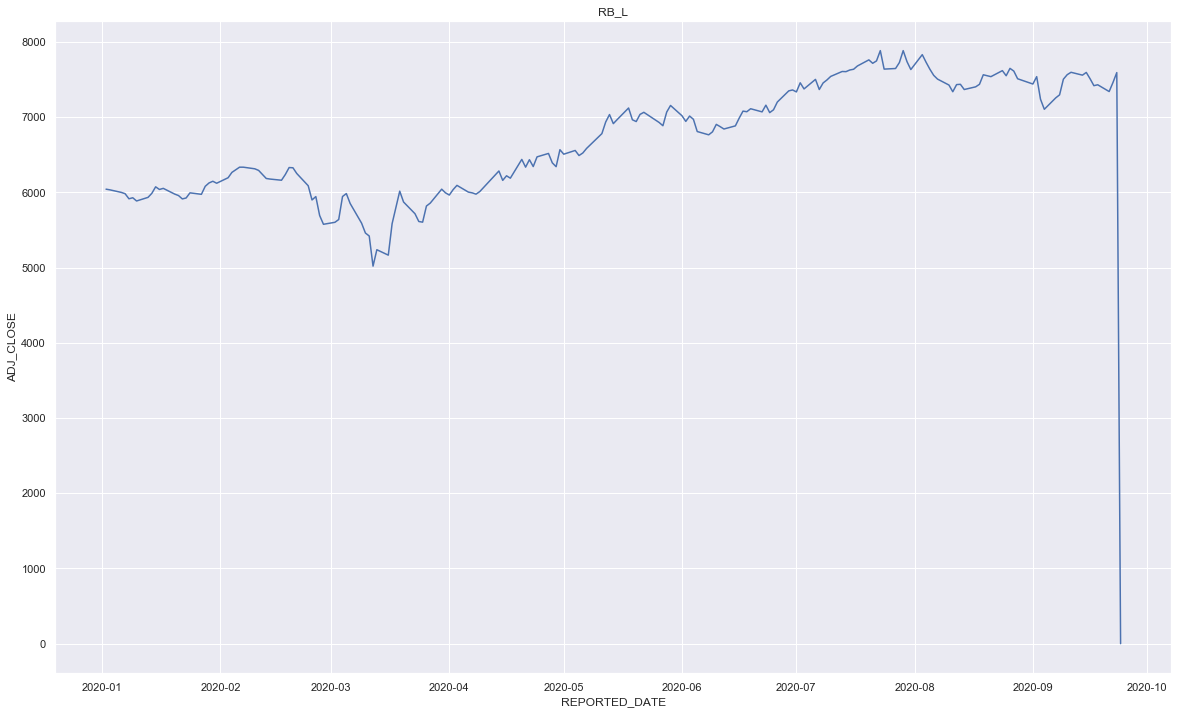

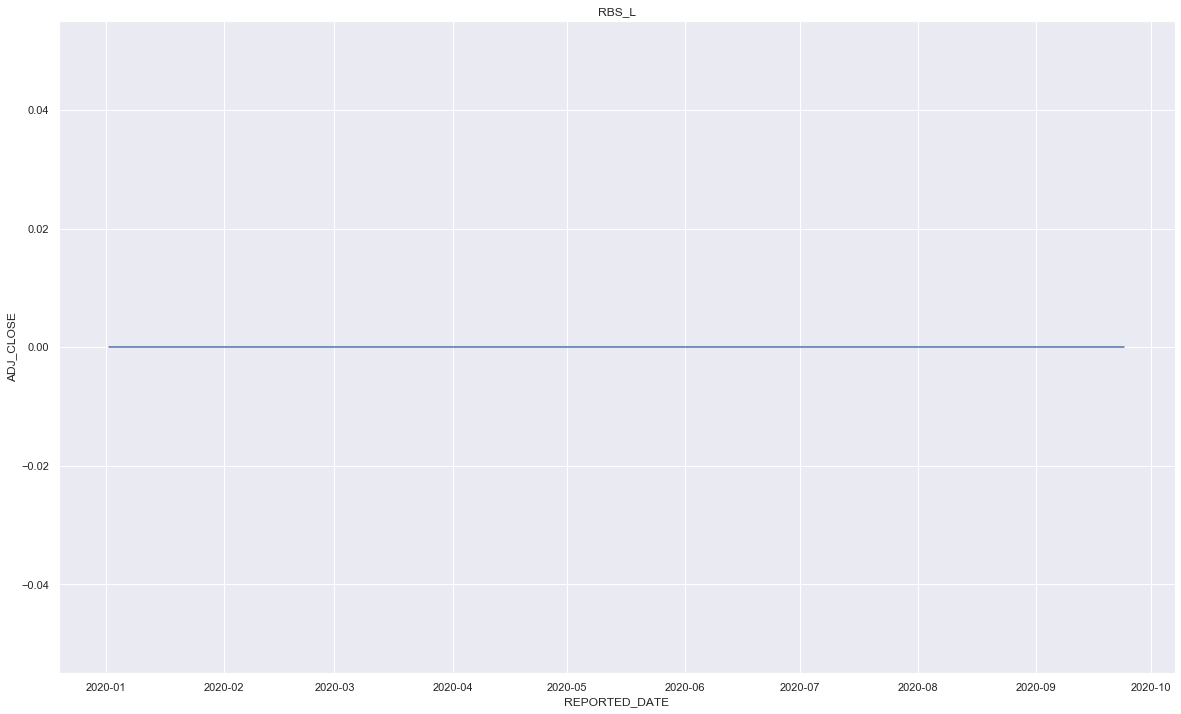

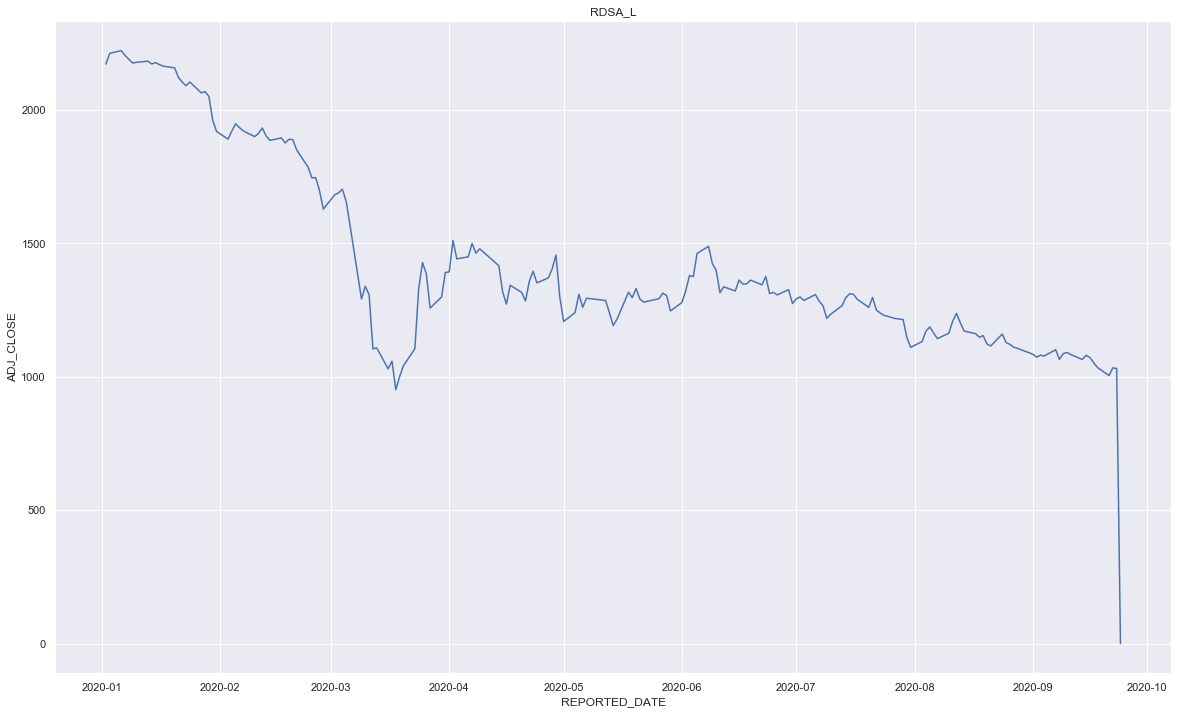

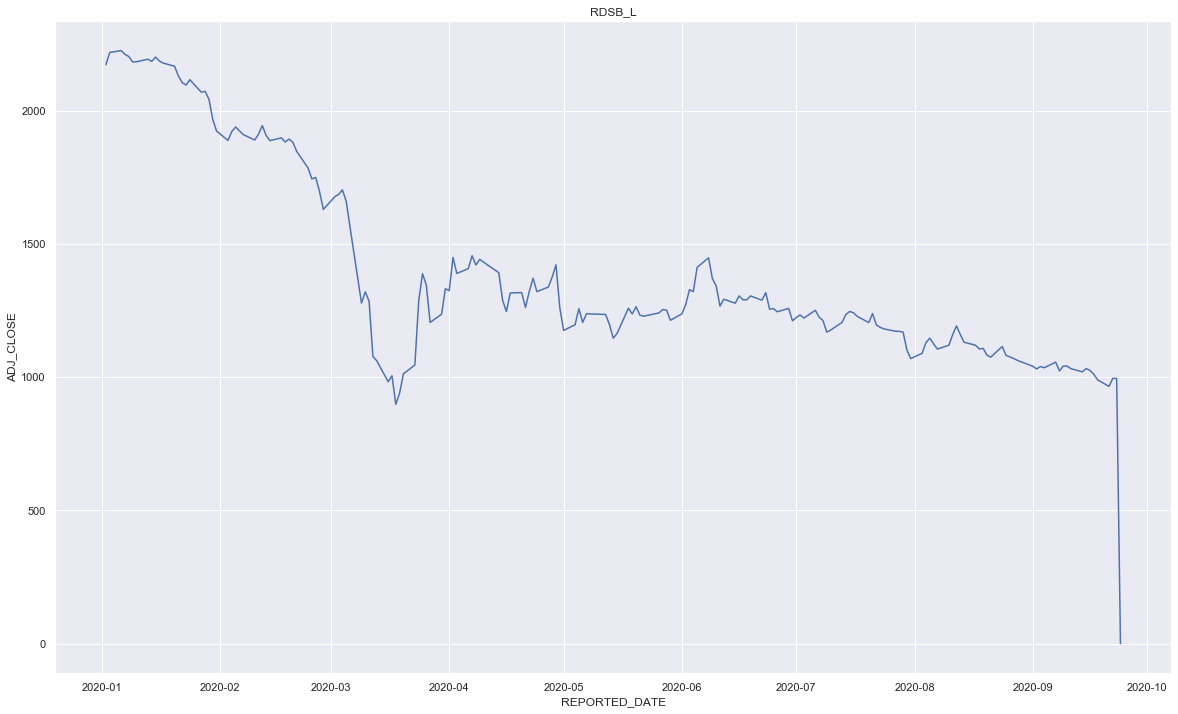

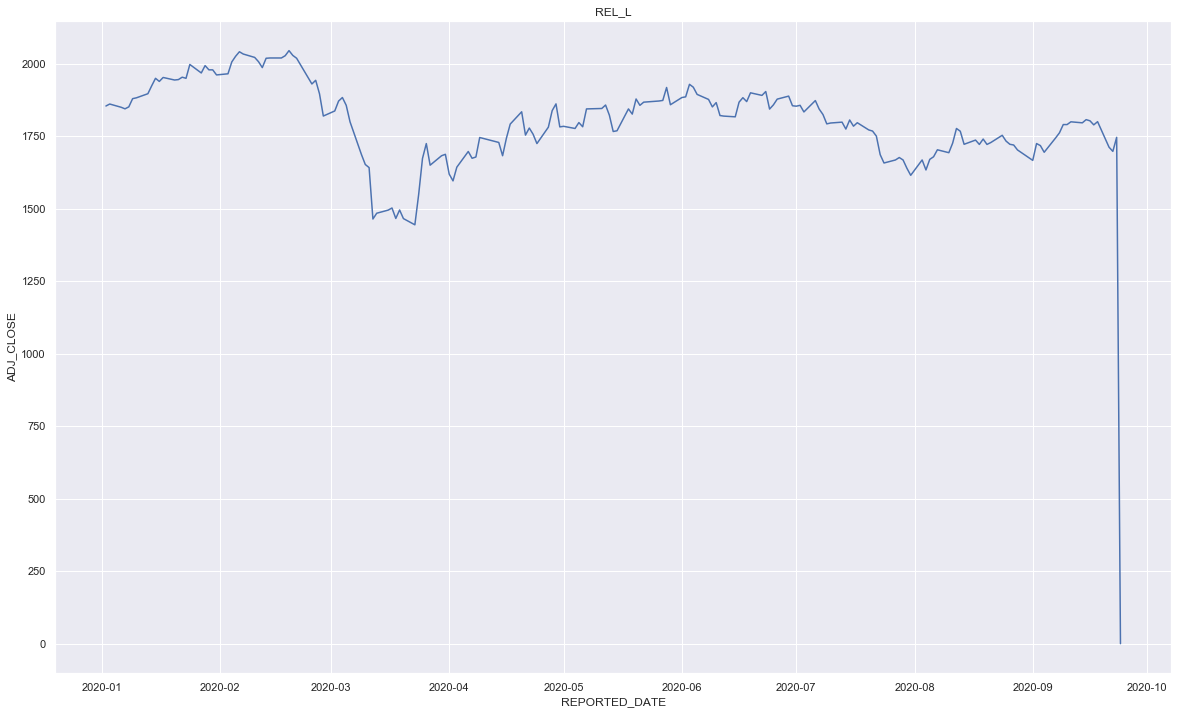

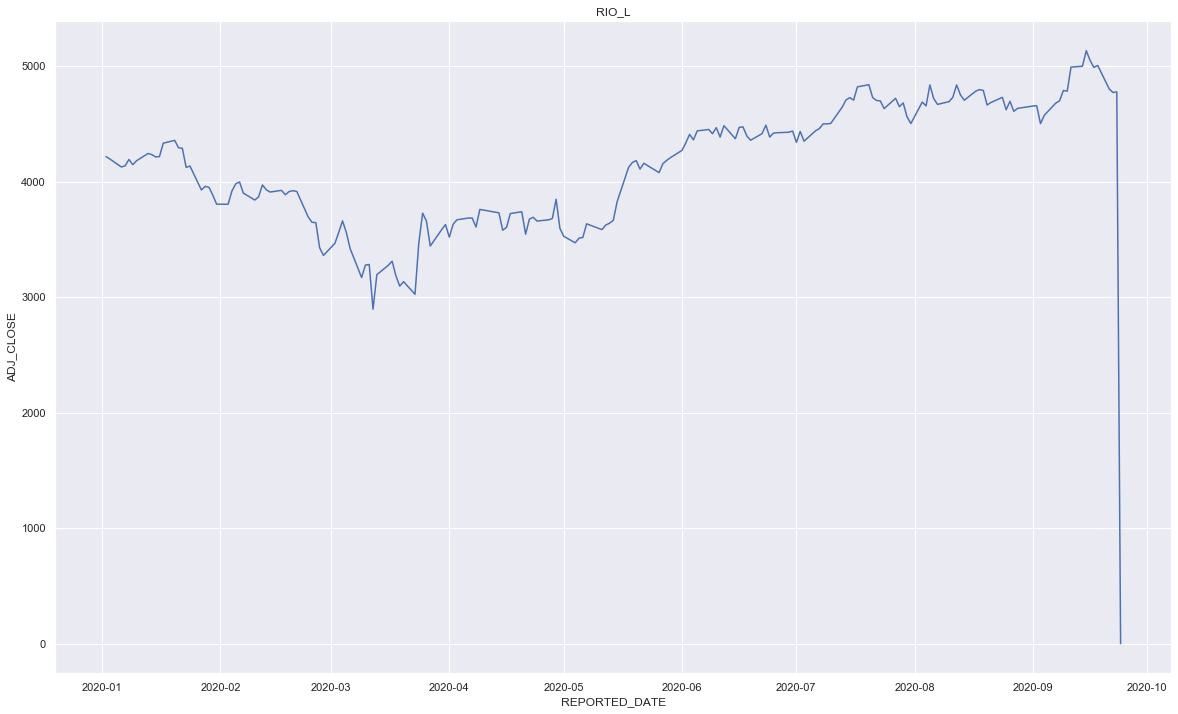

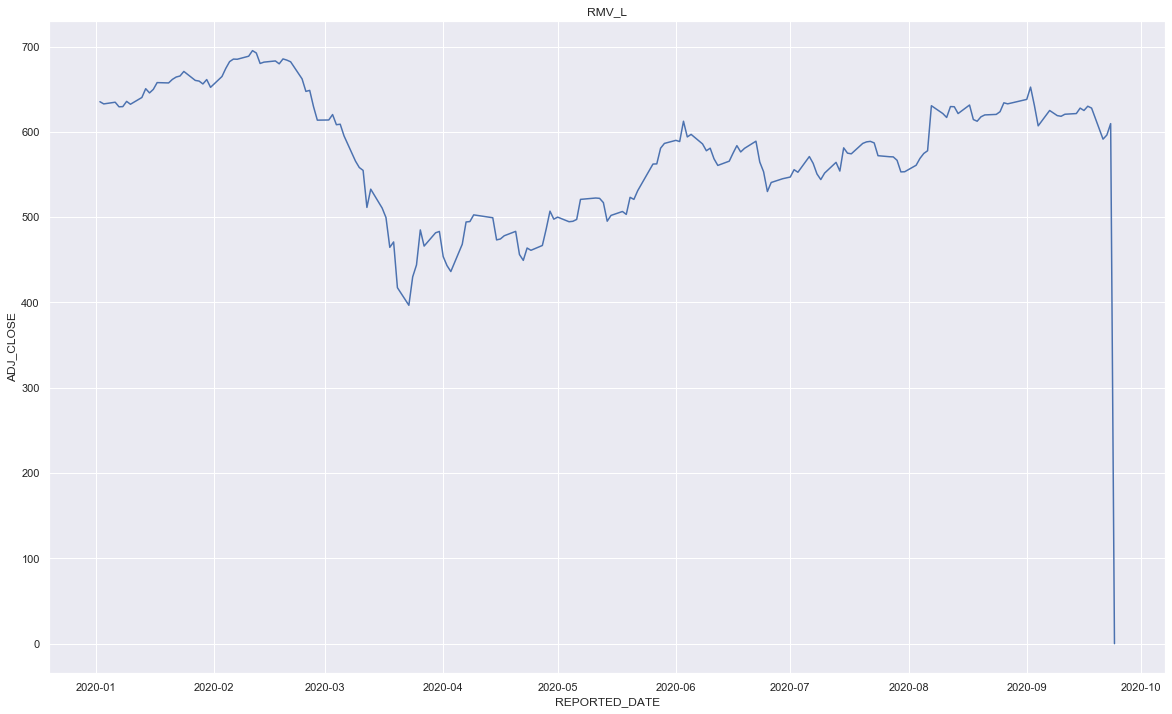

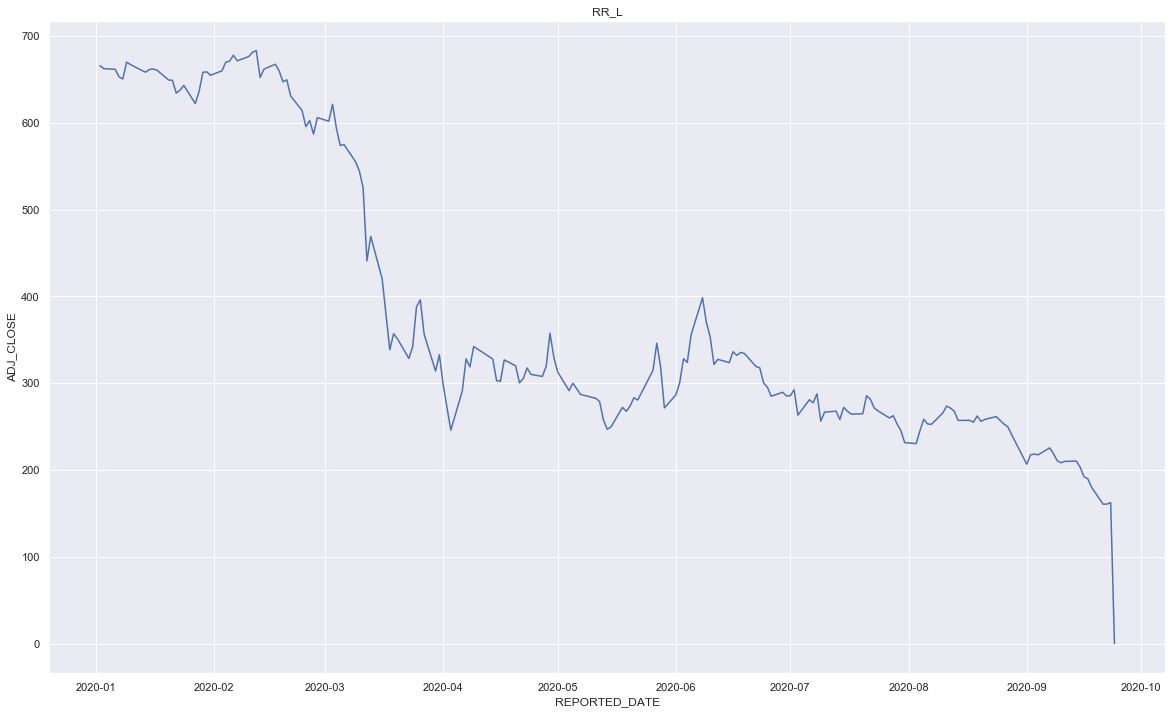

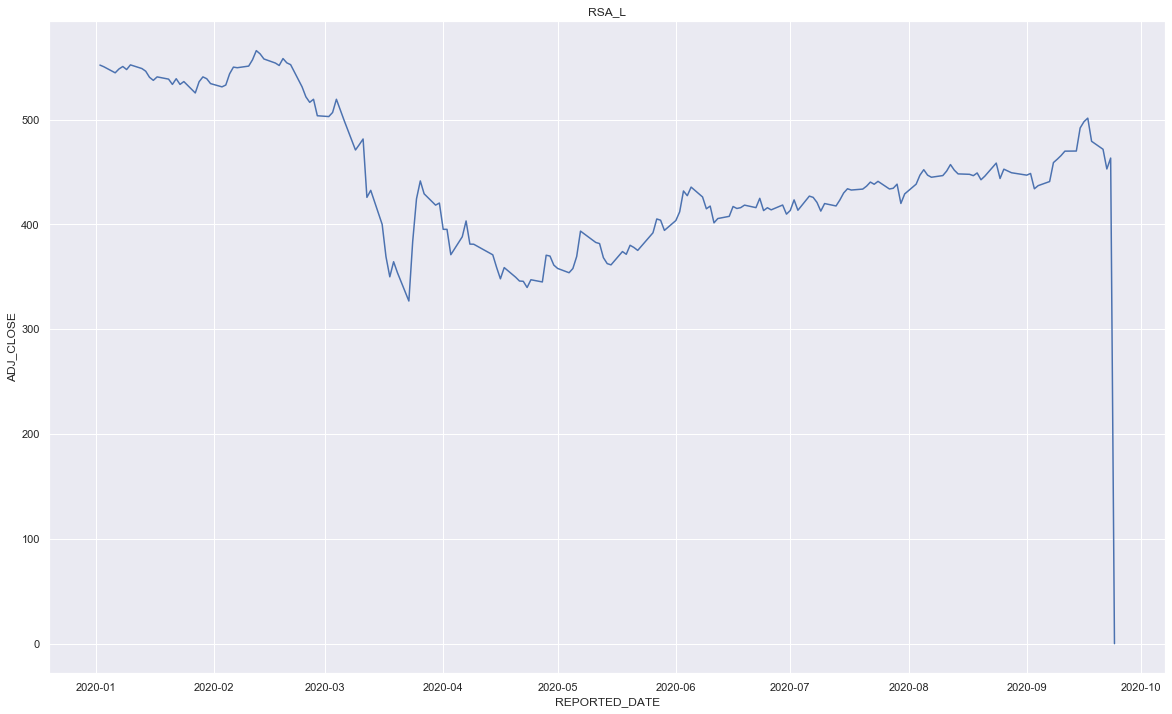

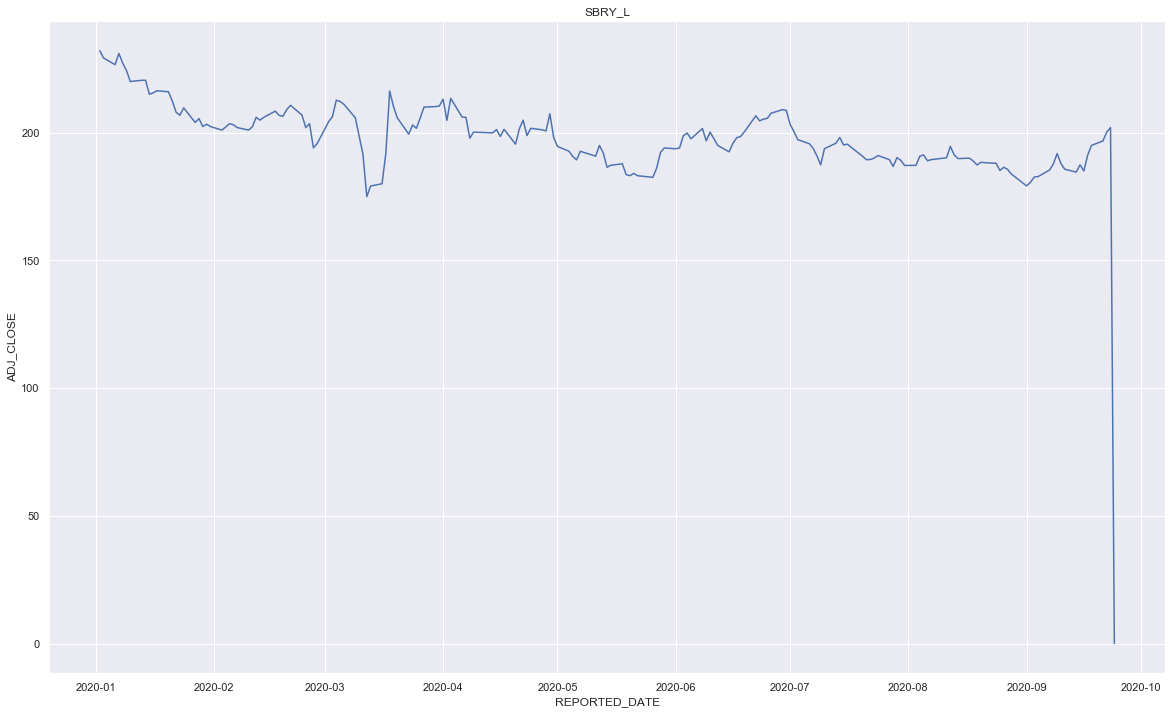

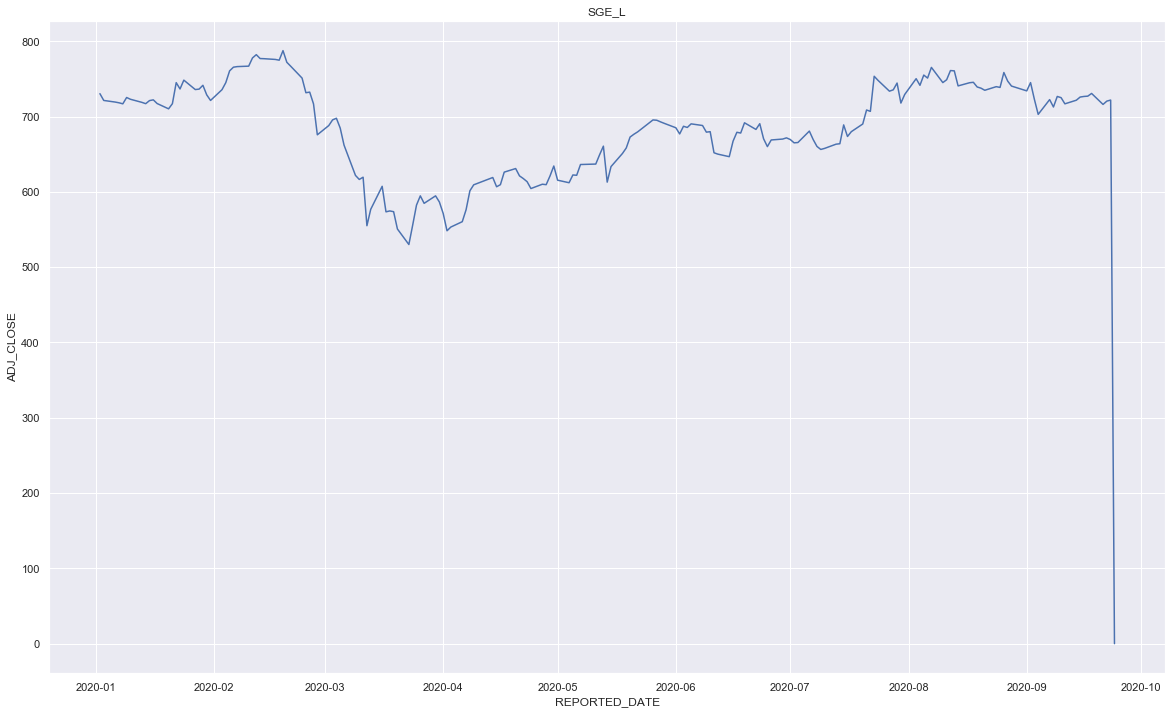

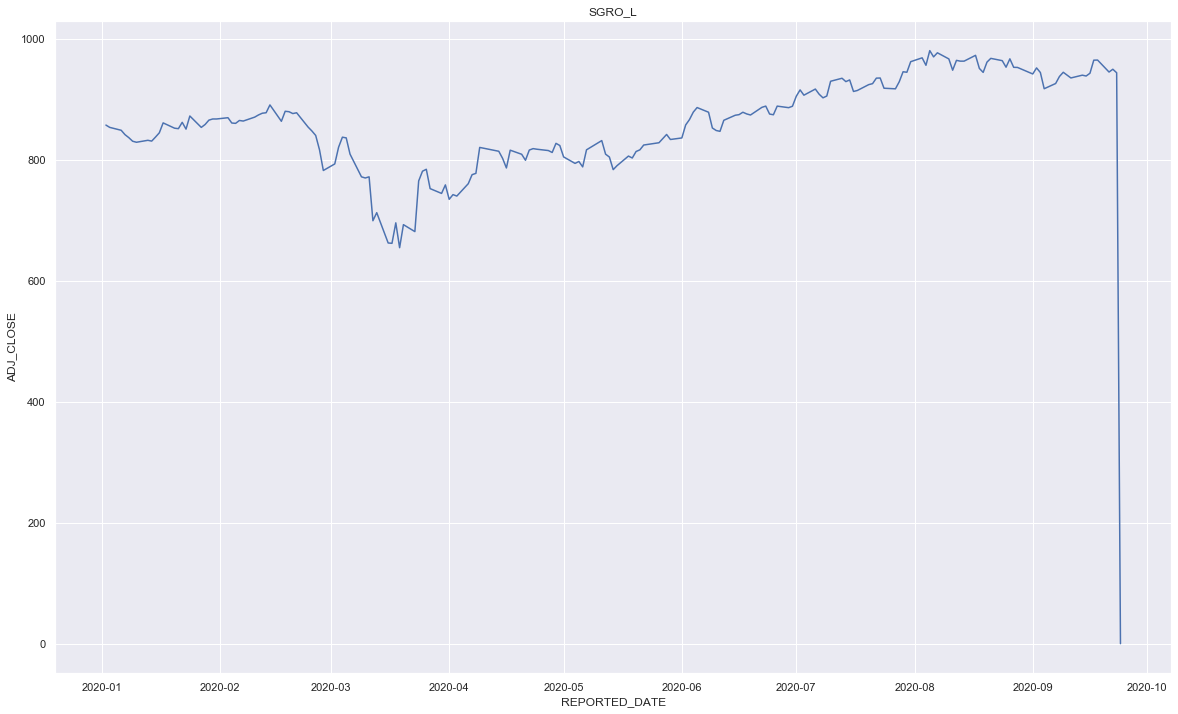

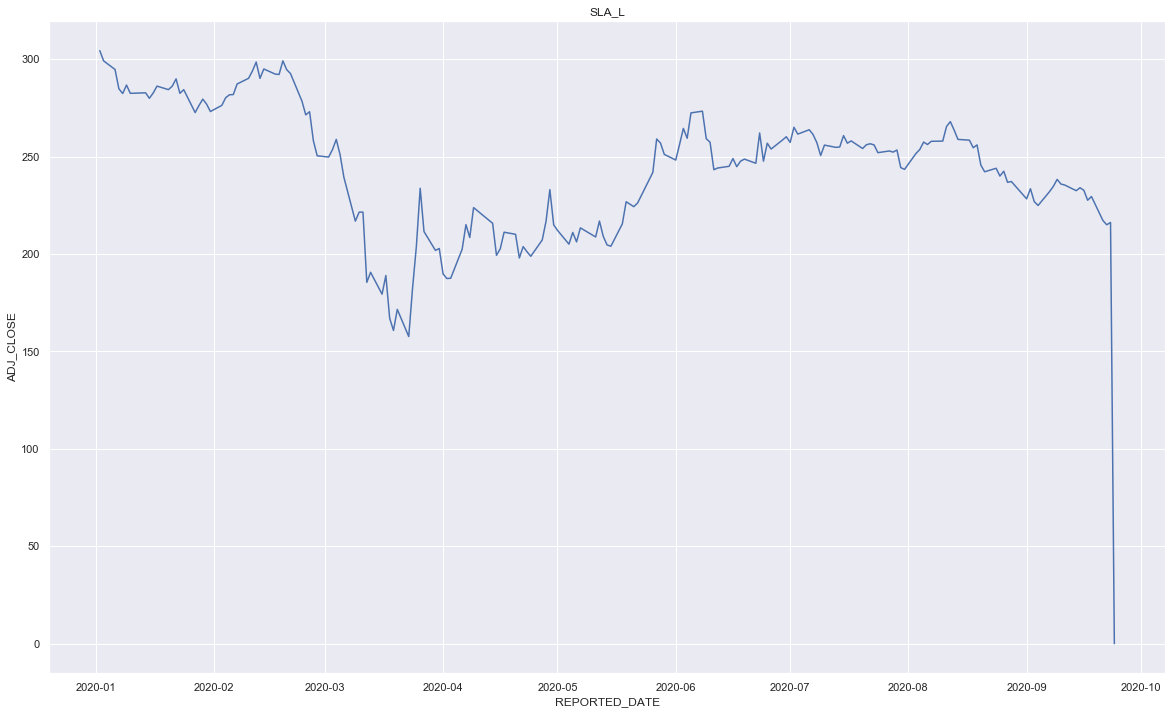

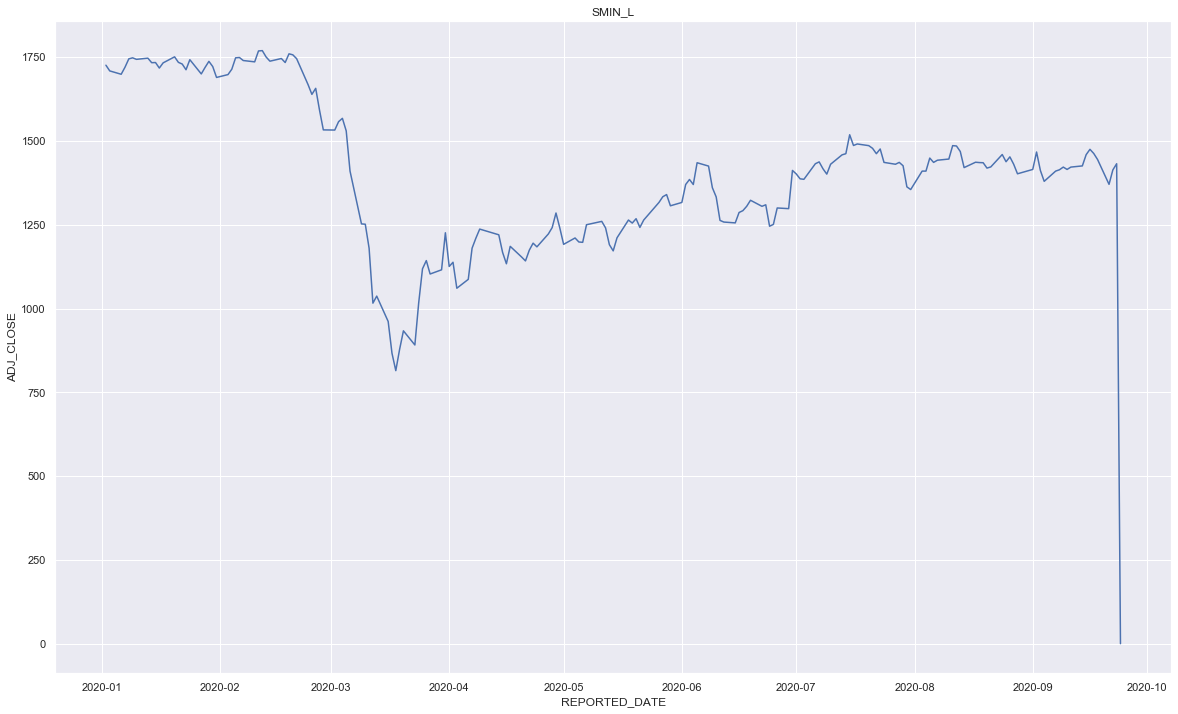

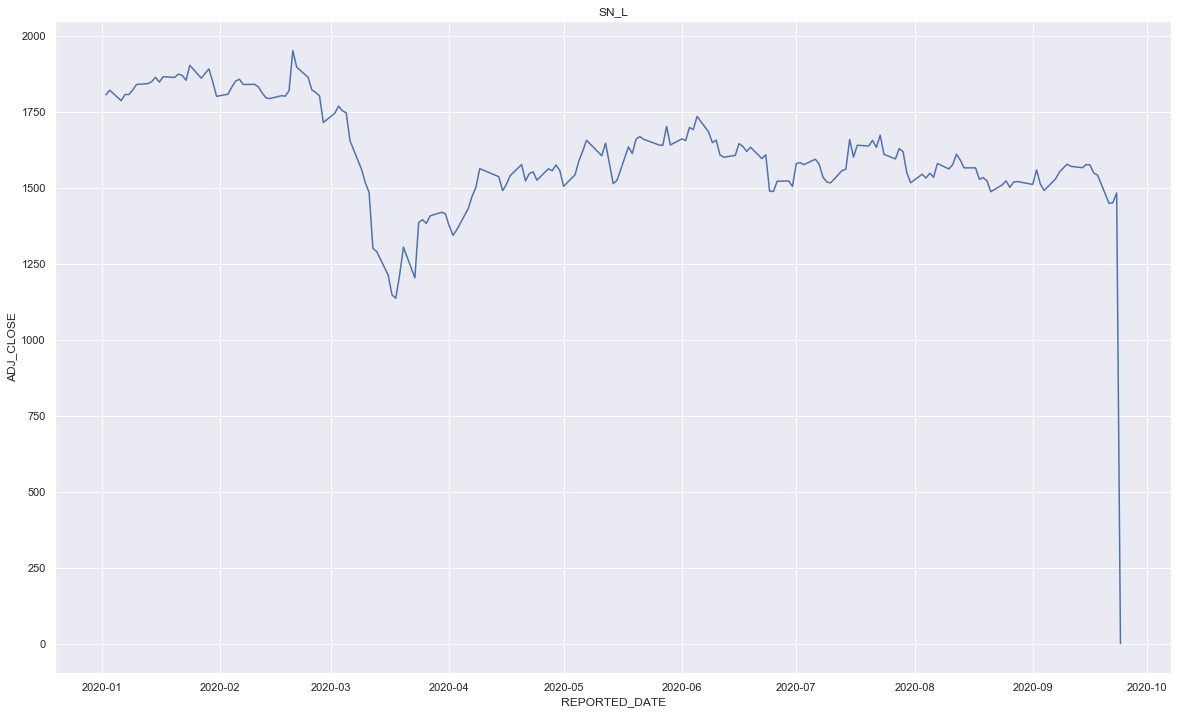

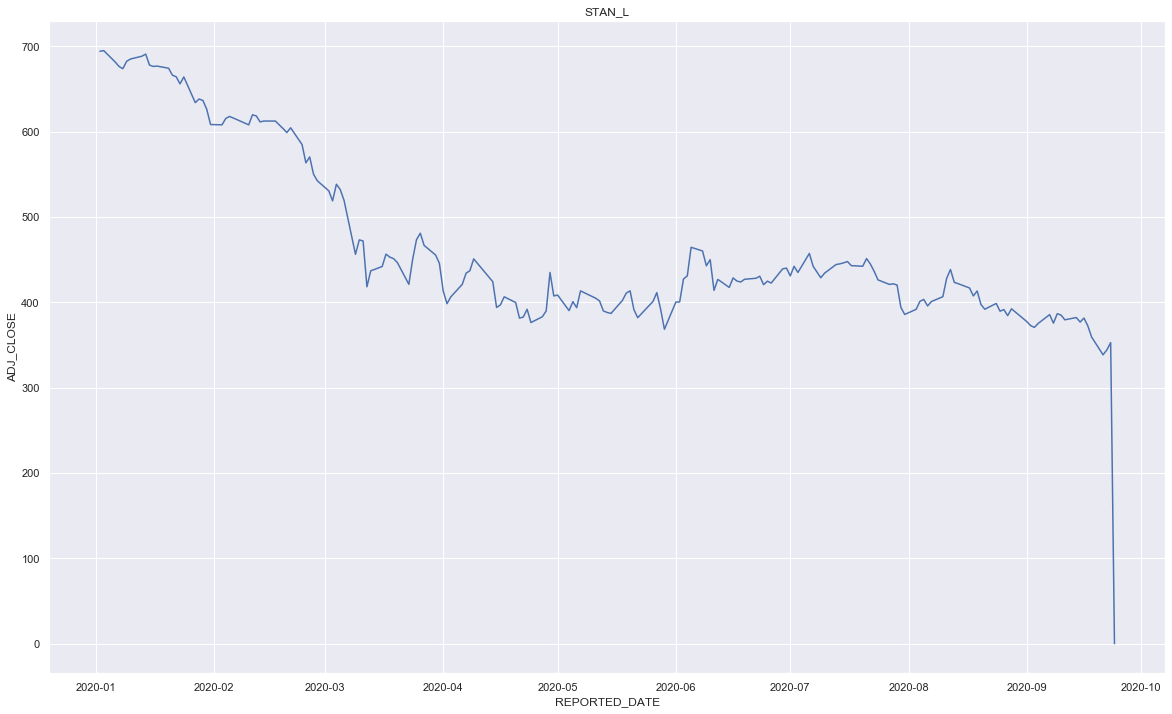

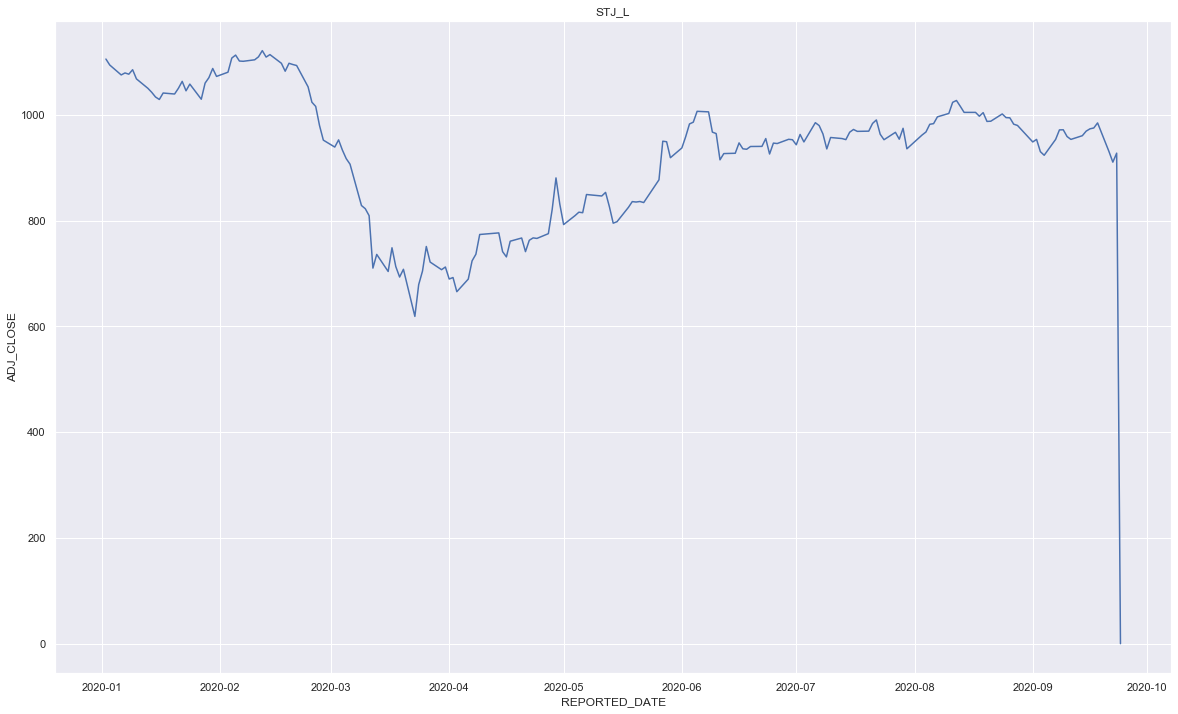

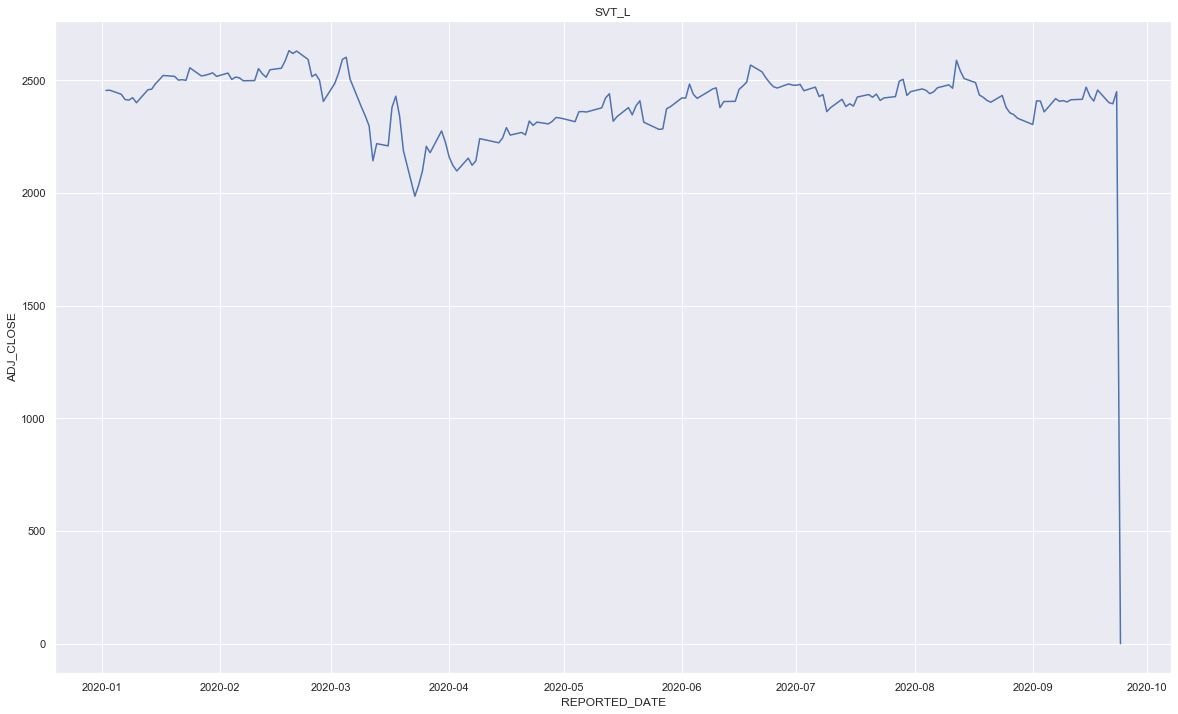

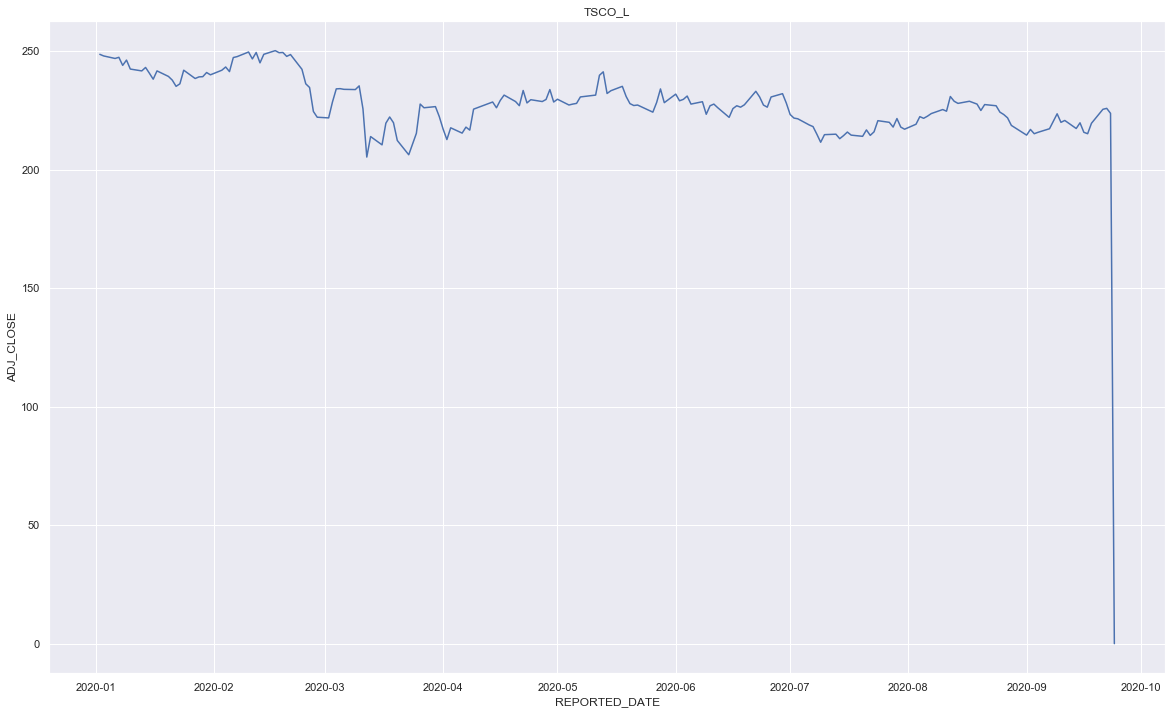

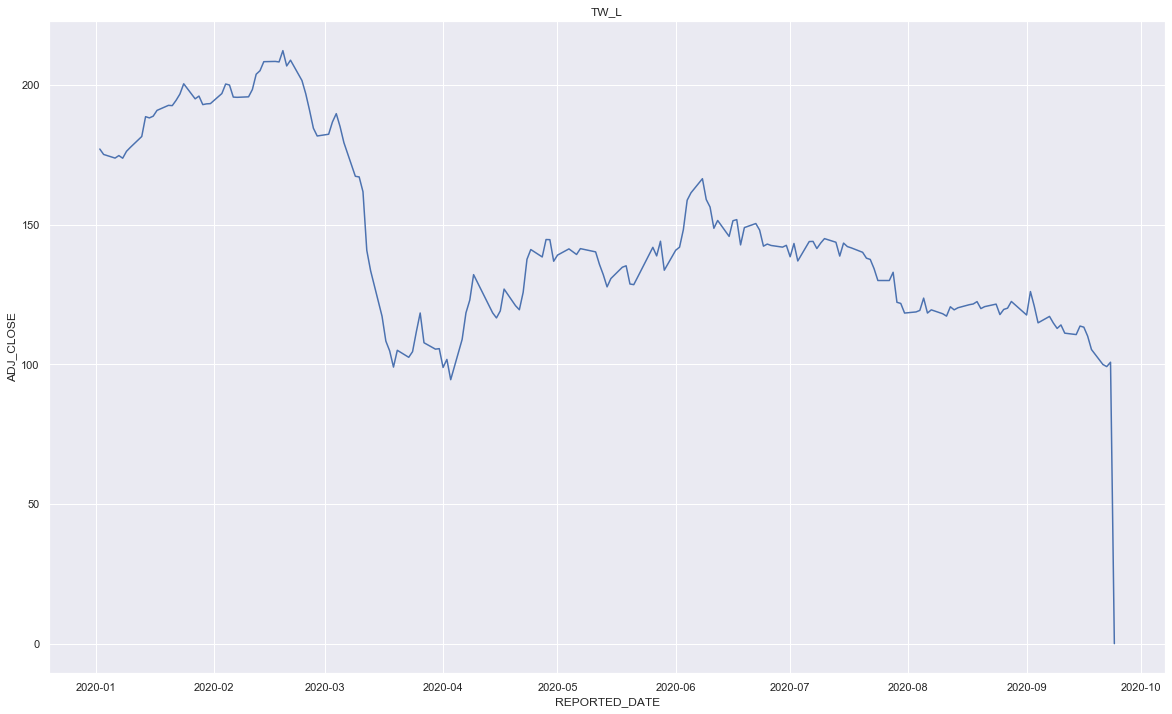

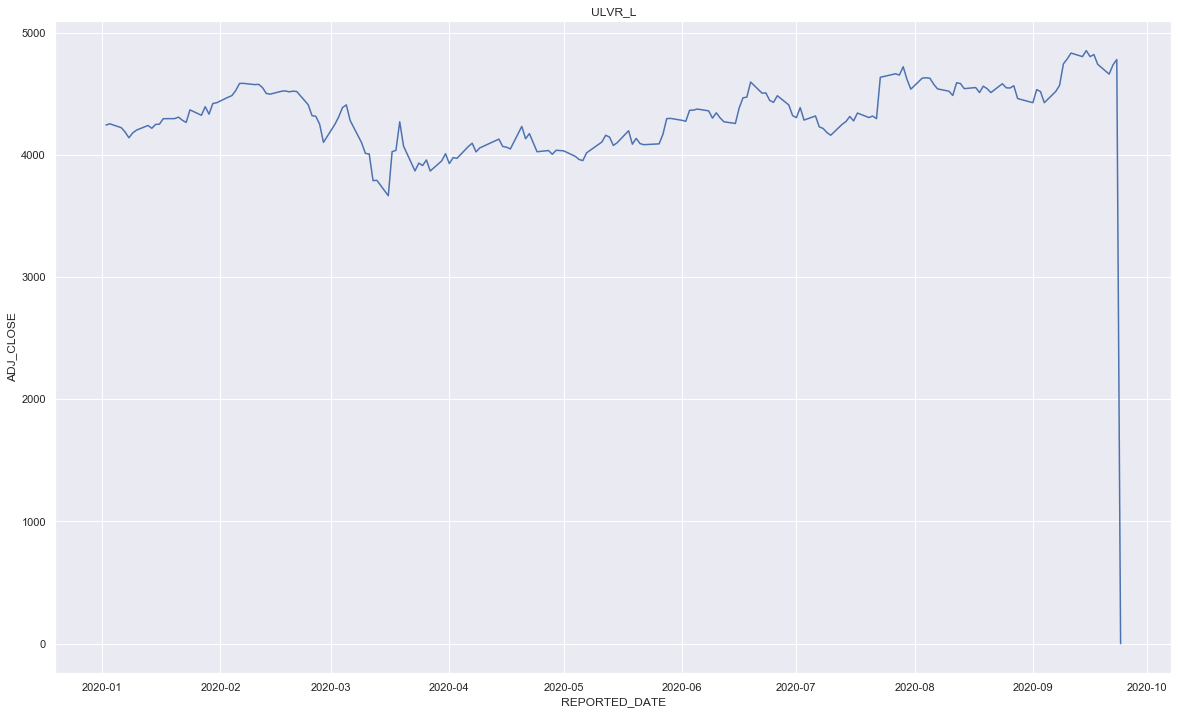

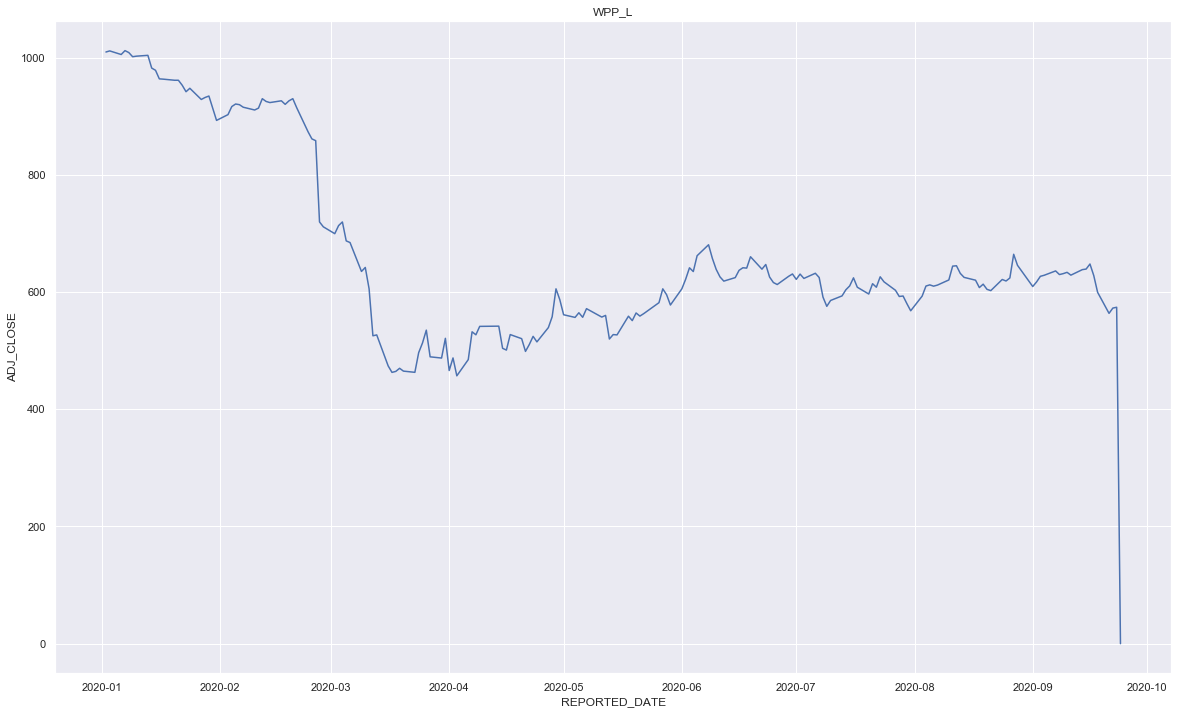

In [11]:
for stock in df['STOCK_CODE'].unique():
    sns.set()
    fix, ax = plt.subplots(figsize=(20,12))
    sns.lineplot(df[df['STOCK_CODE'] == stock]['REPORTED_DATE'], df[df['STOCK_CODE'] == stock]['ADJ_CLOSE']).set_title(stock)

For the dashboard we have created for this data, we have created interactive functionality whereby stocks can be visualised individually or by their respective sectors using drop-down menus. Here is what the FTSE100 Dashboard which is served by this API looks like: